Please Follow this Docker container installation process in your MacBook/Laptop before running this Python+R Notebook below.

  - Installation setup of environment where this notebook runs can be found i 
  Container with Jupyter+H2o.ai+Python3+R+Spark in this [link_here](http://https://github.com/jpacerqueira/project_lost_saturn)
  
  Also :
  - You need a Strong bandwith the install the Container environment it takes about 10-11 minutes to finish.
  
  - Good Luck,  stay safe! But investigate Corona virus(covid-19 or SARS-Cov-2) in your area and give the information back to the comunity!


# CoronaVirus Prediction

In [90]:
# Get data from Github
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error
import pandas as pd

#url_1 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
url_1 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
confirmed = pd.read_csv(url_1, error_bad_lines=False)

#url_2 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'
url_2 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
death = pd.read_csv(url_2, error_bad_lines=False)

#url_3 = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'
url_3 = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'
recover = pd.read_csv(url_3, error_bad_lines=False)

# fix region names
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("Mainland China", "China")
confirmed['Country/Region']= confirmed['Country/Region'].str.replace("US", "United States")

death['Country/Region']= death['Country/Region'].str.replace("Mainland China", "China")
death['Country/Region']= death['Country/Region'].str.replace("US", "United States")

recover['Country/Region']= recover['Country/Region'].str.replace("Mainland China", "China")
recover['Country/Region']= recover['Country/Region'].str.replace("US", "United States")

In [91]:
confirmed.iloc[:,:]

Province/State          Country/Region        Lat  \
0                             NaN             Afghanistan  33.000000   
1                             NaN                 Albania  41.153300   
2                             NaN                 Algeria  28.033900   
3                             NaN                 Andorra  42.506300   
4                             NaN                  Angola -11.202700   
5                             NaN     Antigua and Barbuda  17.060800   
6                             NaN               Argentina -38.416100   
7                             NaN                 Armenia  40.069100   
8    Australian Capital Territory               Australia -35.473500   
9                 New South Wales               Australia -33.868800   
10             Northern Territory               Australia -12.463400   
11                     Queensland               Australia -28.016700   
12                South Australia               Australia -34.928500   
13                       Tasmania               Australia -41.454500   
14                       Victoria               Australia -37.813600   
15              Western Australia               Australia -31.950500   
16                            NaN                 Austria  47.516200   
17                            NaN              Azerbaijan  40.143100   
18                            NaN                 Bahamas  25.034300   
19                            NaN                 Bahrain  26.027500   
20                            NaN              Bangladesh  23.685000   
21                            NaN                Barbados  13.193900   
22                            NaN                 Belarus  53.709800   
23                            NaN                 Belgium  50.833300   
24                            NaN                   Benin   9.307700   
25                            NaN                  Bhutan  27.514200   
26                            NaN                 Bolivia -16.290200   
27                            NaN  Bosnia and Herzegovina  43.915900   
28                            NaN                  Brazil -14.235000   
29                            NaN                  Brunei   4.535300   
..                            ...                     ...        ...   
226                           NaN              Uzbekistan  41.377500   
227                           NaN               Venezuela   6.423800   
228                           NaN                 Vietnam  16.000000   
229                           NaN                  Zambia -15.416700   
230                           NaN                Zimbabwe -20.000000   
231              Diamond Princess                  Canada   0.000000   
232                           NaN                Dominica  15.415000   
233                           NaN                 Grenada  12.116500   
234                           NaN              Mozambique -18.665695   
235                           NaN                   Syria  34.802075   
236                           NaN             Timor-Leste  -8.874217   
237                           NaN                  Belize  13.193900   
238                     Recovered                  Canada   0.000000   
239                           NaN                    Laos  19.856270   
240                           NaN                   Libya  26.335100   
241                           NaN      West Bank and Gaza  31.952200   
242                           NaN           Guinea-Bissau  11.803700   
243                           NaN                    Mali  17.570692   
244                           NaN   Saint Kitts and Nevis  17.357822   
245         Northwest Territories                  Canada  64.825500   
246                         Yukon                  Canada  64.282300   
247                           NaN                  Kosovo  42.602636   
248                           NaN                   Burma  21.916200   
249                      Anguilla          United Kingdom  

## Get Population

In [92]:
population=pd.read_csv('/home/notebookuser/notebooks/covid19/data/population.csv', sep=',', encoding='latin1') 
confirmed=pd.merge(confirmed, population,how='left' ,on=['Province/State','Country/Region'])
death=pd.merge(death, population,how='left' ,on=['Province/State','Country/Region'])
recover=pd.merge(recover, population,how='left' ,on=['Province/State','Country/Region'])

In [93]:
# merge region confirmed + death + recover
confirmed['region']=confirmed['Country/Region'].map(str)+'_'+confirmed['Province/State'].map(str)
death['region']=death['Country/Region'].map(str)+'_'+death['Province/State'].map(str)
recover['region']=recover['Country/Region'].map(str)+'_'+recover['Province/State'].map(str)
confirmed.iloc[:,:]

Province/State          Country/Region        Lat  \
0                             NaN             Afghanistan  33.000000   
1                             NaN                 Albania  41.153300   
2                             NaN                 Algeria  28.033900   
3                             NaN                 Andorra  42.506300   
4                             NaN                  Angola -11.202700   
5                             NaN     Antigua and Barbuda  17.060800   
6                             NaN               Argentina -38.416100   
7                             NaN                 Armenia  40.069100   
8    Australian Capital Territory               Australia -35.473500   
9                 New South Wales               Australia -33.868800   
10             Northern Territory               Australia -12.463400   
11                     Queensland               Australia -28.016700   
12                South Australia               Australia -34.928500   
13                       Tasmania               Australia -41.454500   
14                       Victoria               Australia -37.813600   
15              Western Australia               Australia -31.950500   
16                            NaN                 Austria  47.516200   
17                            NaN              Azerbaijan  40.143100   
18                            NaN                 Bahamas  25.034300   
19                            NaN                 Bahrain  26.027500   
20                            NaN              Bangladesh  23.685000   
21                            NaN                Barbados  13.193900   
22                            NaN                 Belarus  53.709800   
23                            NaN                 Belgium  50.833300   
24                            NaN                   Benin   9.307700   
25                            NaN                  Bhutan  27.514200   
26                            NaN                 Bolivia -16.290200   
27                            NaN  Bosnia and Herzegovina  43.915900   
28                            NaN                  Brazil -14.235000   
29                            NaN                  Brunei   4.535300   
..                            ...                     ...        ...   
228                           NaN              Uzbekistan  41.377500   
229                           NaN               Venezuela   6.423800   
230                           NaN                 Vietnam  16.000000   
231                           NaN                  Zambia -15.416700   
232                           NaN                Zimbabwe -20.000000   
233              Diamond Princess                  Canada   0.000000   
234                           NaN                Dominica  15.415000   
235                           NaN                 Grenada  12.116500   
236                           NaN              Mozambique -18.665695   
237                           NaN                   Syria  34.802075   
238                           NaN             Timor-Leste  -8.874217   
239                           NaN                  Belize  13.193900   
240                     Recovered                  Canada   0.000000   
241                           NaN                    Laos  19.856270   
242                           NaN                   Libya  26.335100   
243                           NaN      West Bank and Gaza  31.952200   
244                           NaN           Guinea-Bissau  11.803700   
245                           NaN                    Mali  17.570692   
246                           NaN   Saint Kitts and Nevis  17.357822   
247         Northwest Territories                  Canada  64.825500   
248                         Yukon                  Canada  64.282300   
249                           NaN                  Kosovo  42.602636   
250                           NaN                   Burma  21.916200   
251                      Anguilla          United Kingdom  

In [94]:
# merge region death
death.iloc[185:195,:]

Province/State                    Country/Region      Lat     Long  \
185            NaN                            Poland  51.9194  19.1451   
186            NaN                          Portugal  39.3999  -8.2245   
187            NaN                             Qatar  25.3548  51.1839   
188            NaN                           Romania  45.9432  24.9668   
189            NaN                            Russia  60.0000  90.0000   
190            NaN                            Rwanda  -1.9403  29.8739   
191            NaN                       Saint Lucia  13.9094 -60.9789   
192            NaN  Saint Vincent and the Grenadines  12.9843 -61.2872   
193            NaN                        San Marino  43.9424  12.4578   
194            NaN                      Saudi Arabia  24.0000  45.0000   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  3/25/20  \
185        0        0        0        0        0        0  ...       14   
186        0        0        0        0        0        0  ...       43   
187        0        0        0        0        0        0  ...        0   
188        0        0        0        0        0        0  ...       17   
189        0        0        0        0        0        0  ...        3   
190        0        0        0        0        0        0  ...        0   
191        0        0        0        0        0        0  ...        0   
192        0        0        0        0        0        0  ...        0   
193        0        0        0        0        0        0  ...       21   
194        0        0        0        0        0        0  ...        2   

     3/26/20  3/27/20  3/28/20  3/29/20  3/30/20  3/31/20  4/1/20  \
185       16       16       18       22       31       33      43   
186       60       76      100      119      140      160     187   
187        0        0        1        1        1        2       2   
188       23       26       37       43       65       82      92   
189        3        4        4        8        9       17      24   
190        0        0        0        0        0        0       0   
191        0        0        0        0        0        0       0   
192        0        0        0        0        0        0       0   
193       21       21       22       22       25       26      26   
194        3        3        4        8        8       10      16   

      Population                                 region  
185    37,980,000                            Poland_nan  
186    10,290,000                          Portugal_nan  
187           NaN                             Qatar_nan  
188    19,530,000                           Romania_nan  
189   144,500,000                            Russia_nan  
190           NaN                            Rwanda_nan  
191           NaN                       Saint Lucia_nan  
192           NaN  Saint Vincent and the Grenadines_nan  
193           NaN                        San Marino_nan  
194           NaN                      Saudi Arabia_nan  

[10 rows x 77 columns]

In [95]:
# merge region recover
recover.iloc[175:185,:]

Province/State    Country/Region      Lat      Long  1/22/20  1/23/20  \
175            NaN              Oman  21.0000   57.0000        0        0   
176            NaN          Pakistan  30.3753   69.3451        0        0   
177            NaN            Panama   8.5380  -80.7821        0        0   
178            NaN  Papua New Guinea  -6.3150  143.9555        0        0   
179            NaN          Paraguay -23.4425  -58.4438        0        0   
180            NaN              Peru  -9.1900  -75.0152        0        0   
181            NaN       Philippines  13.0000  122.0000        0        0   
182            NaN            Poland  51.9194   19.1451        0        0   
183            NaN          Portugal  39.3999   -8.2245        0        0   
184            NaN             Qatar  25.3548   51.1839        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  3/25/20  3/26/20  3/27/20  \
175        0        0        0        0  ...       17       23       23   
176        0        0        0        0  ...       21       21       23   
177        0        0        0        0  ...        1        2        2   
178        0        0        0        0  ...        0        0        0   
179        0        0        0        0  ...        0        0        1   
180        0        0        0        0  ...        1       14       16   
181        0        0        0        0  ...       26       28       31   
182        0        0        0        0  ...        7        7        7   
183        0        0        0        0  ...       22       43       43   
184        0        0        0        0  ...       41       43       43   

     3/28/20  3/29/20  3/30/20  3/31/20  4/1/20   Population   \
175       23       23       29       34      34     4,636,000   
176       29       29       76       76      94   197,000,000   
177        2        4        4        9       9           NaN   
178        0        0        0        0       0           NaN   
179        1        1        1        1       1           NaN   
180       16       16       53      394     394           NaN   
181       35       42       42       49      50   104,900,000   
182        7        7        7        7      47    37,980,000   
183       43       43       43       43      43    10,290,000   
184       45       48       51       62      71           NaN   

                   region  
175              Oman_nan  
176          Pakistan_nan  
177            Panama_nan  
178  Papua New Guinea_nan  
179          Paraguay_nan  
180              Peru_nan  
181       Philippines_nan  
182            Poland_nan  
183          Portugal_nan  
184             Qatar_nan  

[10 rows x 77 columns]

In [96]:
confirmed.iloc[185:195,:]

Province/State                    Country/Region      Lat     Long  \
185            NaN                            Poland  51.9194  19.1451   
186            NaN                          Portugal  39.3999  -8.2245   
187            NaN                             Qatar  25.3548  51.1839   
188            NaN                           Romania  45.9432  24.9668   
189            NaN                            Russia  60.0000  90.0000   
190            NaN                            Rwanda  -1.9403  29.8739   
191            NaN                       Saint Lucia  13.9094 -60.9789   
192            NaN  Saint Vincent and the Grenadines  12.9843 -61.2872   
193            NaN                        San Marino  43.9424  12.4578   
194            NaN                      Saudi Arabia  24.0000  45.0000   

     1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  3/25/20  \
185        0        0        0        0        0        0  ...     1051   
186        0        0        0        0        0        0  ...     2995   
187        0        0        0        0        0        0  ...      537   
188        0        0        0        0        0        0  ...      906   
189        0        0        0        0        0        0  ...      658   
190        0        0        0        0        0        0  ...       41   
191        0        0        0        0        0        0  ...        3   
192        0        0        0        0        0        0  ...        1   
193        0        0        0        0        0        0  ...      208   
194        0        0        0        0        0        0  ...      900   

     3/26/20  3/27/20  3/28/20  3/29/20  3/30/20  3/31/20  4/1/20  \
185     1221     1389     1638     1862     2055     2311    2554   
186     3544     4268     5170     5962     6408     7443    8251   
187      549      562      590      634      693      781     835   
188     1029     1292     1452     1815     2109     2245    2460   
189      840     1036     1264     1534     1836     2337    2777   
190       50       54       60       70       70       75      82   
191        3        3        3        9        9       13      13   
192        1        1        1        1        1        1       1   
193      208      223      224      224      230      236     236   
194     1012     1104     1203     1299     1453     1563    1720   

      Population                                 region  
185    37,980,000                            Poland_nan  
186    10,290,000                          Portugal_nan  
187           NaN                             Qatar_nan  
188    19,530,000                           Romania_nan  
189   144,500,000                            Russia_nan  
190           NaN                            Rwanda_nan  
191           NaN                       Saint Lucia_nan  
192           NaN  Saint Vincent and the Grenadines_nan  
193           NaN                        San Marino_nan  
194           NaN                      Saudi Arabia_nan  

[10 rows x 77 columns]

In [97]:
confirmed.iloc[220:230,:]

Province/State  Country/Region      Lat     Long  1/22/20  1/23/20  \
220   Cayman Islands  United Kingdom  19.3133 -81.2546        0        0   
221  Channel Islands  United Kingdom  49.3723  -2.3644        0        0   
222        Gibraltar  United Kingdom  36.1408  -5.3536        0        0   
223      Isle of Man  United Kingdom  54.2361  -4.5481        0        0   
224       Montserrat  United Kingdom  16.7425 -62.1874        0        0   
225              NaN  United Kingdom  55.3781  -3.4360        0        0   
226              NaN         Uruguay -32.5228 -55.7658        0        0   
227              NaN   United States  37.0902 -95.7129        1        1   
228              NaN      Uzbekistan  41.3775  64.5853        0        0   
229              NaN       Venezuela   6.4238 -66.5897        0        0   

     1/24/20  1/25/20  1/26/20  1/27/20  ...  3/25/20  3/26/20  3/27/20  \
220        0        0        0        0  ...        8        8        8   
221        0        0        0        0  ...       46       66       88   
222        0        0        0        0  ...       26       35       55   
223        0        0        0        0  ...       23       25       29   
224        0        0        0        0  ...        1        5        5   
225        0        0        0        0  ...     9529    11658    14543   
226        0        0        0        0  ...      189      217      238   
227        2        2        5        5  ...    65778    83836   101657   
228        0        0        0        0  ...       60       75       88   
229        0        0        0        0  ...       91      107      107   

     3/28/20  3/29/20  3/30/20  3/31/20  4/1/20   Population   \
220        8        8       12       14      22           NaN   
221       97      108      141      141     172           NaN   
222       56       65       69       69      81           NaN   
223       32       42       49       60      68           NaN   
224        5        5        5        5       5           NaN   
225    17089    19522    22141    25150   29474    66,440,000   
226      274      304      310      338     338           NaN   
227   121478   140886   161807   188172  213372   327,200,000   
228      104      144      149      172     181           NaN   
229      119      119      135      135     143           NaN   

                             region  
220   United Kingdom_Cayman Islands  
221  United Kingdom_Channel Islands  
222        United Kingdom_Gibraltar  
223      United Kingdom_Isle of Man  
224       United Kingdom_Montserrat  
225              United Kingdom_nan  
226                     Uruguay_nan  
227               United States_nan  
228                  Uzbekistan_nan  
229                   Venezuela_nan  

[10 rows x 77 columns]

## Create Time Series + Plots

In [98]:
def create_ts(df):
  ts=df
  ts=ts.drop(['Province/State', 'Country/Region','Lat', 'Long',' Population '], axis=1)
  ts.set_index('region')
  ts=ts.T
  ts.columns=ts.loc['region']
  ts=ts.drop('region')
  ts=ts.fillna(0)
  ts=ts.reindex(sorted(ts.columns), axis=1)
  return (ts)

In [99]:
## JOAO - Fix - Drop Duplicates # Keep Last # Issue With Data source Change from John Hopkins institute
#
ts=create_ts(confirmed.drop_duplicates(subset=['region'], keep='last', inplace=False) )
ts_d=create_ts(death.drop_duplicates(subset=['region'], keep='last', inplace=False) )
ts_rec=create_ts(recover.drop_duplicates(subset=['region'], keep='last', inplace=False) )

Text(0.5, 1.0, 'Daily Total Recoverd - Major_4,25 2nd Areas')

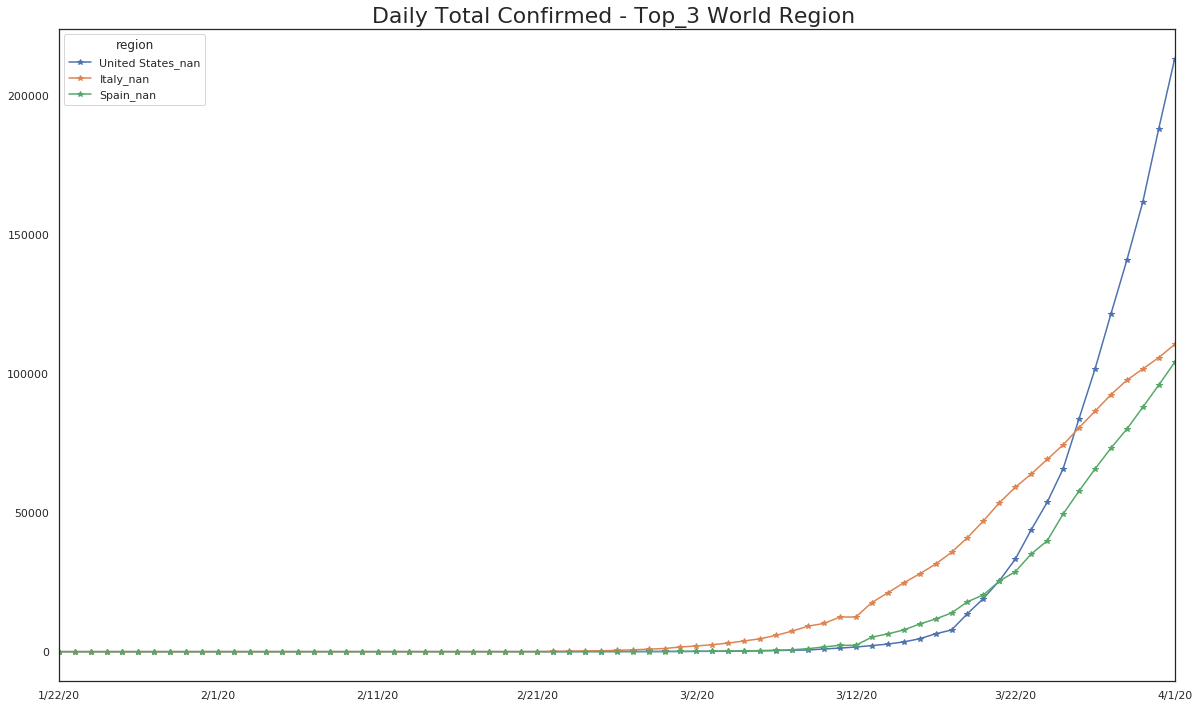

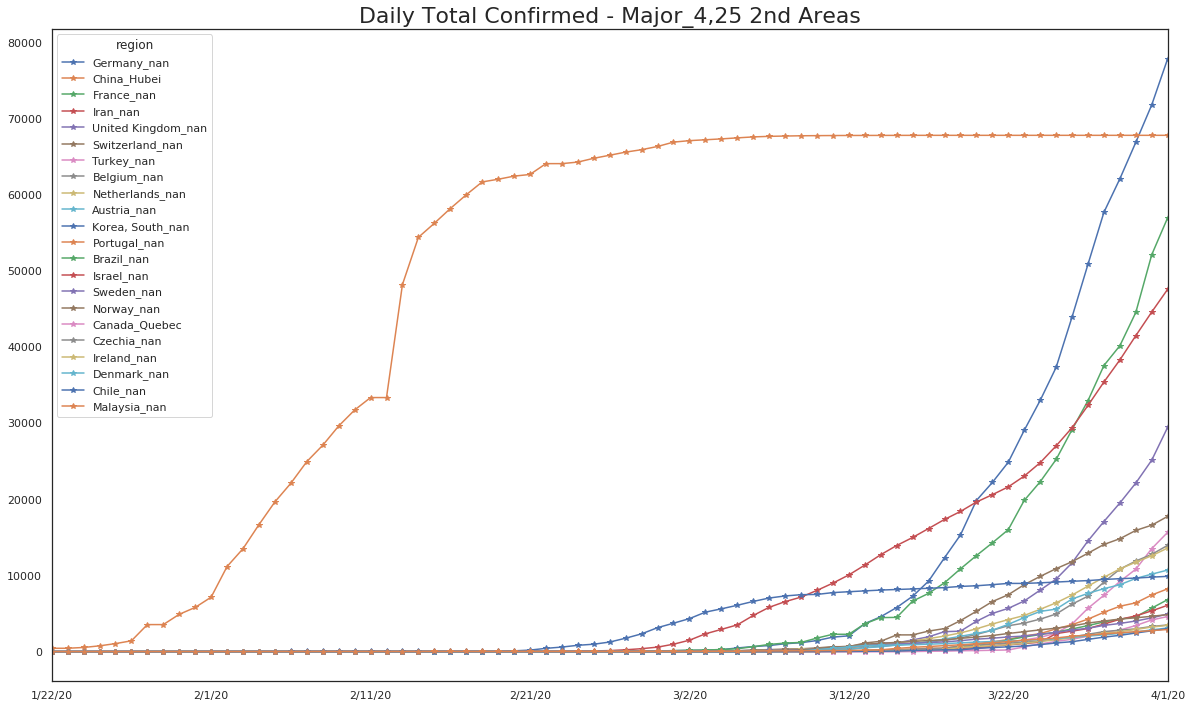

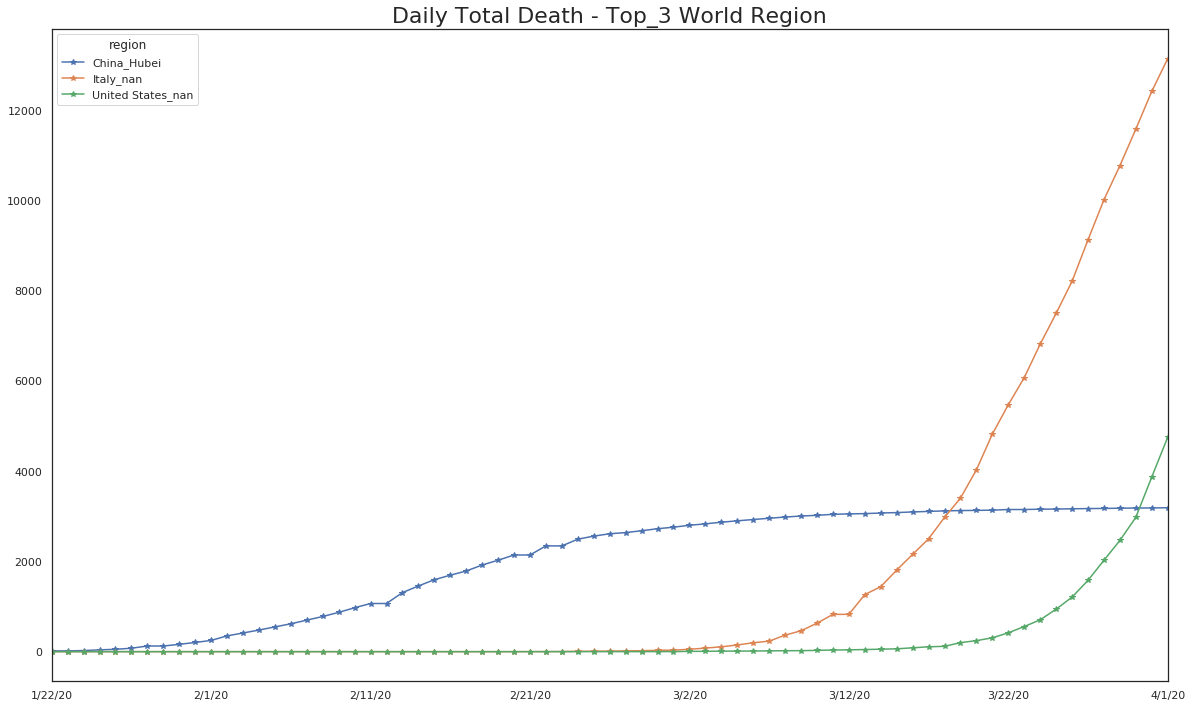

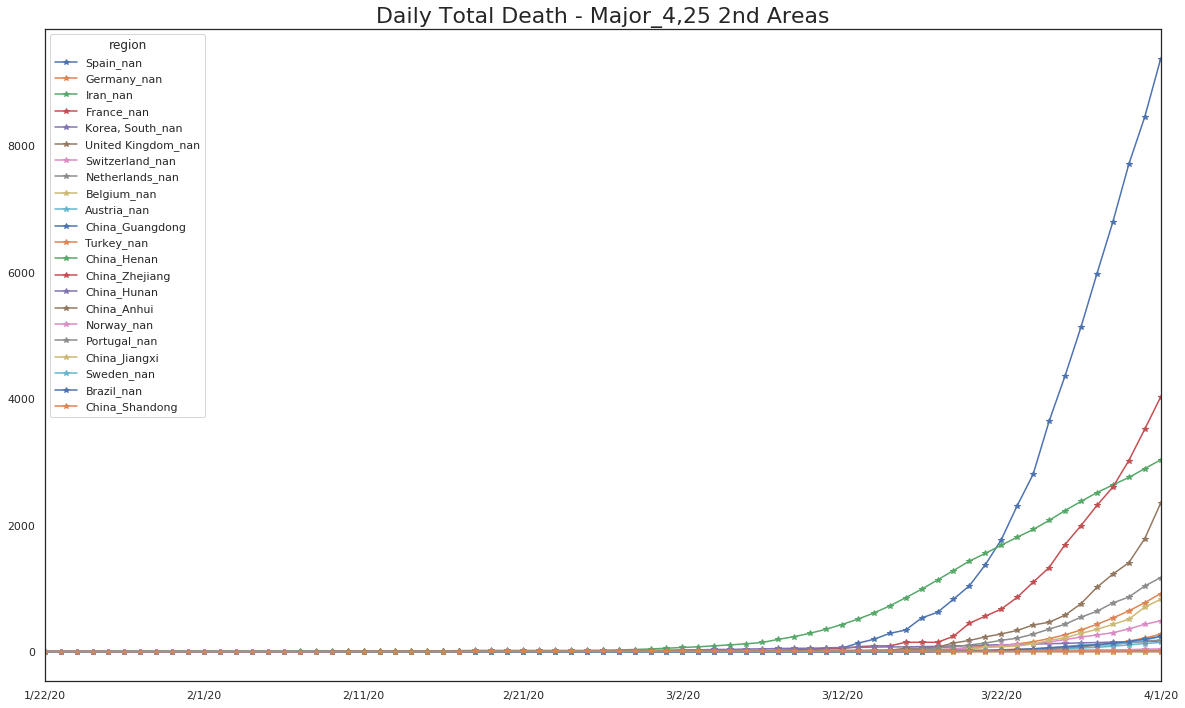

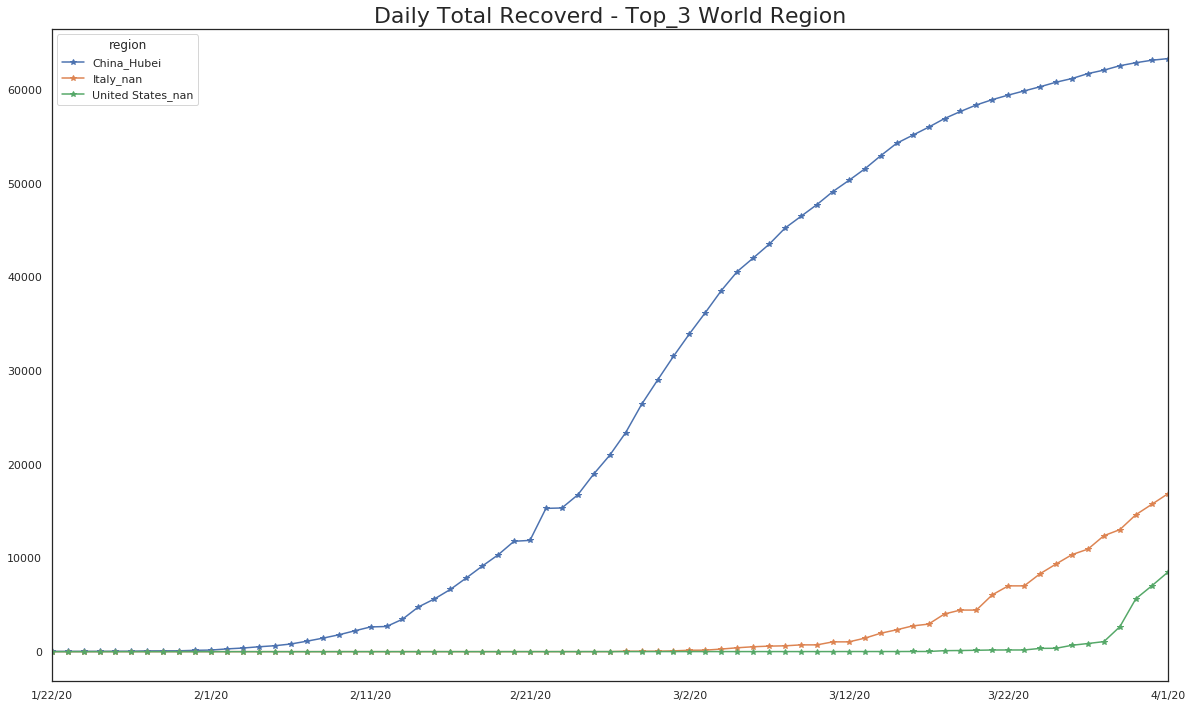

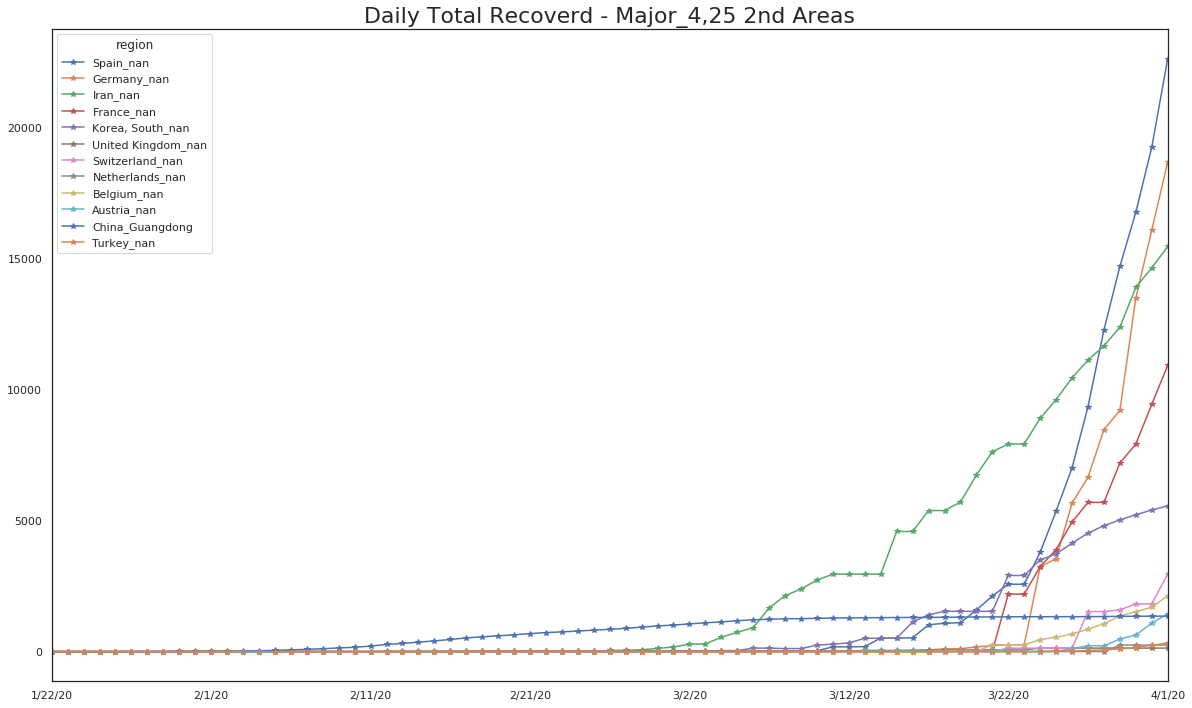

In [100]:
import matplotlib.pyplot as plt
p=ts.reindex(ts.max().sort_values(ascending=False).index, axis=1)
p.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Total Confirmed - Top_3 World Region ',fontdict={'fontsize': 22})
p.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Total Confirmed - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

p_d=ts_d.reindex(ts.mean().sort_values(ascending=False).index, axis=1)
p_d.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Total Death - Top_3 World Region',fontdict={'fontsize': 22})
p_d.iloc[:,3:25].plot(marker='*',figsize=(20,12)).set_title('Daily Total Death - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

p_r=ts_rec.reindex(ts.mean().sort_values(ascending=False).index, axis=1)
p_r.iloc[:,0:3].plot(marker='*',figsize=(20,12)).set_title('Daily Total Recoverd - Top_3 World Region',fontdict={'fontsize': 22})
p_r.iloc[:,3:15].plot(marker='*',figsize=(20,12)).set_title('Daily Total Recoverd - Major_4,25 2nd Areas',fontdict={'fontsize': 22})

### Extract Weather Data

In [13]:

#!pip install pyweatherbit

In [101]:

from weatherbit.api import Api
import json  
import pandas as pd  
from pandas.io.json import json_normalize 

### API - Joao
from datetime import datetime
#api_key="30b114eb7ebb45069cd287adadf9d3b7" # joao@fuelbigdata.com
#api_key="257c03d853ec4a9db6bd4920be591f3c" # jpacerqueira.consult.bigdata@gmail.com
api_key="27a4e12ebc7f41b2bd6e300015f1a090"

api = Api(api_key)
api.set_granularity('daily')

# # Set the granularity of the API - Options: ['daily','hourly','3hourly']
# # Will only affect forecast requests.

#api.get_forecast(lat='Lat', lon='Lon')
#my_end_date=datetime.today().strftime('%Y-%m-%d')

#### United Kingdom
#lat1='55.378100'
#lon1='-3.436000'
#api.get_history(lat=lat1,lon=lon1, start_date='2020-03-29',end_date=my_end_date)


In [102]:
##
#### My List of Countries and Regions to train and represent data
my_train_list=[
 ### JOAO - LIST of Countries - Start here
     #   'Andorra_nan', 
        'Italy_nan',
        'United States_nan',
        'Portugal_nan',
        'Spain_nan',  
        'Netherlands_nan',
        'France_nan', 
        'Belgium_nan',
        'Poland_nan',
        'United Kingdom_nan', 
        'Switzerland_nan',
        'Germany_nan',
        'Japan_nan',
  ### JOAO - LIST of Countries - Finish here
        'Korea, South_nan',
        'China_Hubei',
        'China_Beijing',
        'China_Guangdong',
        'China_Shanghai',
      #  'China_Shanxi',
      #  'China_Sichuan',  'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'China_Anhui', 'China_Beijing',
      #  'China_Chongqing', 'China_Fujian', 'China_Gansu',
      #  'China_Guangdong', 'China_Guangxi', 'China_Guizhou',
      #  'China_Hainan', 'China_Hebei', 'China_Heilongjiang', 'China_Henan',
      #  'China_Hubei', 'China_Hunan', 'China_Inner Mongolia',
      #  'China_Jiangsu', 'China_Jiangxi', 'China_Jilin', 'China_Liaoning',
      #  'China_Ningxia', 'China_Qinghai', 'China_Shaanxi',
      #  'China_Shandong', 'China_Shanghai', 'China_Shanxi',
      #  'China_Sichuan', 'China_Tianjin', 'China_Tibet', 'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'Morocco_nan',
        'Australia_New South Wales',
      #  'Australia_Queensland',
      #  'Australia_South Australia', 'Australia_Victoria', 'Belgium_nan',
      #  'Cambodia_nan',
      #  'Canada_British Columbia',
        'Canada_Ontario',
      #  'Egypt_nan',
        'China_Hong Kong',
        'China_Macau',
        'Finland_nan',
        'India_nan',
        'Iran_nan',
        'Malaysia_nan',
      #  'Nepal_nan',
        'Norway_nan',
        'Philippines_nan', 'Russia_nan', 'Singapore_nan',
    #   'Sri Lanka_nan', 'Thailand_nan', 'United Arab Emirates_nan',
        'Sweden_nan',
         'Taiwan*_nan',
         'Turkey_nan', 
         'Vietnam_nan',
       ]
#

#### Weather History

In [32]:
# ################## already done since API is limited to 500 call per day
## consume Wether data From 15/03/2020 forward to end_date=30/03/2020
#
### Location in confirmed array to start in pos 1='Albania_nan' 61 = 'China_Hong Kong'
### Only run for Countries in above : my_train_list 
vpos=76 #75 #74 #1 #73
print('xcountry_region='+confirmed.iloc[1,vpos])

start_date_init='2020-03-13'
offset_days=0 # is h! #-1 to start yesterday pick today# API free-tier just picks one per api call!
max_days=1

w=pd.DataFrame(columns=['date','region','min','max'])
for h in range(0,max_days):
    offset_days=h
    start_date=pd.to_datetime(start_date_init)
    #
    end_date=(start_date+pd.DateOffset(days=offset_days+1)).strftime('%Y-%m-%d')
    start_date=(start_date+pd.DateOffset(days=offset_days)).strftime('%Y-%m-%d')
    prnt_start_date=pd.to_datetime(start_date).strftime('%Y/%m/%d')
    prnt_end_date=pd.to_datetime(end_date).strftime('%Y/%m/%d')
    #
    for i in range (1,len(confirmed)):
        if confirmed.iloc[i,vpos] not in my_train_list:
            continue
        if confirmed.iloc[i,vpos] in my_train_list:
            #
            # Clean JSON structure return from API Call
            jas=""
            jas=api.get_history(lat=confirmed.iloc[i,2], lon=confirmed.iloc[i,3], start_date=start_date,end_date=end_date).json
            if (((json_normalize(jas['data'])['min_temp'].values[0])=='')
                 or (np.isnan((json_normalize(jas['data'])['min_temp'].values[0])) == True )):
                continue
            try:
                w=w.append({'date':prnt_end_date,'region':confirmed.iloc[i,vpos] ,'min':json_normalize(jas['data'])['min_temp'].values[0],'max':json_normalize(jas['data'])['max_temp'].values[0]}, ignore_index=True)
            except Exception:
                w=w.append({'date':prnt_end_date,'region':confirmed.iloc[i,vpos] ,'min':None,'max':None}, ignore_index=True)
#        
#
table_columns=['date','region','min','max']
w = w[w.columns.intersection(table_columns)]

xcountry_region=Albania_nan


In [33]:
w.to_csv('data/w_v2_v227.csv', index = False, header=True)

In [34]:
w[:]

date                     region   min   max
0   2020/03/14  Australia_New South Wales  16.6  25.1
1   2020/03/14                Belgium_nan   6.0  10.1
2   2020/03/14             Canada_Ontario  -6.0   0.2
3   2020/03/14              China_Beijing  -3.0  12.0
4   2020/03/14            China_Guangdong  16.7  24.7
5   2020/03/14            China_Hong Kong  19.1  22.1
6   2020/03/14                China_Hubei   9.6  14.5
7   2020/03/14                China_Macau  19.4  22.0
8   2020/03/14             China_Shanghai   8.8  17.0
9   2020/03/14                Finland_nan  -8.0   0.2
10  2020/03/14                Finland_nan  -8.0   0.2
11  2020/03/14                 France_nan   0.2  11.3
12  2020/03/14                Germany_nan   2.0  10.0
13  2020/03/14                  India_nan  22.0  31.5
14  2020/03/14                   Iran_nan   2.0  20.1
15  2020/03/14                   Iran_nan   2.0  20.1
16  2020/03/14                  Italy_nan   6.7  16.2
17  2020/03/14                  Japan_nan  -0.1  15.1
18  2020/03/14           Korea, South_nan   2.0  11.1
19  2020/03/14               Malaysia_nan  24.0  34.0
20  2020/03/14            Netherlands_nan   4.7   9.0
21  2020/03/14                 Norway_nan -10.2  -0.9
22  2020/03/14            Philippines_nan  24.9  29.0
23  2020/03/14                 Poland_nan   3.4   8.7
24  2020/03/14               Portugal_nan  10.2  17.2
25  2020/03/14                 Russia_nan  -1.2   1.0
26  2020/03/14              Singapore_nan  26.1  35.0
27  2020/03/14                  Spain_nan   9.2  23.9
28  2020/03/14                 Sweden_nan  -7.5   0.1
29  2020/03/14            Switzerland_nan  -5.4   0.2
30  2020/03/14                Taiwan*_nan  10.1  14.7
31  2020/03/14         United Kingdom_nan   0.2   6.0
32  2020/03/14          United States_nan   6.3  17.6

In [35]:

# ################## Forecast Weather With API - Already Done
# #forecast = api.get_forecast(lat=lat, lon=lon)

# w_forecast=pd.DataFrame(columns=['datetime','min_temp','max_temp','region'])
# for i in range (0,len(confirmed)):
#     jas=api.get_forecast(lat=confirmed.iloc[i,2], lon=confirmed.iloc[i,3]).json
#     jas=json_normalize(jas['data'])[['datetime','min_temp','max_temp']]
#     try:
#       w_forecast_temp=jas
#       w_forecast_temp['region']=confirmed.iloc[i,confirmed.shape[1]-1]
#     except Exception:
#       w_forecast_temp=pd.DataFrame(columns=['datetime','min_temp','max_temp','region'])
#     w_forecast=w_forecast.append(w_forecast_temp)
# w_forecast=w_forecast[['datetime','region','min_temp','max_temp']]
# w_forecast.columns = ['date', 'region', 'min', 'max']
# w_forecast['date']=pd.to_datetime(w_forecast['date'],format='%Y-%m-%d')

## Kalman Filter With R

In [103]:
# Joao - FIX - Improve Performance 
### Drop the Months of Jan and Feb < 16/02 as
### they are too in the Past and model no longuer trains in China Hubei

ts=ts[25:]
ts_d=ts_d[25:]
ts_rec=ts_rec[25:]

In [104]:
ts[:]

region   Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  Angola_nan  \
2/16/20                0            0            0            0           0   
2/17/20                0            0            0            0           0   
2/18/20                0            0            0            0           0   
2/19/20                0            0            0            0           0   
2/20/20                0            0            0            0           0   
2/21/20                0            0            0            0           0   
2/22/20                0            0            0            0           0   
2/23/20                0            0            0            0           0   
2/24/20                1            0            0            0           0   
2/25/20                1            0            1            0           0   
2/26/20                1            0            1            0           0   
2/27/20                1            0            1            0           0   
2/28/20                1            0            1            0           0   
2/29/20                1            0            1            0           0   
3/1/20                 1            0            1            0           0   
3/2/20                 1            0            3            1           0   
3/3/20                 1            0            5            1           0   
3/4/20                 1            0           12            1           0   
3/5/20                 1            0           12            1           0   
3/6/20                 1            0           17            1           0   
3/7/20                 1            0           17            1           0   
3/8/20                 4            0           19            1           0   
3/9/20                 4            2           20            1           0   
3/10/20                5           10           20            1           0   
3/11/20                7           12           20            1           0   
3/12/20                7           23           24            1           0   
3/13/20                7           33           26            1           0   
3/14/20               11           38           37            1           0   
3/15/20               16           42           48            1           0   
3/16/20               21           51           54            2           0   
3/17/20               22           55           60           39           0   
3/18/20               22           59           74           39           0   
3/19/20               22           64           87           53           0   
3/20/20               24           70           90           75           1   
3/21/20               24           76          139           88           2   
3/22/20               40           89          201          113           2   
3/23/20               40          104          230          133           3   
3/24/20               74          123          264          164           3   
3/25/20               84          146          302          188           3   
3/26/20               94          174          367          224           4   
3/27/20              110          186          409          267           4   
3/28/20              110          197          454          308           5   
3/29/20              120          212          511          334           7   
3/30/20              170          223          584          370           7   
3/31/20              174          243          716          376           7   
4/1/20               237          259          847          390           8   

region   Antigua and Barbuda_nan  Argentina_nan  Armenia_nan  \
2/16/20                        0              0            0   
2/17/20                        0              0            0   
2/18/20                        0              0            0   
2/19/20                       

In [105]:
# Create data for R script
ts_conf=ts.reset_index()
ts_conf=ts_conf.rename(columns = {'index':'date'})
ts_conf['date']=pd.to_datetime(ts_conf['date'] ,errors ='coerce')
ts_conf.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv')

ts_rec=ts_rec.reset_index()
ts_rec=ts_rec.rename(columns = {'index':'date'})
ts_rec['date']=pd.to_datetime(ts_rec['date'] ,errors ='coerce')
ts_rec.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_rec_r.csv')


ts_d=ts_d.reset_index()
ts_d=ts_d.rename(columns = {'index':'date'})
ts_d['date']=pd.to_datetime(ts_d['date'] ,errors ='coerce')
ts_d.to_csv(r'/home/notebookuser/notebooks/covid19/data/ts_d_r.csv')


In [106]:
#!pip install rpy2


In [107]:
import rpy2
%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [108]:
%%R

#install.packages('pracma')
#install.packages('Metrics')
#install.packages('readr')
#install.packages('reshape')


NULL


In [109]:
%%R
Sys.setenv(TZ='GMT')
Sys.timezone()


[1] "GMT"


In [110]:
%%R
require(pracma)
require(Metrics)
require(readr)
all<- read_csv("/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv")
all$X1<-NULL
date<-all[,1]
date[nrow(date) + 1,1] <-all[nrow(all),1]+1
pred_all<-NULL
for (n in 2:ncol(all)-1) {
  Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
  sig_w<-0.01
  w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
  sig_v<-0.01
  v<-sig_v*randn(1,100)   
  t<-0.45
  phi<-matrix(c(1,0,t,1),2,2)
  gama<-matrix(c(0.5*t^2,t),2,1)
  H<-matrix(c(1,0),1,2)
  #Kalman
  x0_0<-p0_0<-matrix(c(0,0),2,1)
  p0_0<-matrix(c(1,0,0,1),2,2)
  Q<-0.01
  R<-0.01
  X<-NULL
  X2<-NULL
  pred<-NULL
  for (i in 0:nrow(all)) {
    namp <-paste("p", i+1,"_",i, sep = "")
    assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
    namk <- paste("k", i+1, sep = "")
    assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
    namx <- paste("x", i+1,"_",i, sep = "")
    assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
    namE <- paste("E", i+1, sep = "")
    assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
    namx2 <- paste("x", i+1,"_",i+1, sep = "")
    assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
    namp2 <- paste("p", i+1,"_",i+1, sep = "")
    assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
    X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
    X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
    if(i>2){
      remove(list=(paste("p", i-1,"_",i-2, sep = "")))
      remove(list=(paste("k", i-1, sep = "")))
      remove(list=(paste("E", i-1, sep = "")))
      remove(list=(paste("p", i-2,"_",i-2, sep = "")))
      remove(list=(paste("x", i-1,"_",i-2, sep = "")))
      remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
  }
  pred<-NULL
  pred<-cbind(Y,X,round(X2,4))
  pred<-as.data.frame(pred)
  pred$region<-colnames(all[,n+1])
  pred$date<-date$date
  pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
  pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
  pred$pred_rate<-(pred$X/pred$Y-1)*100
  pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
  pred_all<-rbind(pred_all,pred)
}
pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
names(pred_all)[5]<-"X2"
pred_all=pred_all[with( pred_all, order(region, date)), ]
pred_all<-pred_all[,3:5]

cols(
  .default = col_double(),
  date = col_date(format = "")
)




In [111]:
p=%R pred_all

In [112]:
p[:]

Y          X      X2
1       0.0   0.000000  0.0000
2       0.0   0.000000  0.0000
3       0.0   0.000000  0.0000
4       0.0   0.000000  0.0000
5       0.0   0.000000  0.0000
6       0.0   0.000000  0.0000
7       0.0   0.000000  0.0000
8       0.0   0.000000  0.0000
9       1.0   0.000000  0.0000
10      1.0   0.623856  0.3281
11      1.0   1.004242  0.4512
12      1.0   1.204645  0.4498
13      1.0   1.280703  0.3826
14      1.0   1.279580  0.2905
15      1.0   1.237705  0.1987
16      1.0   1.180425  0.1208
17      1.0   1.123434  0.0616
18      1.0   1.075000  0.0211
19      1.0   1.038243 -0.0034
20      1.0   1.013101 -0.0160
21      1.0   0.997828 -0.0203
22      4.0   0.990045 -0.0196
23      4.0   2.838096  0.9671
24      5.0   3.990064  1.3479
25      7.0   5.219671  1.6790
26      7.0   7.073508  2.2626
27      7.0   8.046315  2.2385
28     11.0   8.408152  1.8955
29     16.0  10.860045  2.7451
30     21.0  15.266187  4.4299
...     ...        ...     ...
12003   0.0   0.000000  0.0000
12004   0.0   0.000000  0.0000
12005   0.0   0.000000  0.0000
12006   0.0   0.000000  0.0000
12007   0.0   0.000000  0.0000
12008   0.0   0.000000  0.0000
12009   0.0   0.000000  0.0000
12010   0.0   0.000000  0.0000
12011   0.0   0.000000  0.0000
12012   0.0   0.000000  0.0000
12013   0.0   0.000000  0.0000
12014   0.0   0.000000  0.0000
12015   0.0   0.000000  0.0000
12016   0.0   0.000000  0.0000
12017   0.0   0.000000  0.0000
12018   0.0   0.000000  0.0000
12019   1.0   0.000000  0.0000
12020   3.0   0.616903  0.3278
12021   3.0   2.234549  1.1089
12022   3.0   3.205785  1.3599
12023   3.0   3.690772  1.2924
12024   3.0   3.846214  1.0660
12025   3.0   3.803870  0.7886
12026   5.0   3.662827  0.5251
12027   7.0   4.724024  0.9634
12028   7.0   6.561613  1.7094
12029   7.0   7.601308  1.8531
12030   8.0   8.064276  1.6560
12031   8.0   8.769844  1.6350
12032   0.0   9.030664  1.3826

[12032 rows x 3 columns]

In [113]:
ts_d[:]

region       date  Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  \
0      2020-02-16                0            0            0            0   
1      2020-02-17                0            0            0            0   
2      2020-02-18                0            0            0            0   
3      2020-02-19                0            0            0            0   
4      2020-02-20                0            0            0            0   
5      2020-02-21                0            0            0            0   
6      2020-02-22                0            0            0            0   
7      2020-02-23                0            0            0            0   
8      2020-02-24                0            0            0            0   
9      2020-02-25                0            0            0            0   
10     2020-02-26                0            0            0            0   
11     2020-02-27                0            0            0            0   
12     2020-02-28                0            0            0            0   
13     2020-02-29                0            0            0            0   
14     2020-03-01                0            0            0            0   
15     2020-03-02                0            0            0            0   
16     2020-03-03                0            0            0            0   
17     2020-03-04                0            0            0            0   
18     2020-03-05                0            0            0            0   
19     2020-03-06                0            0            0            0   
20     2020-03-07                0            0            0            0   
21     2020-03-08                0            0            0            0   
22     2020-03-09                0            0            0            0   
23     2020-03-10                0            0            0            0   
24     2020-03-11                0            1            0            0   
25     2020-03-12                0            1            1            0   
26     2020-03-13                0            1            2            0   
27     2020-03-14                0            1            3            0   
28     2020-03-15                0            1            4            0   
29     2020-03-16                0            1            4            0   
30     2020-03-17                0            1            4            0   
31     2020-03-18                0            2            7            0   
32     2020-03-19                0            2            9            0   
33     2020-03-20                0            2           11            0   
34     2020-03-21                0            2           15            0   
35     2020-03-22                1            2           17            1   
36     2020-03-23                1            4           17            1   
37     2020-03-24                1            5           19            1   
38     2020-03-25                2            5           21            1   
39     2020-03-26                4            6           25            3   
40     2020-03-27                4            8           26            3   
41     2020-03-28                4           10           29            3   
42     2020-03-29                4           10           31            6   
43     2020-03-30                4           11           35            8   
44     2020-03-31                4           15           44           12   
45     2020-04-01                4           15           58           14   

region  Angola_nan  Antigua and Barbuda_nan  Argentina_nan  Armenia_nan  \
0                0                        0              0            0   
1                0                        0              0            0   
2                0                        0              0            0   
3                0                        0              0            0   
4    

In [114]:
############ Merge R output due to package problem
### Joao FIX - 
# t=ts_d    -  deaths
# t=ts_rec  -  recovered
# t=ts      -  confirmed
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

temp=t.iloc[:,:3]
temp=temp.reset_index(drop=True)
for i in range(1,len(t)+1):
  if(temp.iloc[i,1] is not temp.iloc[i-1,1]):
    temp.loc[len(temp)+1] = [temp.iloc[i-1,0]+ pd.DateOffset(1),temp.iloc[i-1,1], 0] 
temp=temp.sort_values(['region', 'date'])
temp=temp.reset_index(drop=True)
temp['Y']=p['Y']
temp['X']=p['X']
temp['X2']=p['X2']

t.tail(20)

date        region  confirmed
6911  2020-03-13  Zimbabwe_nan          0
7167  2020-03-14  Zimbabwe_nan          0
7423  2020-03-15  Zimbabwe_nan          0
7679  2020-03-16  Zimbabwe_nan          0
7935  2020-03-17  Zimbabwe_nan          0
8191  2020-03-18  Zimbabwe_nan          0
8447  2020-03-19  Zimbabwe_nan          0
8703  2020-03-20  Zimbabwe_nan          1
8959  2020-03-21  Zimbabwe_nan          3
9215  2020-03-22  Zimbabwe_nan          3
9471  2020-03-23  Zimbabwe_nan          3
9727  2020-03-24  Zimbabwe_nan          3
9983  2020-03-25  Zimbabwe_nan          3
10239 2020-03-26  Zimbabwe_nan          3
10495 2020-03-27  Zimbabwe_nan          5
10751 2020-03-28  Zimbabwe_nan          7
11007 2020-03-29  Zimbabwe_nan          7
11263 2020-03-30  Zimbabwe_nan          7
11519 2020-03-31  Zimbabwe_nan          8
11775 2020-04-01  Zimbabwe_nan          8

In [118]:
# JOAO - FIX - temp fixed
# Y,X,X2 nan issue from p revolved

p_pd=pd.DataFrame(p,columns=['Y','X','X2'])

p_pd['nindex'] = range(1, 1+len(p_pd))
temp['nindex']= range(1,1+len(temp))

#temp_1 = temp.join(p_pd)
temp_1 = temp.merge(p_pd, on='nindex', how='inner', suffixes=('_1', '_2')).rename(columns={"Y_2": "Y", "X_2": "X", "X2_2" : "X2"})
temp_1 = temp_1.drop(columns=['Y_1', 'X_1','X2_1','nindex'])


temp=temp_1
temp.to_csv(r'/home/notebookuser/notebooks/covid19/data/temp.csv')

In [123]:
temp[:]

date           region  confirmed     Y          X      X2
0     2020-02-16  Afghanistan_nan          0   0.0   0.000000  0.0000
1     2020-02-17  Afghanistan_nan          0   0.0   0.000000  0.0000
2     2020-02-18  Afghanistan_nan          0   0.0   0.000000  0.0000
3     2020-02-19  Afghanistan_nan          0   0.0   0.000000  0.0000
4     2020-02-20  Afghanistan_nan          0   0.0   0.000000  0.0000
5     2020-02-21  Afghanistan_nan          0   0.0   0.000000  0.0000
6     2020-02-22  Afghanistan_nan          0   0.0   0.000000  0.0000
7     2020-02-23  Afghanistan_nan          0   0.0   0.000000  0.0000
8     2020-02-24  Afghanistan_nan          1   1.0   0.000000  0.0000
9     2020-02-25  Afghanistan_nan          1   1.0   0.623856  0.3281
10    2020-02-26  Afghanistan_nan          1   1.0   1.004242  0.4512
11    2020-02-27  Afghanistan_nan          1   1.0   1.204645  0.4498
12    2020-02-28  Afghanistan_nan          1   1.0   1.280703  0.3826
13    2020-02-29  Afghanistan_nan          1   1.0   1.279580  0.2905
14    2020-03-01  Afghanistan_nan          1   1.0   1.237705  0.1987
15    2020-03-02  Afghanistan_nan          1   1.0   1.180425  0.1208
16    2020-03-03  Afghanistan_nan          1   1.0   1.123434  0.0616
17    2020-03-04  Afghanistan_nan          1   1.0   1.075000  0.0211
18    2020-03-05  Afghanistan_nan          1   1.0   1.038243 -0.0034
19    2020-03-06  Afghanistan_nan          1   1.0   1.013101 -0.0160
20    2020-03-07  Afghanistan_nan          1   1.0   0.997828 -0.0203
21    2020-03-08  Afghanistan_nan          4   4.0   0.990045 -0.0196
22    2020-03-09  Afghanistan_nan          4   4.0   2.838096  0.9671
23    2020-03-10  Afghanistan_nan          5   5.0   3.990064  1.3479
24    2020-03-11  Afghanistan_nan          7   7.0   5.219671  1.6790
25    2020-03-12  Afghanistan_nan          7   7.0   7.073508  2.2626
26    2020-03-13  Afghanistan_nan          7   7.0   8.046315  2.2385
27    2020-03-14  Afghanistan_nan         11  11.0   8.408152  1.8955
28    2020-03-15  Afghanistan_nan         16  16.0  10.860045  2.7451
29    2020-03-16  Afghanistan_nan         21  21.0  15.266187  4.4299
...          ...              ...        ...   ...        ...     ...
12002 2020-03-04     Zimbabwe_nan          0   0.0   0.000000  0.0000
12003 2020-03-05     Zimbabwe_nan          0   0.0   0.000000  0.0000
12004 2020-03-06     Zimbabwe_nan          0   0.0   0.000000  0.0000
12005 2020-03-07     Zimbabwe_nan          0   0.0   0.000000  0.0000
12006 2020-03-08     Zimbabwe_nan          0   0.0   0.000000  0.0000
12007 2020-03-09     Zimbabwe_nan          0   0.0   0.000000  0.0000
12008 2020-03-10     Zimbabwe_nan          0   0.0   0.000000  0.0000
12009 2020-03-11     Zimbabwe_nan          0   0.0   0.000000  0.0000
12010 2020-03-12     Zimbabwe_nan          0   0.0   0.000000  0.0000
12011 2020-03-13     Zimbabwe_nan          0   0.0   0.000000  0.0000
12012 2020-03-14     Zimbabwe_nan          0   0.0   0.000000  0.0000
12013 2020-03-15     Zimbabwe_nan          0   0.0   0.000000  0.0000
12014 2020-03-16     Zimbabwe_nan          0   0.0   0.000000  0.0000
12015 2020-03-17     Zimbabwe_nan          0   0.0   0.000000  0.0000
12016 2020-03-18     Zimbabwe_nan          0   0.0   0.000000  0.0000
12017 2020-03-19     Zimbabwe_nan          0   0.0   0.000000  0.0000
12018 2020-03-20     Zimbabwe_nan          1   1.0   0.000000  0.0000
12019 2020-03-21     Zimbabwe_nan          3   3.0   0.616903  0.3278
12020 2020-03-22     Zimbabwe_nan          3   3.0   2.234549  1.1089
12021 2020-03-23     Zimbabwe_nan          3   3.0   3.205785  1.3599
12022 2020-03-24     Zimbabwe_nan          3   3.0   3.690772  1.2924
12023 2020-03-25     Zimbabwe_nan          3   3.0   3.846214  1.0660
12024 2020-03-26     Zimbabwe_nan          3   3.0   3.803870  0.7886
12025 2020-03-27     Zimbabwe_nan          5   5.0   3.662827  0.5251
12026 2020-03-28     Zimbabwe_nan          7   7.0   4.724024  0.9634
12027 2020-03-29     Z

## Pre Proccessing Data for ML Model

### Extract Weather Forecast Data

In [124]:
#
### Joao - Test Later Weather from new file : w_v2.csv and w_v2_v2.csv
w_v2=pd.read_csv('/home/notebookuser/notebooks/covid19/data/w_v2.csv', sep=',', encoding='latin1')
w_v2['date']=pd.to_datetime(w_v2['date'],format='%Y/%m/%d')

#w_1_total=pd.read_csv('/home/notebookuser/notebooks/covid19/data/w_total.csv', sep=',', encoding='latin1')
#w_1_total['date']=pd.to_datetime(w_1_total['date'],format='%Y/%m/%d')
w_v2_v2=pd.read_csv('/home/notebookuser/notebooks/covid19/data/w_v2_v2.csv', sep=',', encoding='latin1')
w_v2_v2['date']=pd.to_datetime(w_v2_v2['date'],format='%Y/%m/%d')

w=pd.read_csv('/home/notebookuser/notebooks/covid19/data/w.csv', sep=',', encoding='latin1')
w['date']=pd.to_datetime(w['date'],format='%d/%m/%Y')

w_forecast=pd.read_csv('/home/notebookuser/notebooks/covid19/data/w_forecast.csv', sep=',', encoding='latin1')
w_forecast['date']=pd.to_datetime(w_forecast['date'],format='%d/%m/%Y')

In [125]:
w_total=pd.DataFrame(columns=['date','region','min','max'])
w_total=w.append(w_forecast).append(w_v2).append(w_v2_v2) # w_1_total.append(w_v2) #
w_total=w_total.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
w_total=w_total.sort_values(by=['region','date'], ascending=True)

w_total.to_csv(r'data/w_total.csv', index = False, header=True)

In [126]:
w_in_model=pd.read_csv('/home/notebookuser/notebooks/covid19/data/w_total.csv', sep=',', encoding='latin1')
#
w_in_model['date']=pd.to_datetime(w_in_model['date'],format='%Y/%m/%d')
w_in_model.to_csv(r'data/w_in_model.csv', index = False, header=True)

In [127]:
w_in_model.tail(10)

date       region   min   max
5438 2020-03-04  Vietnam_nan  18.9  28.0
5439 2020-03-05  Vietnam_nan  18.3  21.9
5440 2020-03-06  Vietnam_nan  19.8  26.7
5441 2020-03-07  Vietnam_nan  22.0  27.2
5442 2020-03-08  Vietnam_nan  23.0  28.9
5443 2020-03-09  Vietnam_nan  23.4  29.6
5444 2020-03-10  Vietnam_nan  22.1  26.1
5445 2020-03-11  Vietnam_nan  22.2  27.4
5446 2020-03-12  Vietnam_nan  23.6  28.2
5447 2020-03-13  Vietnam_nan  22.9  28.4

### Build Train Set Data Structure

In [128]:
### JOAO - Fix -
## t=ts confirmed
t=ts
t=t.stack().reset_index(name='confirmed')
t.columns=['date', 'region','confirmed']
t['date']=pd.to_datetime(t['date'] ,errors ='coerce')
t=t.sort_values(['region', 'date'])

# Add 1 Future day for prediction
t=t.reset_index(drop=True)
for i in range(1,len(t)+1):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        t.loc[len(t)+1] = [t.iloc[i-1,0]+ pd.DateOffset(1),t.iloc[i-1,1], 0] 
t=t.sort_values(['region', 'date'])
t=t.reset_index(drop=True)

In [129]:
### JOAO - Fix -
t['1_day_change']=t['3_day_change']=t['7_day_change']=t['1_day_change_rate']=t['3_day_change_rate']=t['7_day_change_rate']=t['last_day']=0
#
### JOAO - Fix - ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
for i in range(1,len(t)):
    if(t.iloc[i,1] is t.iloc[i-2,1]):
        t.iloc[i,3]=t.iloc[i-1,2]-t.iloc[i-2,2]
        t.iloc[i,6]=((t.iloc[i-1,2] +1)/(t.iloc[i-2,2]-1 +1))*100
        t.iloc[i,9]=t.iloc[i-1,2]
    if(t.iloc[i,1] is t.iloc[i-4,1]):
        t.iloc[i,4]=t.iloc[i-1,2]-t.iloc[i-4,2]
        t.iloc[i,7]=((t.iloc[i-1,2] +1)/(t.iloc[i-4,2]-1 +1))*100
    if(t.iloc[i,1] is t.iloc[i-8,1]):
        t.iloc[i,5]=t.iloc[i-1,2]-t.iloc[i-8,2]
        t.iloc[i,8]=((t.iloc[i-1,2] +1)/(t.iloc[i-8,2]-1 +1))*100
t=t.fillna(0)  
t=t.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
t=t.rename(columns = {'X':'kalman_prediction'}) 
t=t.replace([np.inf, -np.inf], 0)

### Joao - Fix NaN Kalman_Filter
t['kalman_prediction']=np.nan_to_num(t['kalman_prediction'])
t['kalman_prediction']=round(t['kalman_prediction'])

#
train=t.merge(confirmed[['region',' Population ']],how='left',on='region')
train=train.rename(columns = {' Population ':'population'})
train['population']=train['population'].str.replace(r" ", '')
train['population']=train['population'].str.replace(r",", '')
train['population']=train['population'].fillna(1000000) ### Fill 1M if nan
train['population']=train['population'].astype('int32')
### JOAO - Fix - ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
# train['infected_rate']=train['last_day']/train['population']*10000
train['infected_rate']=((train['last_day'] +1)/((train['population'] +1) *10000))
#
#### Joao , merge w weather only !?!
##train=train.merge(w,how='left',on=['date','region'])
w_total=pd.DataFrame(columns=['date','region','min','max'])
w_total=w.append(w_forecast).append(w_v2).append(w_v2_v2)
w_total=w_total.drop_duplicates(subset=['date','region'], keep='last', inplace=False)
w_total=w_total.sort_values(by=['region','date'], ascending=True)
#
train=train.merge(w_total,how='left',on=['date','region'])
#
train=train.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(train)):
    if(np.isnan(train.iloc[i,13])):
        if(train.iloc[i,1] is train.iloc[i-1,1]):
            train.iloc[i,13]=train.iloc[i-1,13]
            train.iloc[i,14]=train.iloc[i-1,14]

/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in long_scalars
  
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in long_scalars
  if sys.path[0] == '':
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in long_scalars
  from ipykernel import kernelapp as app


In [130]:
# Joao - Fix - Nulls are an issue
train_notnull=train[train['kalman_prediction'] != 0.0 ] #.any(axis=1)]
train_notnull[:]

date                  region  confirmed  1_day_change  \
9     2020-02-25         Afghanistan_nan          1             1   
10    2020-02-26         Afghanistan_nan          1             0   
11    2020-02-27         Afghanistan_nan          1             0   
12    2020-02-28         Afghanistan_nan          1             0   
13    2020-02-29         Afghanistan_nan          1             0   
14    2020-03-01         Afghanistan_nan          1             0   
15    2020-03-02         Afghanistan_nan          1             0   
16    2020-03-03         Afghanistan_nan          1             0   
17    2020-03-04         Afghanistan_nan          1             0   
18    2020-03-05         Afghanistan_nan          1             0   
19    2020-03-06         Afghanistan_nan          1             0   
20    2020-03-07         Afghanistan_nan          1             0   
21    2020-03-08         Afghanistan_nan          4             0   
22    2020-03-09         Afghanistan_nan          4             3   
23    2020-03-10         Afghanistan_nan          5             0   
24    2020-03-11         Afghanistan_nan          7             1   
25    2020-03-12         Afghanistan_nan          7             2   
26    2020-03-13         Afghanistan_nan          7             0   
27    2020-03-14         Afghanistan_nan         11             0   
28    2020-03-15         Afghanistan_nan         16             4   
29    2020-03-16         Afghanistan_nan         21             5   
30    2020-03-17         Afghanistan_nan         22             5   
31    2020-03-18         Afghanistan_nan         22             1   
32    2020-03-19         Afghanistan_nan         22             0   
33    2020-03-20         Afghanistan_nan         24             0   
34    2020-03-21         Afghanistan_nan         24             2   
35    2020-03-22         Afghanistan_nan         40             0   
36    2020-03-23         Afghanistan_nan         40            16   
37    2020-03-24         Afghanistan_nan         74             0   
38    2020-03-25         Afghanistan_nan         84            34   
...          ...                     ...        ...           ...   
12030 2020-04-01  West Bank and Gaza_nan        134             3   
12031 2020-04-02  West Bank and Gaza_nan          0            15   
12064 2020-03-19              Zambia_nan          2             2   
12065 2020-03-20              Zambia_nan          2             0   
12066 2020-03-21              Zambia_nan          2             0   
12067 2020-03-22              Zambia_nan          3             0   
12068 2020-03-23              Zambia_nan          3             1   
12069 2020-03-24              Zambia_nan          3             0   
12070 2020-03-25              Zambia_nan         12             0   
12071 2020-03-26              Zambia_nan         16             9   
12072 2020-03-27              Zambia_nan         22             4   
12073 2020-03-28              Zambia_nan         28             6   
12074 2020-03-29              Zambia_nan         29             6   
12075 2020-03-30              Zambia_nan         35             1   
12076 2020-03-31              Zambia_nan         35             6   
12077 2020-04-01              Zambia_nan         36             0   
12078 2020-04-02              Zambia_nan          0             1   
12113 2020-03-21            Zimbabwe_nan          3             1   
12114 2020-03-22            Zimbabwe_nan          3             2   
12115 2020-03-23            Zimbabwe_nan          3             0   
12116 2020-03-24            Zimbabwe_nan          3             0   
12117 2020-03-25            Zimbabwe_nan          3             0   
12118 2020-03-26            Zimbabwe_nan          3             0   
12119 2020-03-27            Zimbabwe_nan          5             0   
12120 2020-03-28            Zimbabwe_nan          7             2   
12121 2020-03-29            Zimbabwe_nan          7             2   
12122 2020

In [131]:
# Joao - Fix - Nulls are an issue
train_nulls=train[train['kalman_prediction'].isnull() ] #.any(axis=1)]
train_nulls[:]

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, 1_day_change_rate, 3_day_change_rate, 7_day_change_rate, last_day, kalman_prediction, population, infected_rate, min, max]
Index: []

In [132]:
# Joao - Fix - Nulls are an issue
train_nulls=train[train.isnull().any(axis=1)]
train_nulls[:]

date           region  confirmed  1_day_change  3_day_change  \
0     2020-02-16  Afghanistan_nan          0             0             0   
1     2020-02-17  Afghanistan_nan          0             0             0   
47    2020-02-16      Albania_nan          0             0             0   
48    2020-02-17      Albania_nan          0             0             0   
49    2020-02-18      Albania_nan          0             0             0   
50    2020-02-19      Albania_nan          0             0             0   
51    2020-02-20      Albania_nan          0             0             0   
52    2020-02-21      Albania_nan          0             0             0   
53    2020-02-22      Albania_nan          0             0             0   
54    2020-02-23      Albania_nan          0             0             0   
55    2020-02-24      Albania_nan          0             0             0   
56    2020-02-25      Albania_nan          0             0             0   
57    2020-02-26      Albania_nan          0             0             0   
58    2020-02-27      Albania_nan          0             0             0   
59    2020-02-28      Albania_nan          0             0             0   
60    2020-02-29      Albania_nan          0             0             0   
61    2020-03-01      Albania_nan          0             0             0   
62    2020-03-02      Albania_nan          0             0             0   
63    2020-03-03      Albania_nan          0             0             0   
64    2020-03-04      Albania_nan          0             0             0   
65    2020-03-05      Albania_nan          0             0             0   
66    2020-03-06      Albania_nan          0             0             0   
67    2020-03-07      Albania_nan          0             0             0   
68    2020-03-08      Albania_nan          0             0             0   
69    2020-03-09      Albania_nan          2             0             0   
70    2020-03-10      Albania_nan         10             2             2   
71    2020-03-11      Albania_nan         12             8            10   
72    2020-03-12      Albania_nan         23             2            12   
73    2020-03-13      Albania_nan         33            11            21   
74    2020-03-14      Albania_nan         38            10            23   
...          ...              ...        ...           ...           ...   
12096 2020-03-04     Zimbabwe_nan          0             0             0   
12097 2020-03-05     Zimbabwe_nan          0             0             0   
12098 2020-03-06     Zimbabwe_nan          0             0             0   
12099 2020-03-07     Zimbabwe_nan          0             0             0   
12100 2020-03-08     Zimbabwe_nan          0             0             0   
12101 2020-03-09     Zimbabwe_nan          0             0             0   
12102 2020-03-10     Zimbabwe_nan          0             0             0   
12103 2020-03-11     Zimbabwe_nan          0             0             0   
12104 2020-03-12     Zimbabwe_nan          0             0             0   
12105 2020-03-13     Zimbabwe_nan          0             0             0   
12106 2020-03-14     Zimbabwe_nan          0             0             0   
12107 2020-03-15     Zimbabwe_nan          0             0             0   
12108 2020-03-16     Zimbabwe_nan          0             0             0   
12109 2020-03-17     Zimbabwe_nan          0             0             0   
12110 2020-03-18     Zimbabwe_nan          0             0             0   
12111 2020-03-19     Zimbabwe_nan          0             0             0   
12112 2020-03-20     Zimbabwe_nan          1             0             0   
12113 2020-03-21     Zimbabwe_nan          3             1             1   
12114 2020-03-22     Zimbabwe_nan          3             2             3   
12115 2020-03-23     Zimbabwe_nan          3             0             3   
12116 2020-03-24     Zimbabwe_nan          3             0  

## Kalman 1 day Prediction with Evaluation

        region           mse          rmse          mae
148  Italy_nan  2.963564e+08  17215.004244  3551.782609


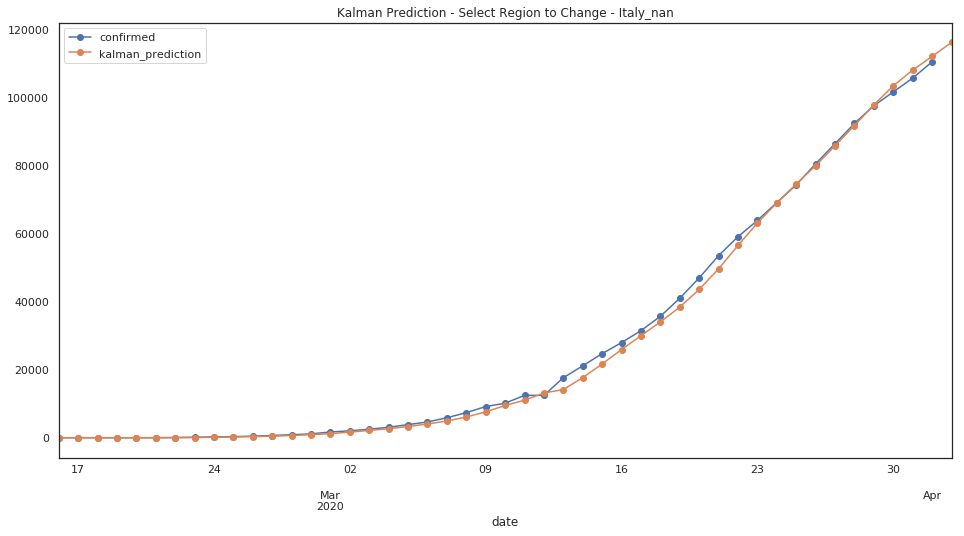

In [133]:
### JOAO - ERROR - ValueError: Input contains NaN, infinity or a value too large for dtype('float64').
# Select region
region='Italy_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

        region           mse          rmse          mae
220  Spain_nan  2.758662e+08  16609.220506  3602.586957


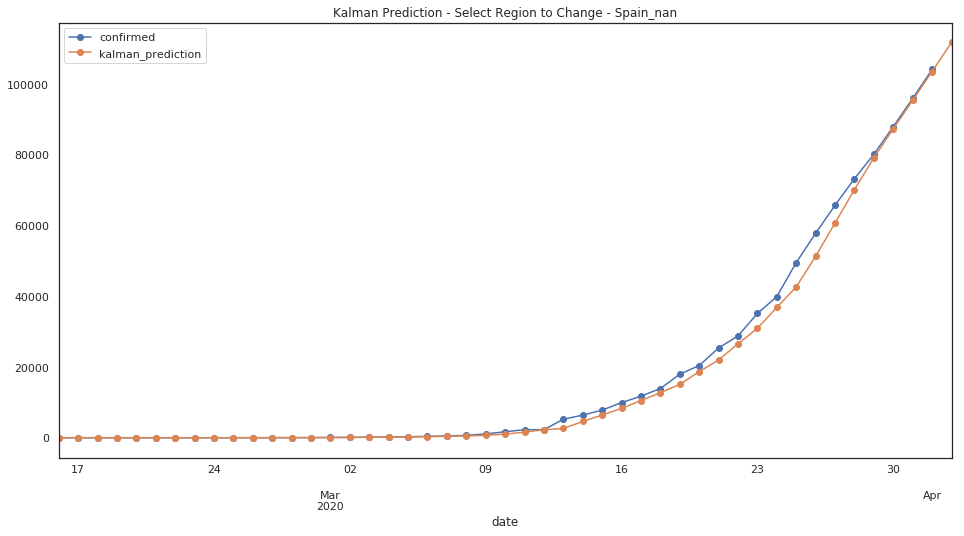

In [134]:
# Select region
region='Spain_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

                 region           mse         rmse          mae
247  United Kingdom_nan  2.172506e+07  4661.014948  1112.565217


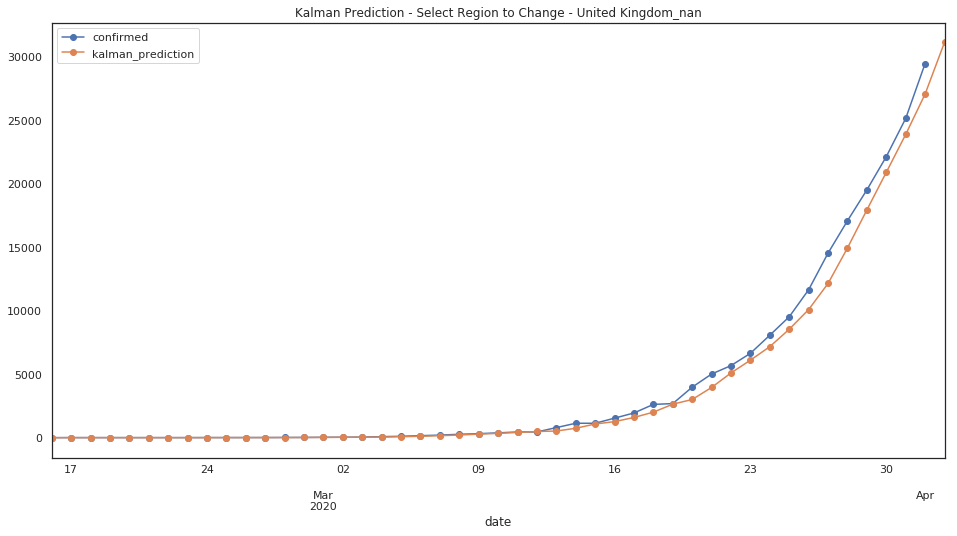

In [135]:
# Select region
region='United Kingdom_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

                region           mse          rmse          mae
248  United States_nan  1.176764e+09  34303.991076  8250.108696


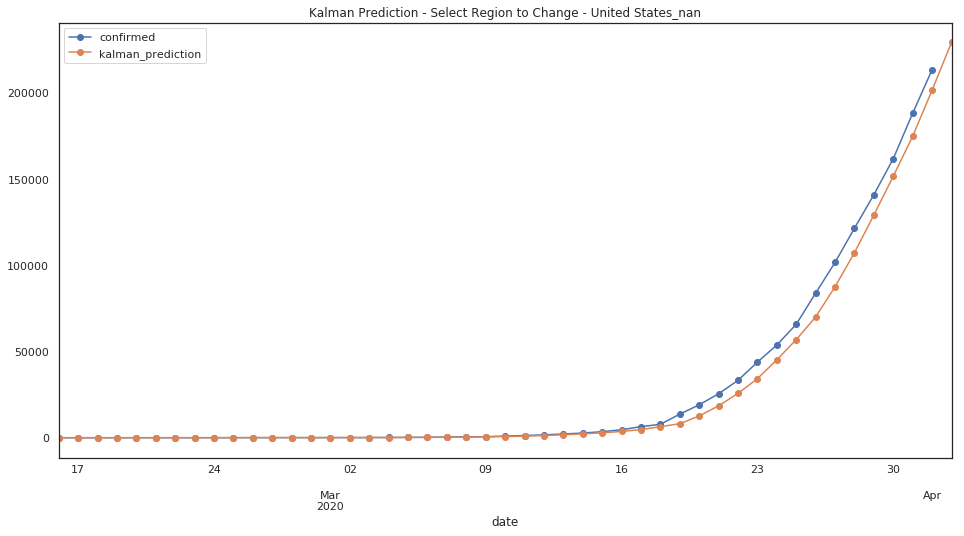

In [136]:
# Select region
region='United States_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

          region           mse          rmse          mae
129  Germany_nan  1.537213e+08  12398.439102  2693.826087


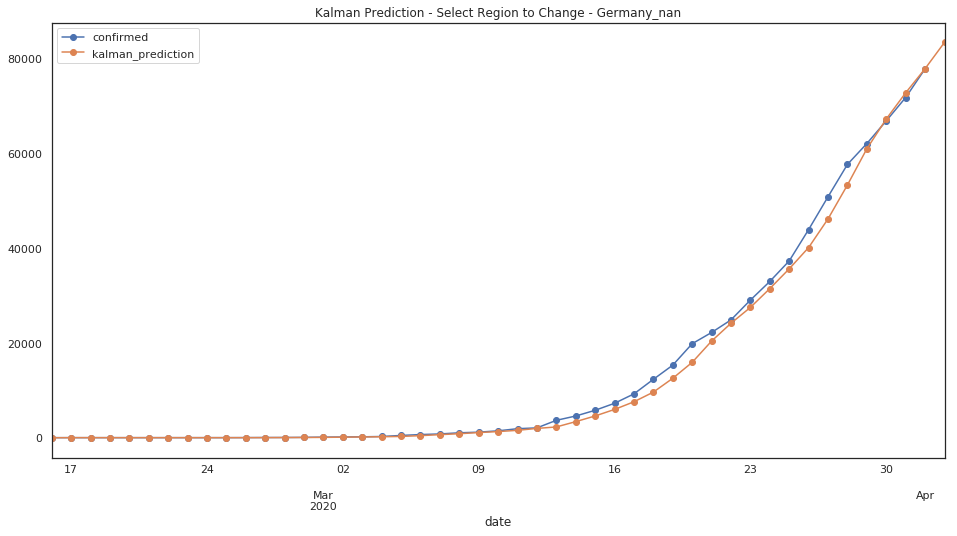

In [137]:
# Select region
region='Germany_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

         region           mse         rmse          mae
125  France_nan  8.055771e+07  8975.394924  2025.521739


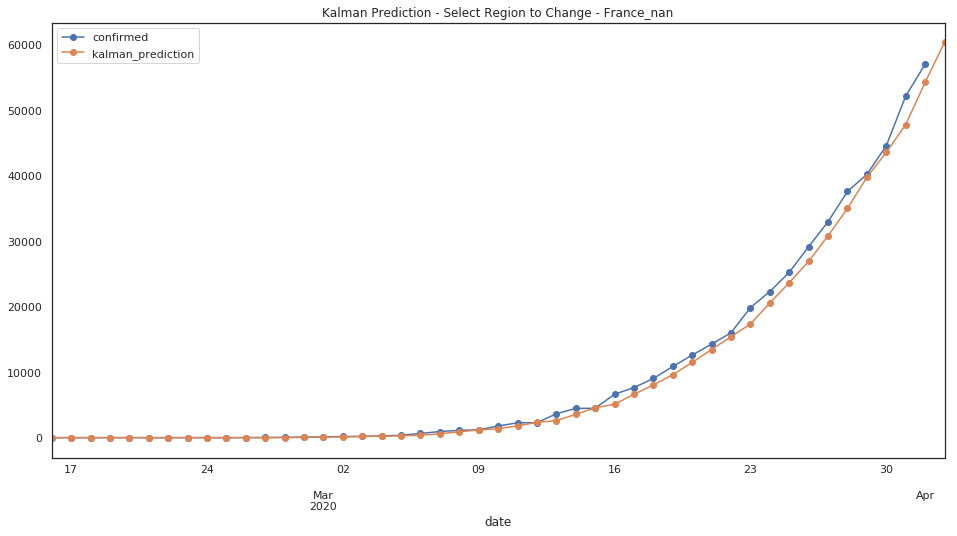

In [138]:
# Select region
region='France_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

           region           mse         rmse         mae
201  Portugal_nan  1.766160e+06  1328.969395  309.391304


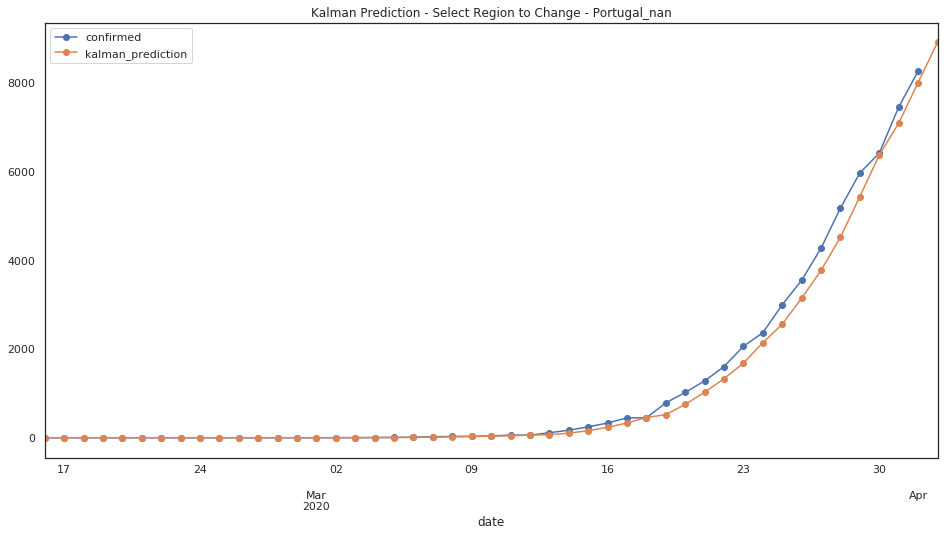

In [139]:
# Select region
region='Portugal_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

              region           mse         rmse         mae
225  Switzerland_nan  7.771908e+06  2787.814248  600.847826


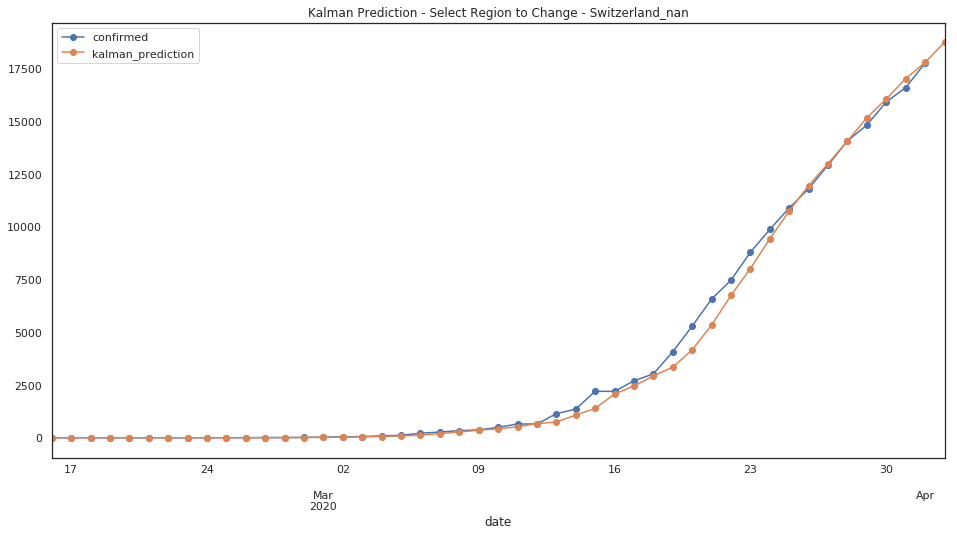

In [140]:
# Select region
region='Switzerland_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

         region           mse         rmse        mae
16  Austria_nan  2.955336e+06  1719.109008  388.26087


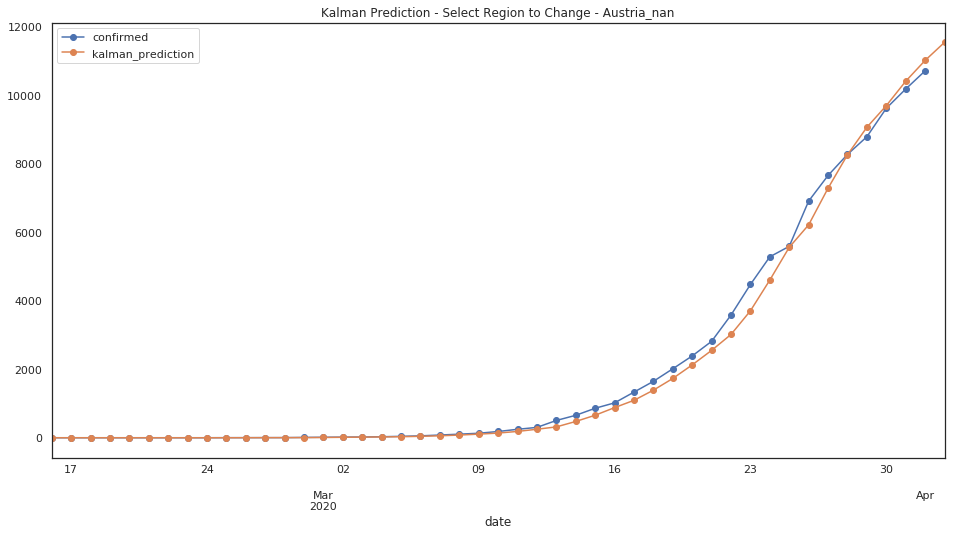

In [141]:
# Select region
region='Austria_nan'

evaluation=pd.DataFrame(columns=['region','mse','rmse','mae'])
place=0
for i in range(1,len(t)):
    if(t.iloc[i,1] is not t.iloc[i-1,1]):
        ex=np.array(t.iloc[i-len(ts):i,10])
        pred=np.array(t.iloc[i-len(ts):i,2])
        evaluation=evaluation.append({'region': t.iloc[i-1,1], 'mse': np.power((ex - pred),2).mean(),'rmse':sqrt(mean_squared_error(ex,pred)),'mae': (abs(ex - pred)).mean()}, ignore_index=True)
p=t[t['region']==region][['date','region','confirmed','kalman_prediction']]
#p=p.rename(columns = {'confirmed':'recoverd'})
p.iloc[len(p)-1,2]=None
p=p.set_index(['date'])
p.iloc[:,1:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Region to Change - {}'.format(p.iloc[0,0]))

print(evaluation[evaluation['region']==p.iloc[0,0]])

## Regression - 1 Day Prediction

In [142]:
#!pip install h2o
import h2o
from h2o.estimators import H2ORandomForestEstimator
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.grid.grid_search import H2OGridSearch
h2o.init(min_mem_size='7G')
import numpy as np
from sklearn.linear_model import LinearRegression

Checking whether there is an H2O instance running at http://localhost:54321. connected.


--------------------------  ----------------------------------------
H2O cluster uptime:         41 mins 18 secs
H2O cluster timezone:       Etc/GMT
H2O data parsing timezone:  UTC
H2O cluster version:        3.22.0.1
H2O cluster version age:    1 year, 5 months and 6 days !!!
H2O cluster name:           H2O_from_python_unknownUser_04x344
H2O cluster total nodes:    1
H2O cluster free memory:    6.980 Gb
H2O cluster total cores:    8
H2O cluster allowed cores:  8
H2O cluster status:         locked, healthy
H2O connection url:         http://localhost:54321
H2O connection proxy:
H2O internal security:      False
H2O API Extensions:         XGBoost, Algos, AutoML, Core V3, Core V4
Python version:             3.7.3 final
--------------------------  ----------------------------------------

In [143]:
##
#### My List of Countries and Regions to train and represent data
my_train_list=[
 ### JOAO - LIST of Countries - Start here
     #   'Andorra_nan', 
        'Italy_nan',
        'United States_nan',
        'Portugal_nan',
        'Spain_nan',  
        'Netherlands_nan',
        'France_nan', 
        'Belgium_nan',
        'Poland_nan',
        'United Kingdom_nan', 
        'Switzerland_nan',
        'Germany_nan',
        'Japan_nan',
  ### JOAO - LIST of Countries - Finish here
        'Korea, South_nan',
        'China_Hubei',
        'China_Beijing',
        'China_Guangdong',
        'China_Shanghai',
      #  'China_Shanxi',
      #  'China_Sichuan',  'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'China_Anhui', 'China_Beijing',
      #  'China_Chongqing', 'China_Fujian', 'China_Gansu',
      #  'China_Guangdong', 'China_Guangxi', 'China_Guizhou',
      #  'China_Hainan', 'China_Hebei', 'China_Heilongjiang', 'China_Henan',
      #  'China_Hubei', 'China_Hunan', 'China_Inner Mongolia',
      #  'China_Jiangsu', 'China_Jiangxi', 'China_Jilin', 'China_Liaoning',
      #  'China_Ningxia', 'China_Qinghai', 'China_Shaanxi',
      #  'China_Shandong', 'China_Shanghai', 'China_Shanxi',
      #  'China_Sichuan', 'China_Tianjin', 'China_Tibet', 'China_Xinjiang',
      #  'China_Yunnan', 'China_Zhejiang',
      #  'Morocco_nan',
        'Australia_New South Wales',
      #  'Australia_Queensland',
      #  'Australia_South Australia', 'Australia_Victoria', 'Belgium_nan',
      #  'Cambodia_nan',
      #  'Canada_British Columbia',
        'Canada_Ontario',
      #  'Egypt_nan',
        'China_Hong Kong',
        'China_Macau',
        'Finland_nan',
        'India_nan',
        'Iran_nan',
        'Malaysia_nan',
      #  'Nepal_nan',
        'Norway_nan',
        'Philippines_nan', 'Russia_nan', 'Singapore_nan',
    #   'Sri Lanka_nan', 'Thailand_nan', 'United Arab Emirates_nan',
        'Sweden_nan',
         'Taiwan*_nan',
         'Turkey_nan', 
         'Vietnam_nan',
       ]
#

In [144]:
train=train.fillna(0) 

###train_df=train[train['date']<'2020-02-17']
###boots=train_df[train_df['date']>='2020-02-14'] # some bootstrap to give more weight for recent days
###train_df=train_df.append([boots[boots['date']>='2020-02-14']]*1000,ignore_index=True)
###train_df_hubei=train_df[train_df['region']=='China_Hubei']
###test=train[train['date']>='2020-02-17']
###test=test[test['date']<'2020-02-19']
###
### Joao - Training  progression - When growth happened 2020/03/18 to 2020/03/21
train_df=train[train['date']<'2020-03-28']
boots=train_df[train_df['date']>='2020-03-26'] # some bootstrap to give more weight for recent days
train_df=train_df.append([boots[boots['date']>='2020-03-28']]*100,ignore_index=True)

### Train progression of the Virus ### In Country list or Spain only
region_to_train=my_train_list
train_df_v2=train_df[train_df['region'].isin(region_to_train)] # =='Spain_nan'] #
test=train[train['date']>='2020-03-28']
test=test[test['date']<'2020-04-03']
test_v2=test[test['region'].isin(region_to_train)]

In [145]:
x_col=[#'region',
            '1_day_change', '3_day_change','7_day_change',
            '1_day_change_rate', 
            '3_day_change_rate',
            '7_day_change_rate', 
            'last_day',
            'kalman_prediction',
            'infected_rate', 'min', 'max'
          ]

In [146]:
x=train_df[x_col]
y=train_df['confirmed']
reg = LinearRegression().fit(x,y)

pred2=reg.predict(test[x_col]); pred2=pd.DataFrame(pred2); pred2=round(pred2)
pred2['confirmed']=test['confirmed'].values; pred2['date']=test['date'].values; pred2['region']=test['region'].values


In [147]:
pred2.iloc[175:195]

0  confirmed       date        region
175     9.0          0 2020-03-29  Botswana_nan
176     9.0          3 2020-03-30  Botswana_nan
177    13.0          4 2020-03-31  Botswana_nan
178     1.0          4 2020-04-01  Botswana_nan
179     5.0          0 2020-04-02  Botswana_nan
180  3939.0       3904 2020-03-28    Brazil_nan
181  4497.0       4256 2020-03-29    Brazil_nan
182  4854.0       4579 2020-03-30    Brazil_nan
183  5157.0       5717 2020-03-31    Brazil_nan
184  6550.0       6836 2020-04-01    Brazil_nan
185  7885.0          0 2020-04-02    Brazil_nan
186   115.0        120 2020-03-28    Brunei_nan
187   120.0        126 2020-03-29    Brunei_nan
188   125.0        127 2020-03-30    Brunei_nan
189   125.0        129 2020-03-31    Brunei_nan
190   128.0        131 2020-04-01    Brunei_nan
191   128.0          0 2020-04-02    Brunei_nan
192   312.0        331 2020-03-28  Bulgaria_nan
193   355.0        346 2020-03-29  Bulgaria_nan
194   367.0        359 2020-03-30  Bulgaria_nan

In [148]:
pred2.iloc[220:240]

0  confirmed       date          region
220    7.0          6 2020-04-01  Cabo Verde_nan
221    6.0          0 2020-04-02  Cabo Verde_nan
222  141.0         99 2020-03-28    Cambodia_nan
223  136.0        103 2020-03-29    Cambodia_nan
224  145.0        107 2020-03-30    Cambodia_nan
225  148.0        109 2020-03-31    Cambodia_nan
226  150.0        109 2020-04-01    Cambodia_nan
227  149.0          0 2020-04-02    Cambodia_nan
228   99.0         91 2020-03-28    Cameroon_nan
229   94.0        139 2020-03-29    Cameroon_nan
230  159.0        139 2020-03-30    Cameroon_nan
231  151.0        193 2020-03-31    Cameroon_nan
232  230.0        233 2020-04-01    Cameroon_nan
233  258.0          0 2020-04-02    Cameroon_nan
234  583.0        542 2020-03-28  Canada_Alberta
235  602.0        621 2020-03-29  Canada_Alberta
236  661.0        661 2020-03-30  Canada_Alberta
237  680.0        690 2020-03-31  Canada_Alberta
238  729.0        754 2020-04-01  Canada_Alberta
239  769.0          0 2020-04-02  Canada_Alberta

In [149]:

train_h20 = h2o.H2OFrame(train_df)
###train_h20_hubei = h2o.H2OFrame(train_df_hubei) # different model for Hubei
#
### Joao - Italian Model
train_h20_v2 = h2o.H2OFrame(train_df_v2) # different model for V2 region ### Spain This time

training_columns = ['region','1_day_change', '3_day_change', '7_day_change', '1_day_change_rate', '3_day_change_rate',
                    '7_day_change_rate', 'last_day', 'kalman_prediction','infected_rate', 'min', 'max'
                   ]                 
# Output parameter train against input parameters
response_column = 'confirmed'

# model = H2ORandomForestEstimator(ntrees=300, max_depth=12)
# model.train(x=training_columns, y=response_column, training_frame=train_h20)

###model_hubei = H2ORandomForestEstimator(ntrees=300, max_depth=12)
###model_hubei.train(x=training_columns, y=response_column, training_frame=train_h20_hubei)

### Joao - Italian Model

model_v2 = H2ORandomForestEstimator(ntrees=500, max_depth=17)
model_v2.train(x=training_columns, y=response_column, training_frame=train_h20_v2)

test_h20 = h2o.H2OFrame(test)
#test_h20_hubei = h2o.H2OFrame(test_hubei)
test_h20_v2 = h2o.H2OFrame(test_v2)

/home/notebookuser/anaconda3/lib/python3.7/site-packages/h2o/utils/shared_utils.py:177: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  data = _handle_python_lists(python_obj.as_matrix().tolist(), -1)[1]


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
drf Model Build progress: |███████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [150]:
#model_hubei.varimp(True).iloc[:,:] # Feature importance for Hubei Model RF
### Joao -  Model V2
model_v2.varimp(True).iloc[:,:] # Feature importance for Model V2 Global RF

variable  relative_importance  scaled_importance  percentage
0   kalman_prediction         4.396776e+13           1.000000    0.364924
1            last_day         3.709033e+13           0.843580    0.307843
2       infected_rate         1.733553e+13           0.394278    0.143882
3              region         1.073717e+13           0.244205    0.089116
4        7_day_change         5.895895e+12           0.134096    0.048935
5        3_day_change         2.915037e+12           0.066299    0.024194
6        1_day_change         1.625206e+12           0.036964    0.013489
7                 max         2.923915e+11           0.006650    0.002427
8                 min         2.196479e+11           0.004996    0.001823
9   1_day_change_rate         1.736828e+11           0.003950    0.001442
10  7_day_change_rate         1.314787e+11           0.002990    0.001091
11  3_day_change_rate         1.005640e+11           0.002287    0.000835

In [151]:
# # Model performance
# performance = model_hubei.model_performance(test_data=test_h20_hubei)
# # Model Create Predictions
# pred=model_hubei.predict(test_h20_hubei);pred=pred.as_data_frame(); pred=round(pred)
# #pred['daily_outcome']=test['daily_outcome'].values
# pred['confirmed']=test_hubei['confirmed'].values
# pred['date']=test_hubei['date'].values
# pred['region']=test_hubei['region'].values

# pred2=model.predict(test_h20);pred2=pred2.as_data_frame(); pred2=round(pred2)
# pred2['confirmed']=test['confirmed'].values
# pred2['date']=test['date'].values
# pred2['region']=test['region'].values
# pred=pred.append(pred2)

## Joao - Model Predictions - Country_nan _v2
performance = model_v2.model_performance(test_data=test_h20_v2)
# # Model Create Predictions
pred=model_v2.predict(test_h20_v2);pred=pred.as_data_frame(); pred=round(pred)
# #pred['daily_outcome']=test['daily_outcome'].values
pred['confirmed']=test_v2['confirmed'].values
pred['date']=test_v2['date'].values
pred['region']=test_v2['region'].values

drf prediction progress: |████████████████████████████████████████████████| 100%


## Correlation Matrix And Temperature

Correlation Matrix


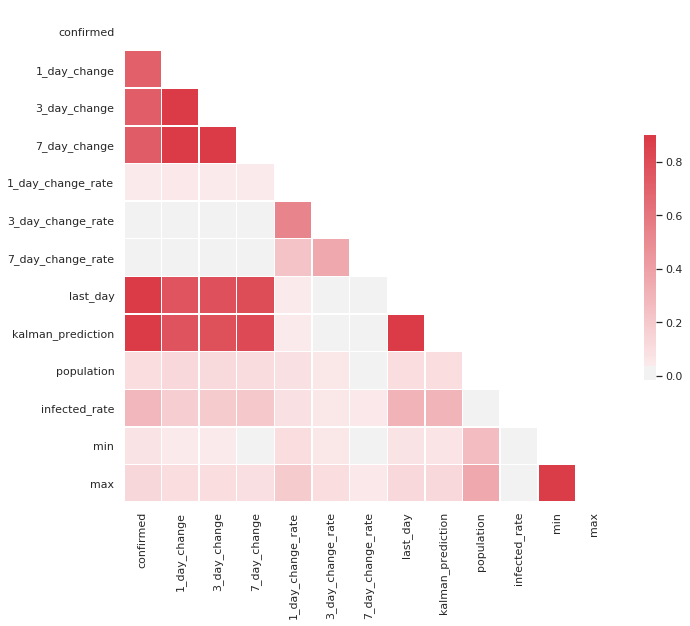

In [152]:
from string import ascii_letters
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white")
# Compute the correlation matrix
corr = train.iloc[:,2:].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
print ('Correlation Matrix')

In [153]:
print('Correlation To Confirmed') 
print (corr.confirmed)

Correlation To Confirmed
confirmed            1.000000
1_day_change         0.714945
3_day_change         0.724572
7_day_change         0.730317
1_day_change_rate    0.041766
3_day_change_rate    0.019315
7_day_change_rate    0.010623
last_day             0.915450
kalman_prediction    0.916791
population           0.102300
infected_rate        0.281470
min                  0.071878
max                  0.129428
Name: confirmed, dtype: float64


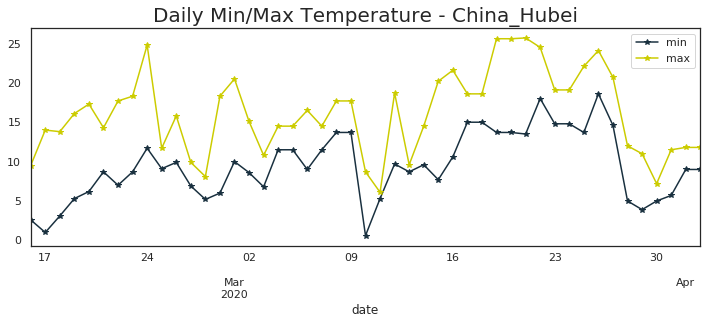

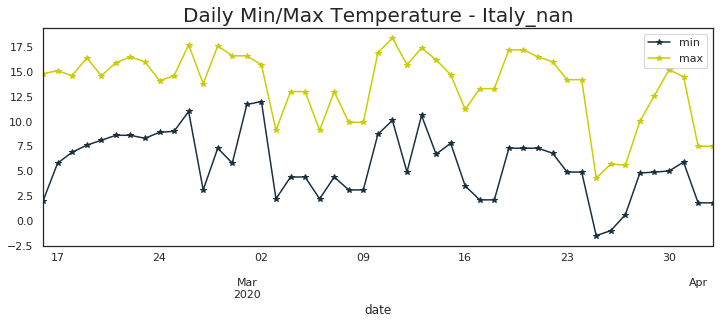

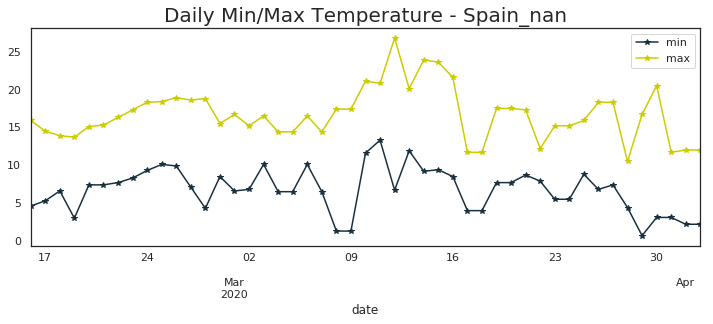

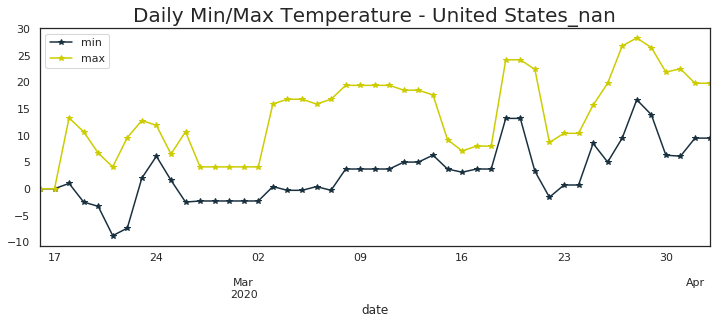

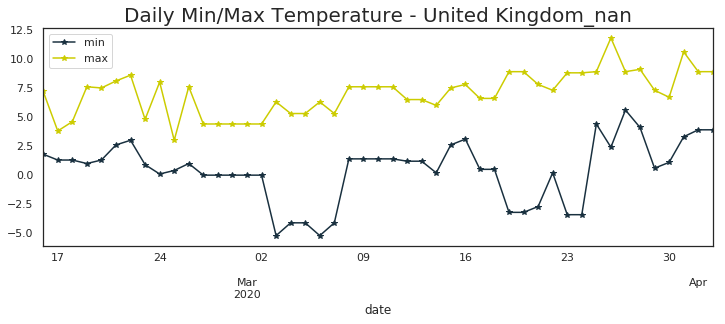

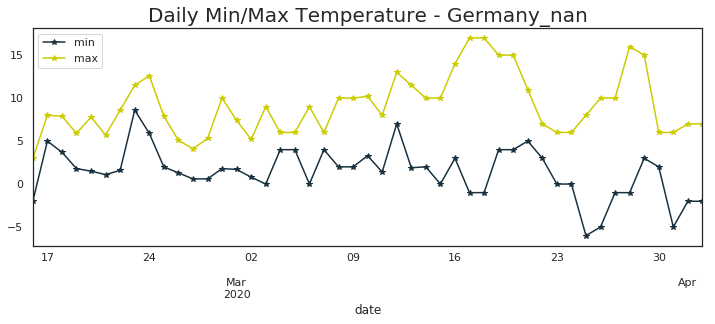

In [154]:
import matplotlib.pyplot as plt
p=train[['date','region','min','max']].set_index('date')
#
#rg1='China_Hubei'
#p=p[p['region']==rg1]
#p.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - '+rg1,fontdict={'fontsize': 20})
#
## JOAO - Temp. Teast Italy - Data Supply finishes 13/03/2020
region_s=['China_Hubei','Italy_nan','Spain_nan','United States_nan','United Kingdom_nan','Germany_nan']
p=train[['date','region','min','max']].set_index('date')
for i in range(0,len(region_s)):     
    pv=p[p['region']==region_s[i]]
    pv.iloc[:,:].plot(marker='*',figsize=(12,4),color=['#19303f','#cccc00']).set_title('Daily Min/Max Temperature - '+region_s[i],fontdict={'fontsize': 20})
#

In [155]:
avg_temp=train[['region','confirmed','min','max']]  # from 17-02-20 to 16-03-2020
avg_temp=avg_temp.groupby(by='region').mean()
avg_temp=avg_temp.sort_values('confirmed',ascending=False)
print( 'Most infected Areas Avg Temperature')
print(avg_temp.iloc[:100,1:])

Most infected Areas Avg Temperature
                                min        max
region                                        
China_Hubei                9.423404  16.165957
Italy_nan                  5.655319  13.678723
United States_nan          2.859574  13.934043
Spain_nan                  6.712766  16.712766
Germany_nan                1.438298   9.100000
Iran_nan                   8.302128  17.759574
France_nan                 2.140426  11.521277
Korea, South_nan           0.002128  11.576596
United Kingdom_nan         0.436170   7.038298
Switzerland_nan           -3.563830   2.238298
Netherlands_nan            2.680851   7.034043
Belgium_nan                3.840426  10.221277
Austria_nan               -4.680851   1.789362
Turkey_nan                 0.708511   9.000000
China_Guangdong           16.791489  24.553191
China_Henan                5.955319  15.310638
Norway_nan                -7.548936  -0.448936
China_Zhejiang             7.336170  12.606383
Portugal_nan            

### Kalman X Days Ahead Prediction

In [156]:
%%R

#install.packages('reshape')

NULL


In [157]:
%%R
require(pracma)
require(Metrics)
require(readr)
library(reshape)
all<- read_csv("/home/notebookuser/notebooks/covid19/data/ts_conf_r.csv")
all$X1<-NULL
### JOAO
#### for (i in 1:30) { # Set i days prediction
#####for (i in 1:45) { # Set i days prediction
for (i in 1:75) { # Set i days prediction    
  if( i>1) {all<-all_new}
  date<-all[,1]
  date[nrow(date) + 1,1] <-all[nrow(all),1]+1
  pred_all<-NULL
  for (n in 2:ncol(all)-1) {
    Y<-ts(data = all[n+1], start = 1, end =nrow(all)+1)  
    sig_w<-0.01
    w<-sig_w*randn(1,100) # acceleration which denotes the fluctuation (Q/R) rnorm(100, mean = 0, sd = 1)
    sig_v<-0.01
    v<-sig_v*randn(1,100)  
    t<-0.45
    phi<-matrix(c(1,0,t,1),2,2)
    gama<-matrix(c(0.5*t^2,t),2,1)
    H<-matrix(c(1,0),1,2)
    #Kalman
    x0_0<-p0_0<-matrix(c(0,0),2,1)
    p0_0<-matrix(c(1,0,0,1),2,2)
    Q<-0.01
    R<-0.01
    X<-NULL
    X2<-NULL
    pred<-NULL
    for (i in 0:nrow(all)) {
      namp <-paste("p", i+1,"_",i, sep = "")
      assign(namp, phi%*%(get(paste("p", i,"_",i, sep = "")))%*%t(phi)+gama%*%Q%*%t(gama))
      namk <- paste("k", i+1, sep = "")
      assign(namk,get(paste("p", i+1,"_",i, sep = ""))%*%t(H)%*%(1/(H%*%get(paste("p", i+1,"_",i, sep = ""))%*%t(H)+R)))
      namx <- paste("x", i+1,"_",i, sep = "")
      assign(namx,phi%*%get(paste("x", i,"_",i, sep = "")))
      namE <- paste("E", i+1, sep = "")
      assign(namE,Y[i+1]-H%*%get(paste("x", i+1,"_",i, sep = "")))
      namx2 <- paste("x", i+1,"_",i+1, sep = "")
      assign(namx2,get(paste("x", i+1,"_",i, sep = ""))+get(paste("k", i+1, sep = ""))%*%get(paste("E", i+1, sep = "")))
      namp2 <- paste("p", i+1,"_",i+1, sep = "")
      assign(namp2,(p0_0-get(paste("k", i+1, sep = ""))%*%H)%*%get(paste("p", i+1,"_",i, sep = "")))
      X<-rbind(X,get(paste("x", i+1,"_",i,sep = ""))[1])
      X2<-rbind(X2,get(paste("x", i+1,"_",i,sep = ""))[2])
      if(i>2){
        remove(list=(paste("p", i-1,"_",i-2, sep = "")))
        remove(list=(paste("k", i-1, sep = "")))
        remove(list=(paste("E", i-1, sep = "")))
        remove(list=(paste("p", i-2,"_",i-2, sep = "")))
        remove(list=(paste("x", i-1,"_",i-2, sep = "")))
        remove(list=(paste("x", i-2,"_",i-2, sep = "")))}
    } 
    pred<-NULL
    pred<-cbind(Y,X,round(X2,4))
    pred<-as.data.frame(pred)
    pred$region<-colnames(all[,n+1])
    pred$date<-date$date
    pred$actual<-rbind(0,(cbind(pred[2:nrow(pred),1])/pred[1:nrow(pred)-1,1]-1)*100)
    pred$predict<-rbind(0,(cbind(pred[2:nrow(pred),2])/pred[1:nrow(pred)-1,2]-1)*100)
    pred$pred_rate<-(pred$X/pred$Y-1)*100
    pred$X2_change<-rbind(0,(cbind(pred[2:nrow(pred),3]-pred[1:nrow(pred)-1,3])))
    pred_all<-rbind(pred_all,pred)
  }
  pred_all<-cbind(pred_all[,4:5],pred_all[,1:3])
  names(pred_all)[5]<-"X2"
  pred_all<-pred_all[,1:5]
       
pred_all_today=pred_all[with( pred_all, order(region, date)), ]
all_new=all
#all_new[nrow(all_new),1]<-all_new[nrow(all),1]+1
temp<-with(pred_all_today, pred_all_today[date == all[nrow(all),1]+1, ])
temp<-cbind(temp[,1:2],temp[,4])
temp2<-reshape(temp, direction = "wide", idvar = "date", timevar = "region")
rand_num<-runif(ncol(temp2)-1, 0.9, 1.05)
temp2[,2:ncol(temp2)]<-temp2[,2:ncol(temp2)]*rand_num
colnames(temp2)=colnames(all_new)
all_new<-rbind(all_new,temp2)
all_new[,2:ncol(all_new)]<-round(all_new[,2:ncol(all_new)])
for (i in 2:ncol(all_new)) {
  all_new[nrow(all_new),i]=max(all_new[nrow(all_new)-1,i],all_new[nrow(all_new),i])}
}

cols(
  .default = col_double(),
  date = col_date(format = "")
)




In [158]:
all_new=%R all_new

In [159]:
all_new['date']=pd.to_datetime(all_new['date'],unit='d')

Text(0.5, 1.0, 'Kalman Prediction - Select Country/Region to Change - Spain_nan')

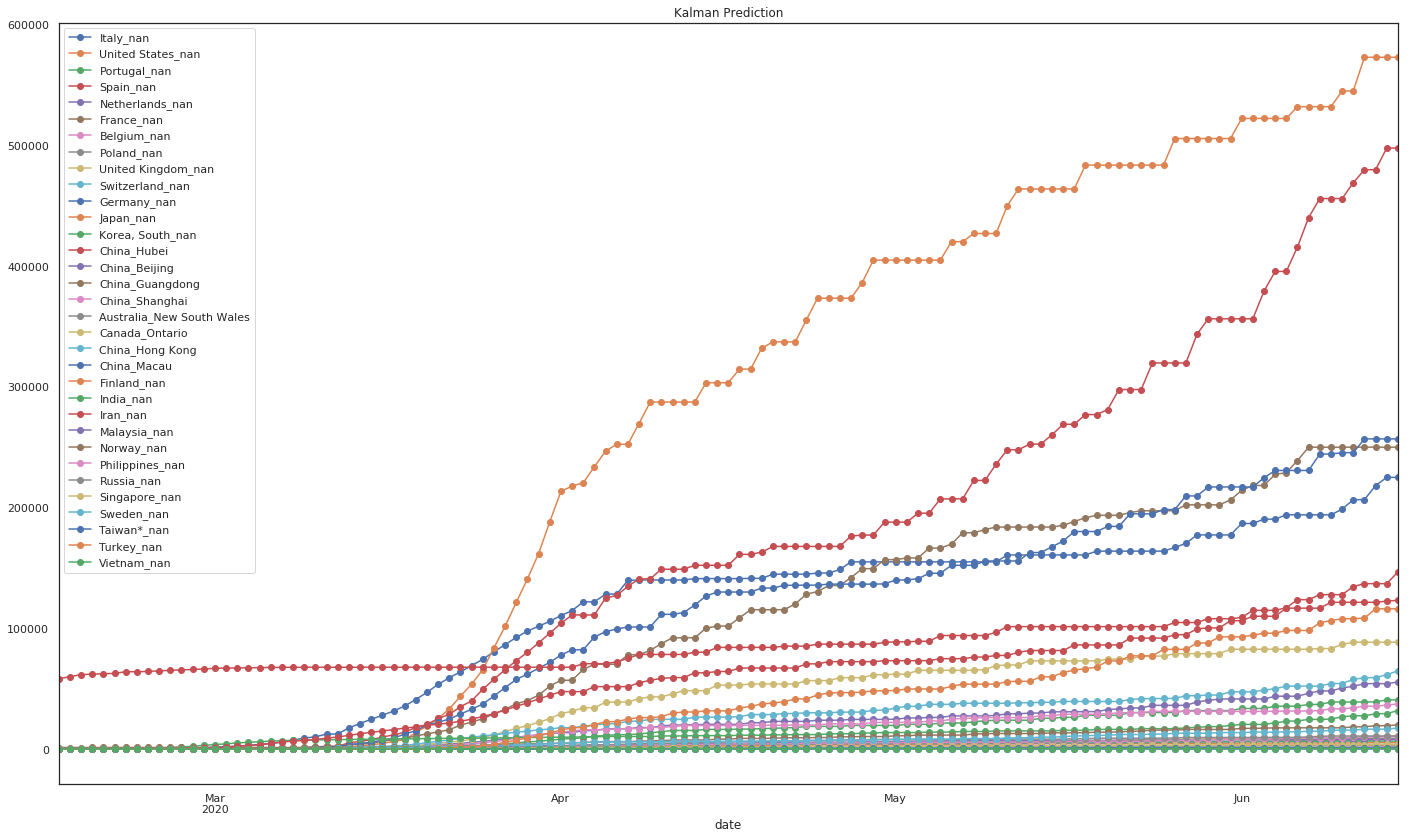

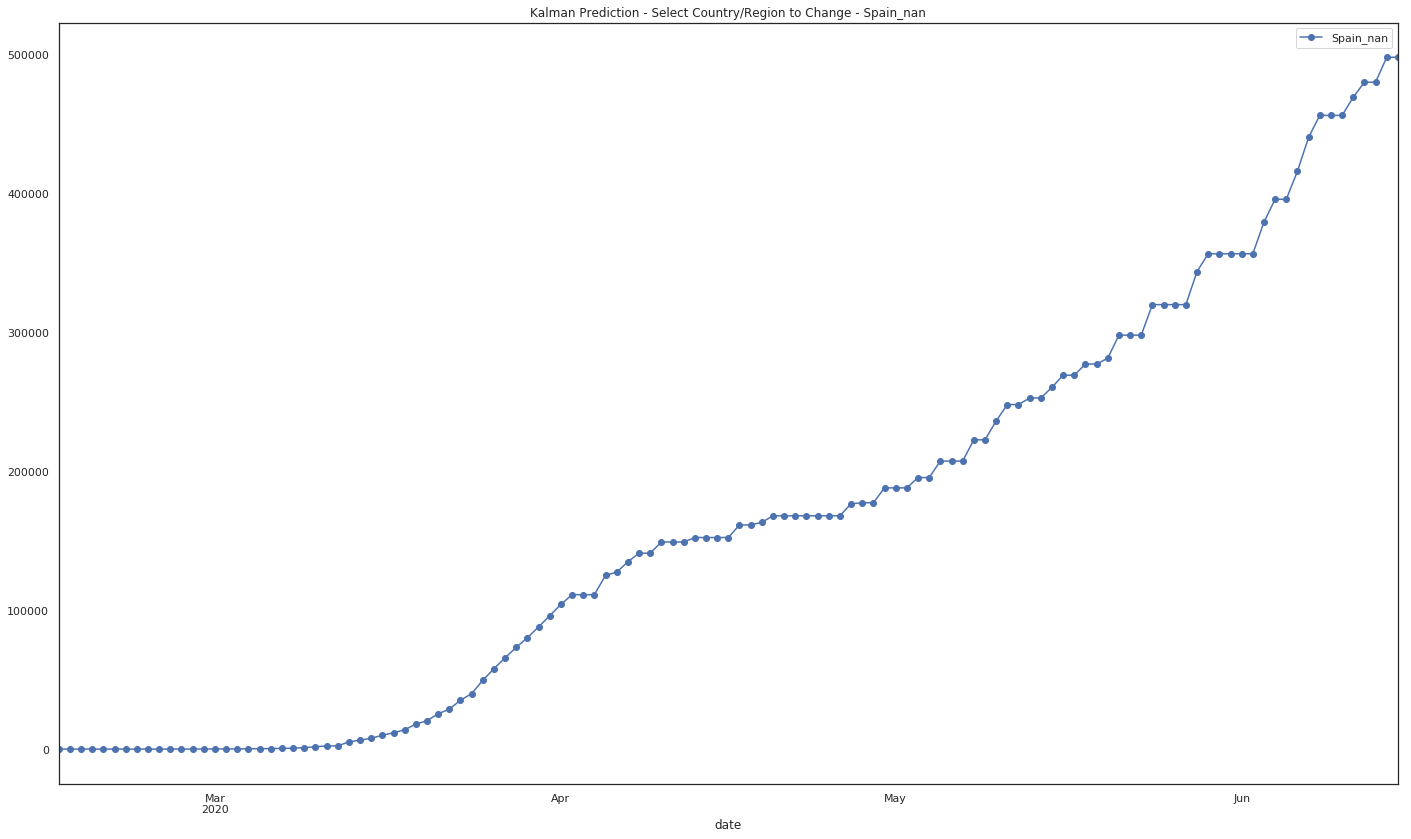

In [160]:
#
### Joao - Moving Forward ...
# Select regions From my_train_list
#
region=['date']+my_train_list
p_kalman=all_new[region]
#p=all_new
#p.iloc[len(p)-1,2]=None
p_kalman=p_kalman.set_index(['date'])
p_kalman.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction')
#
#p_kalman2=all_new[['date','China_Hubei']]
p_kalman2=all_new[['date','Spain_nan']] ## Joao
p_kalman2=p_kalman2.set_index(['date'])
p_kalman2.iloc[:,:].plot(marker='o',figsize=(24,14)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman2.columns[0]))
#

/home/notebookuser/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


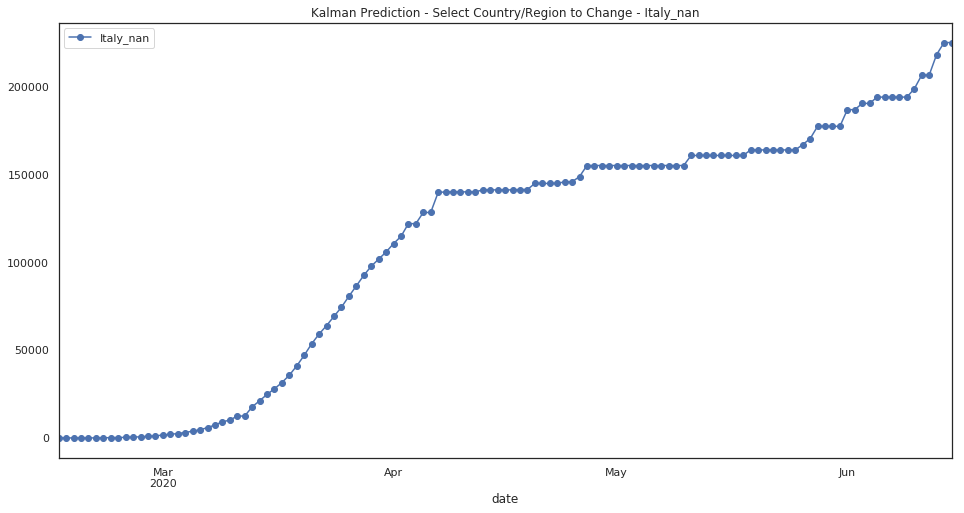

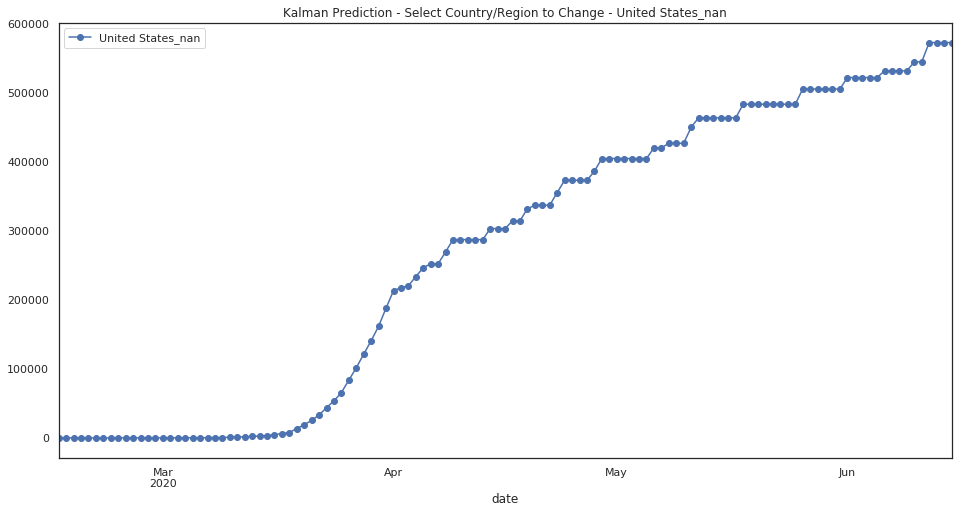

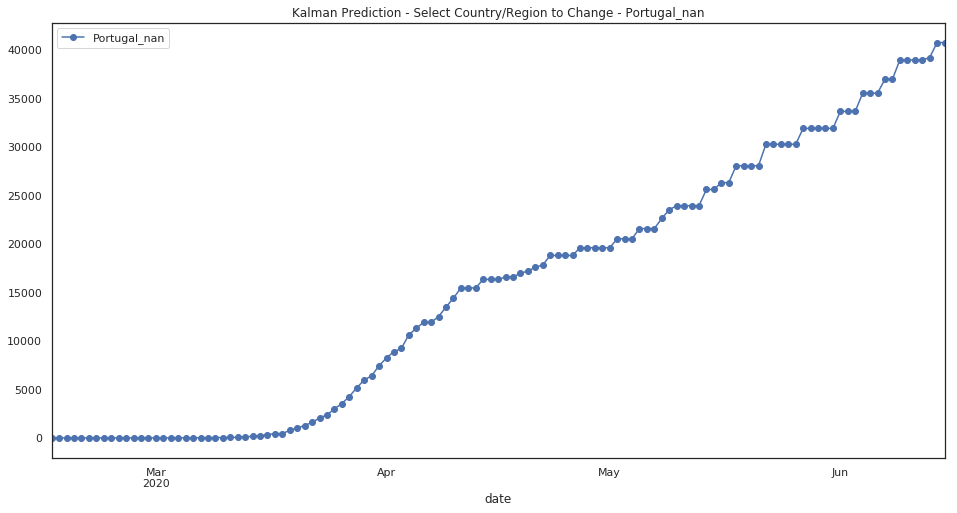

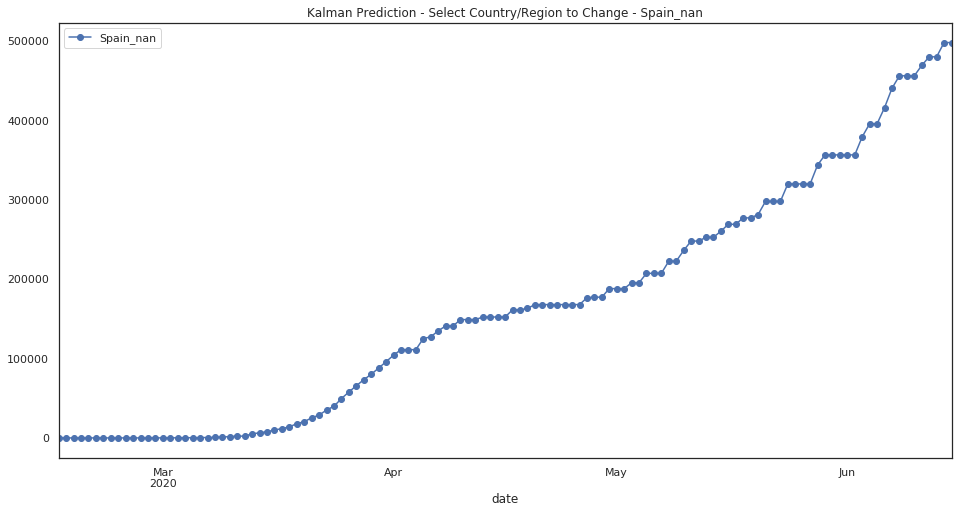

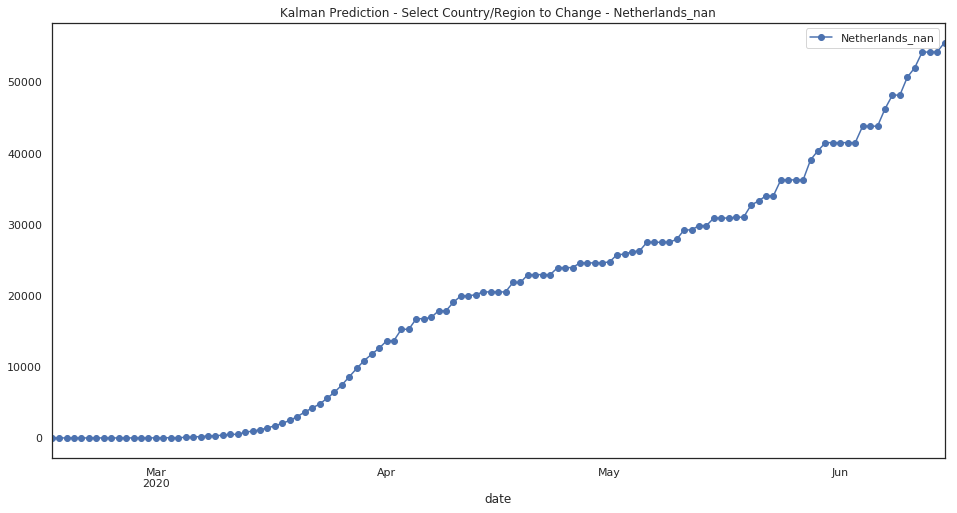

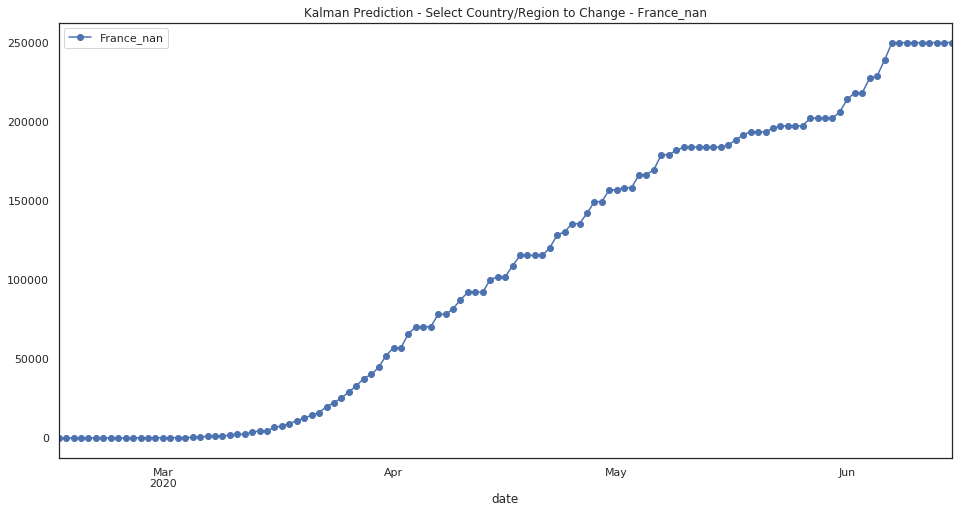

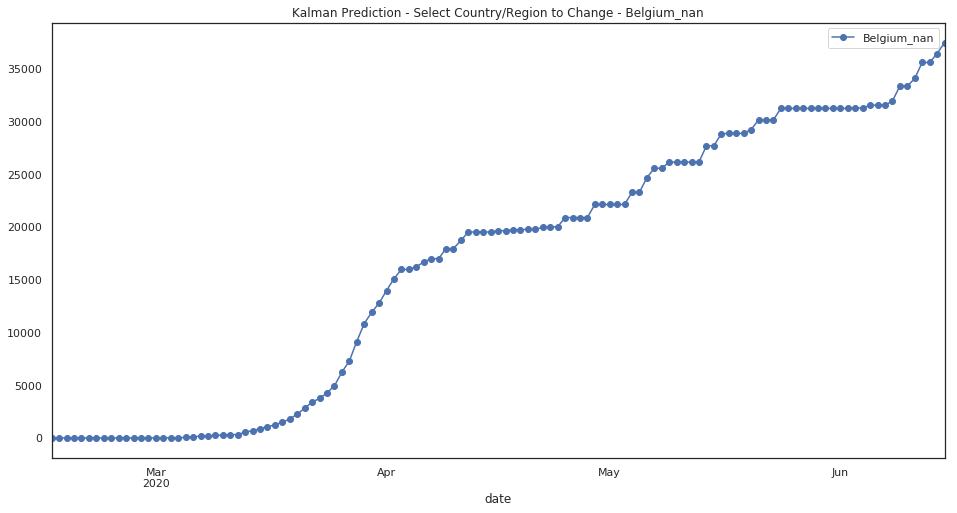

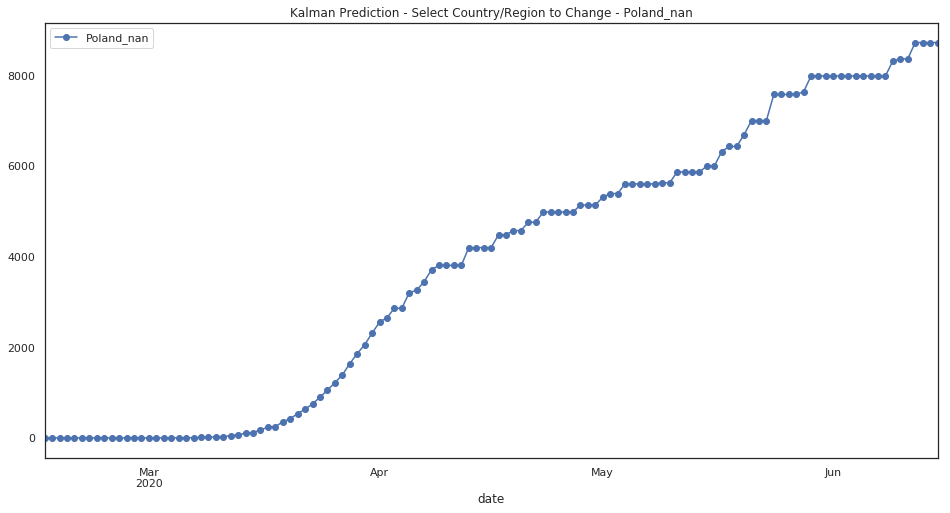

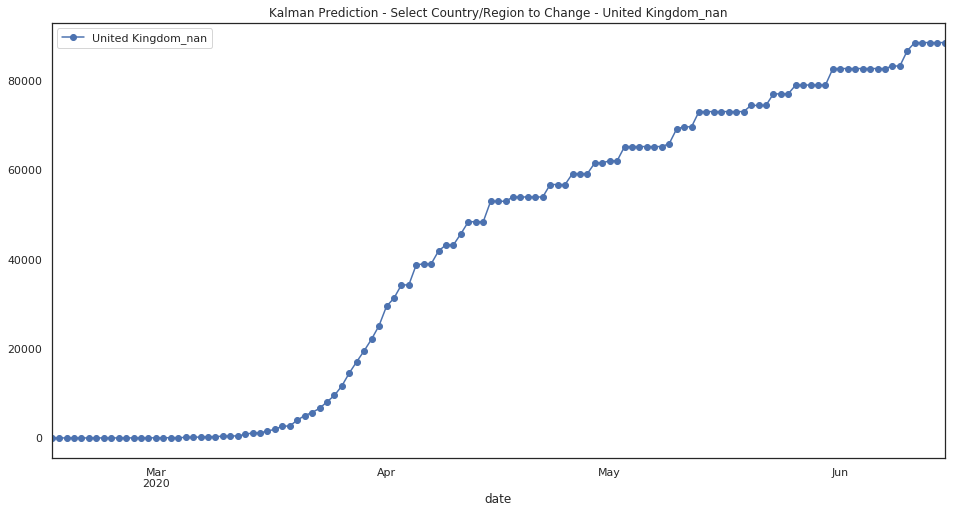

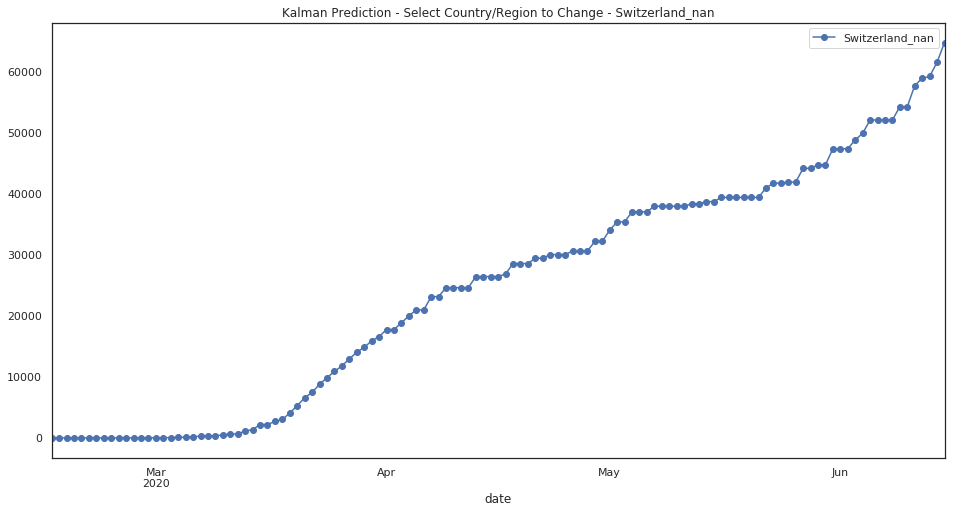

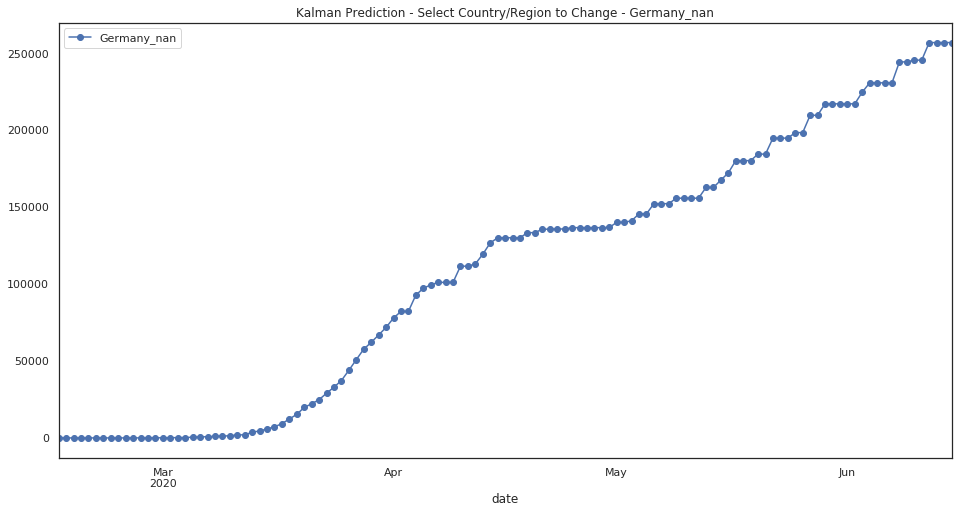

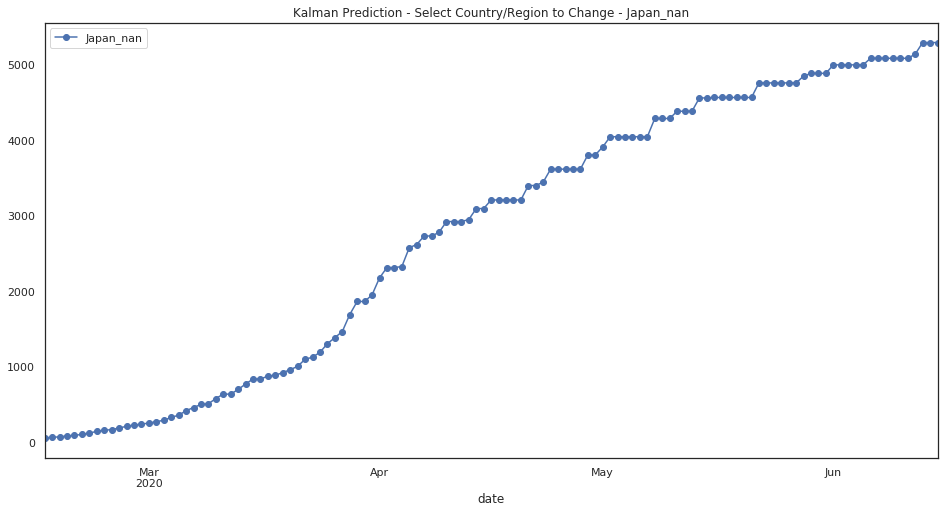

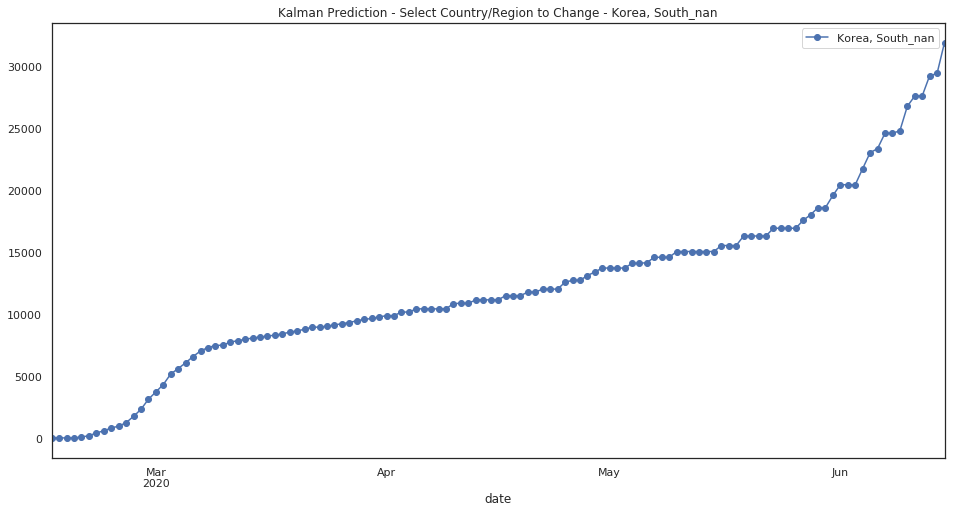

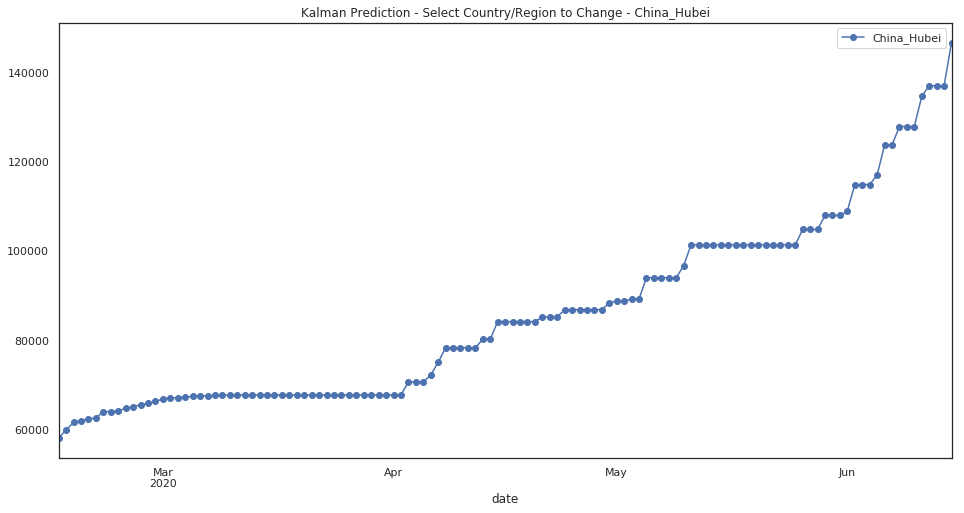

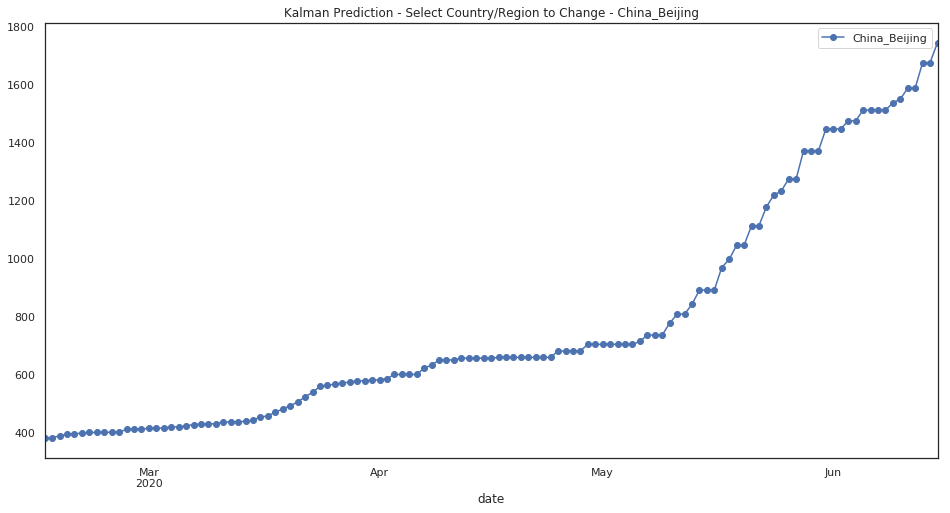

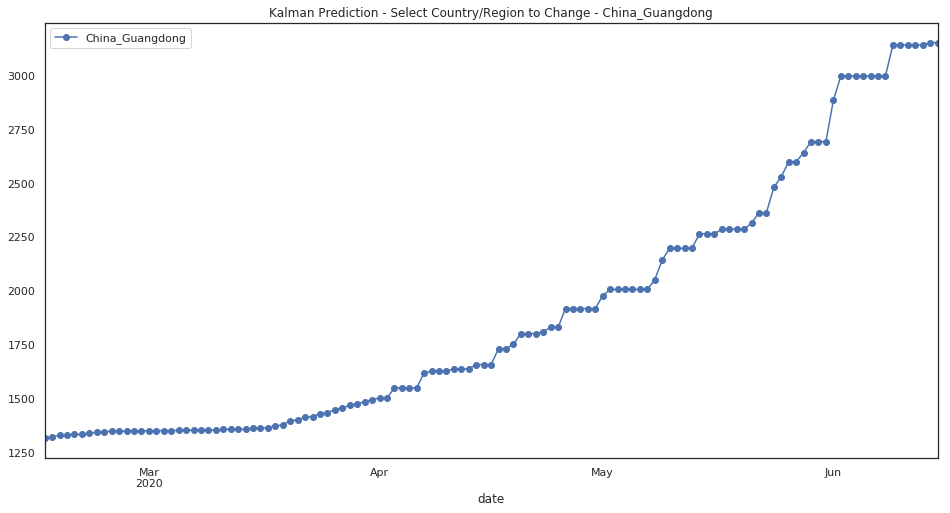

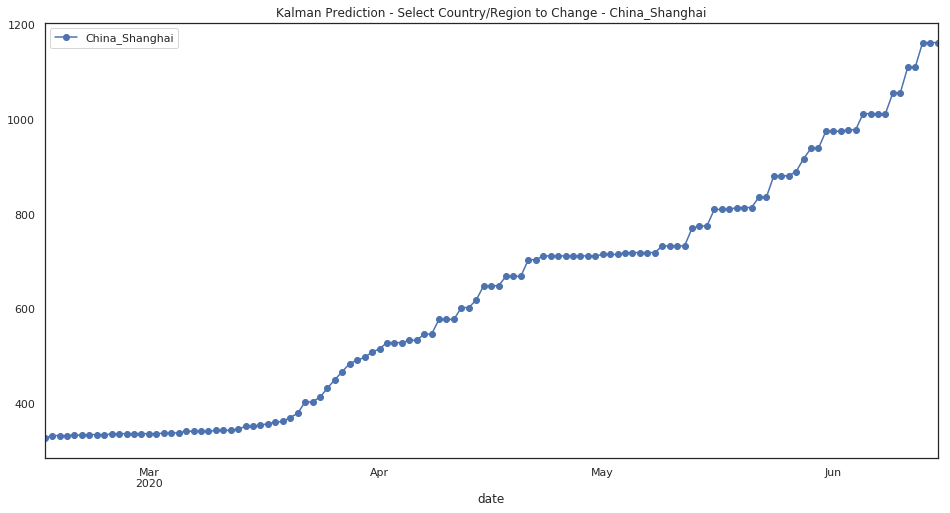

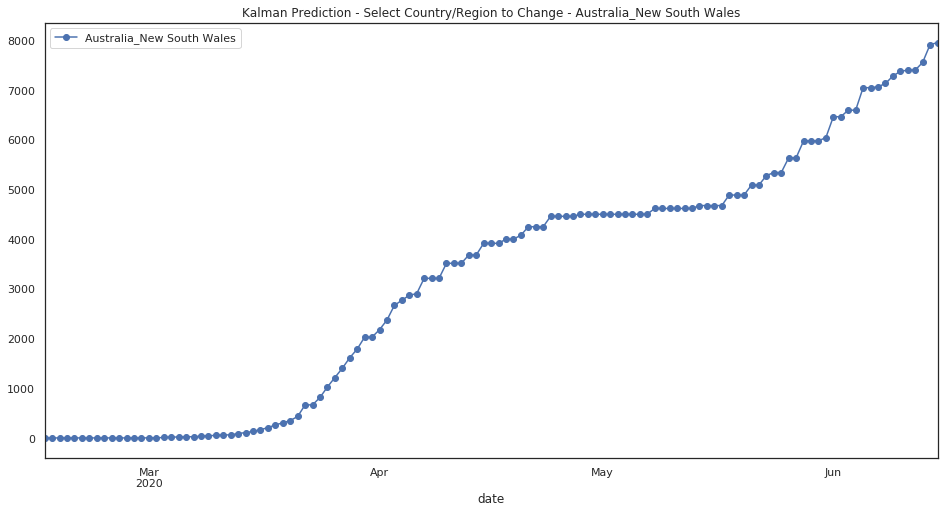

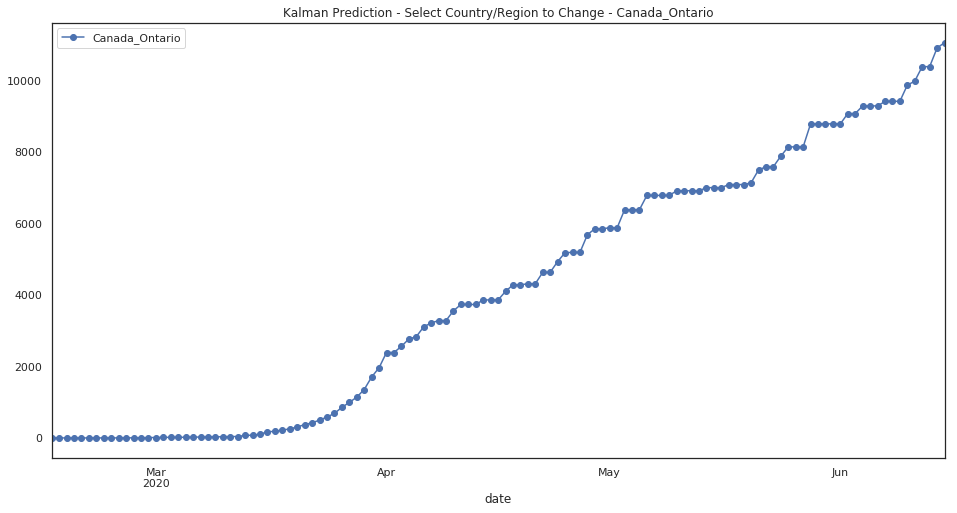

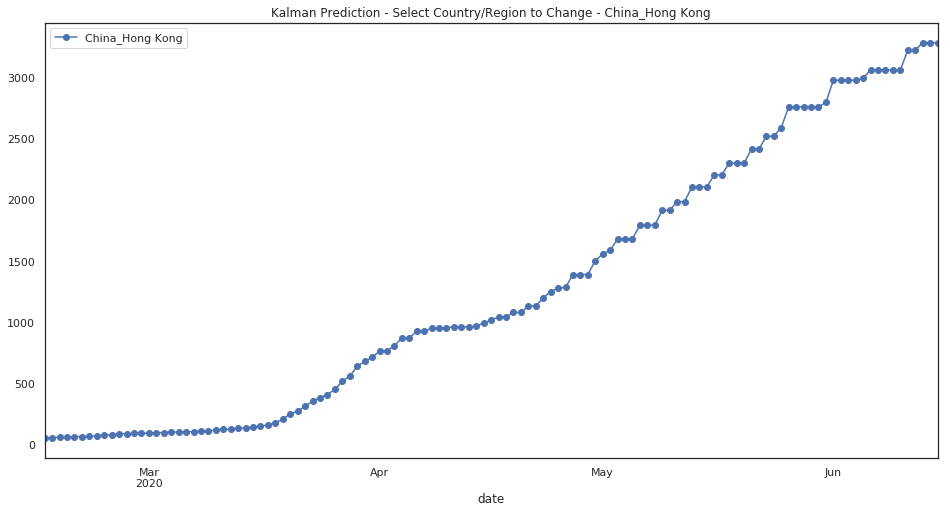

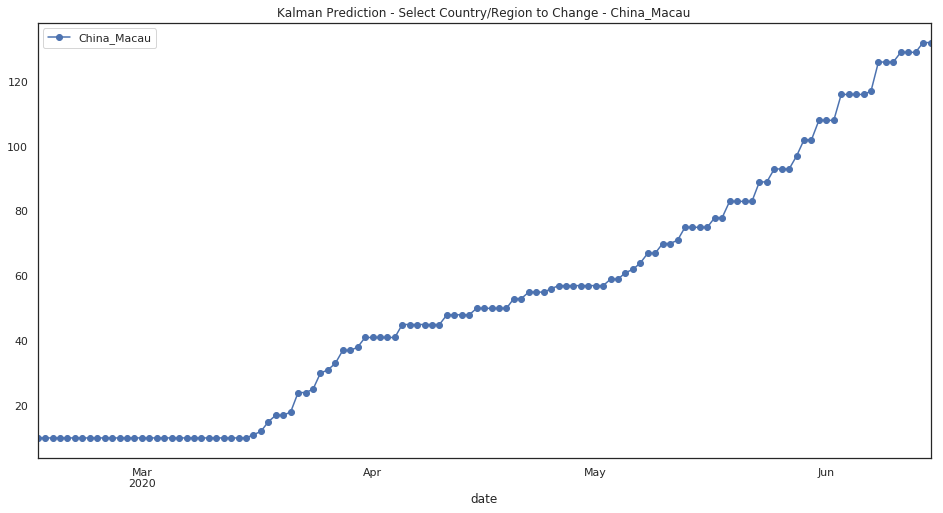

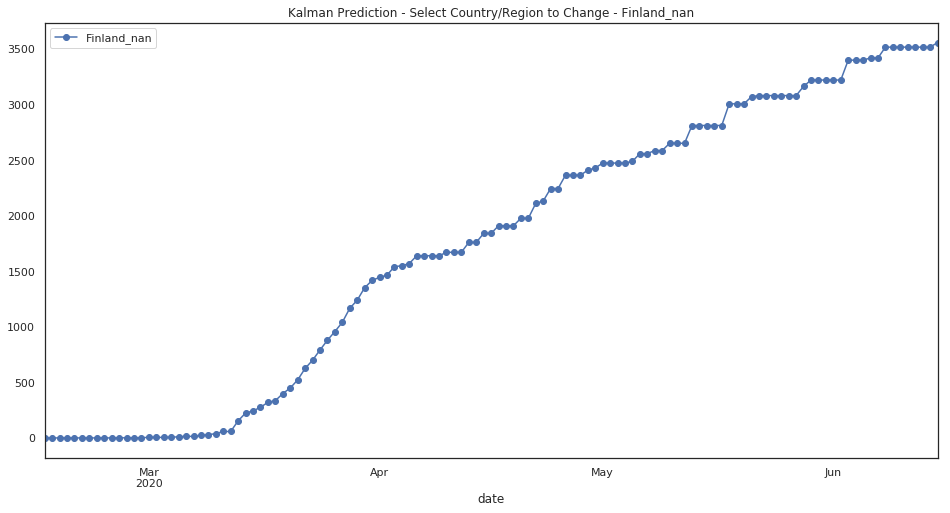

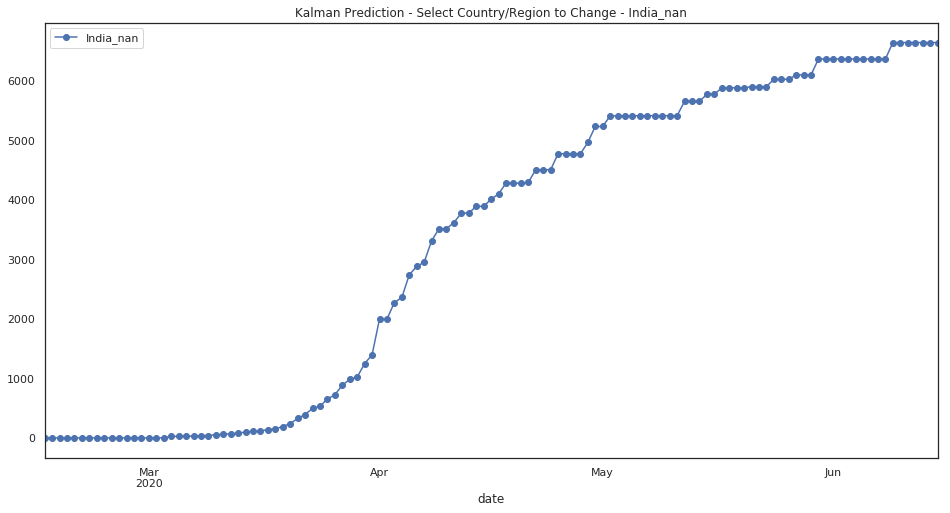

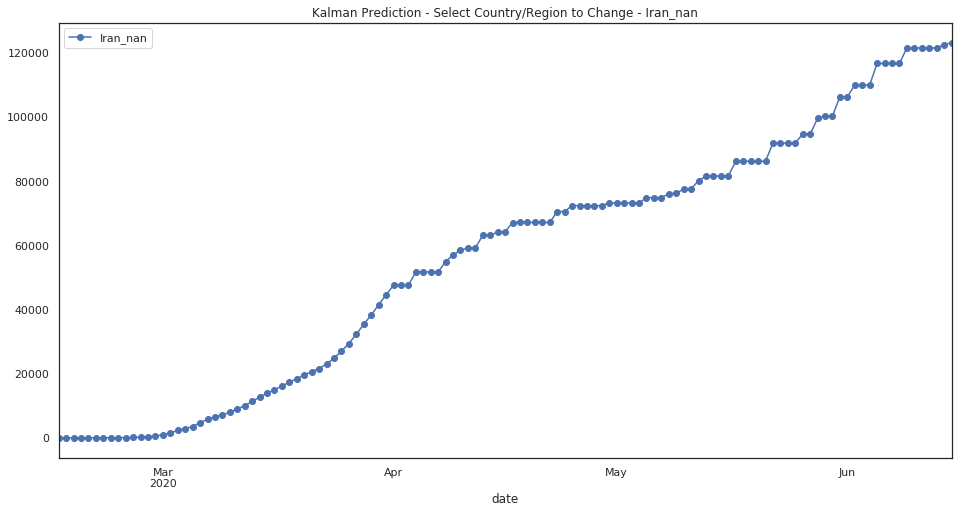

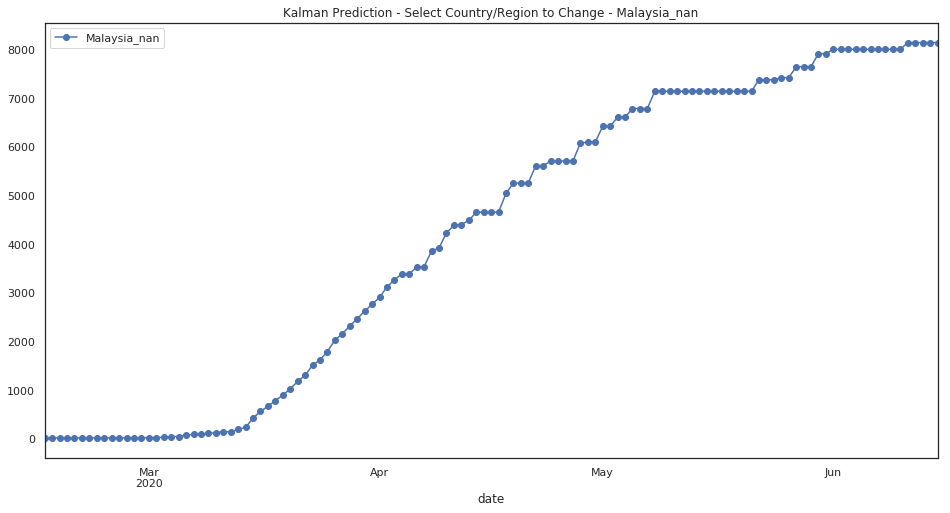

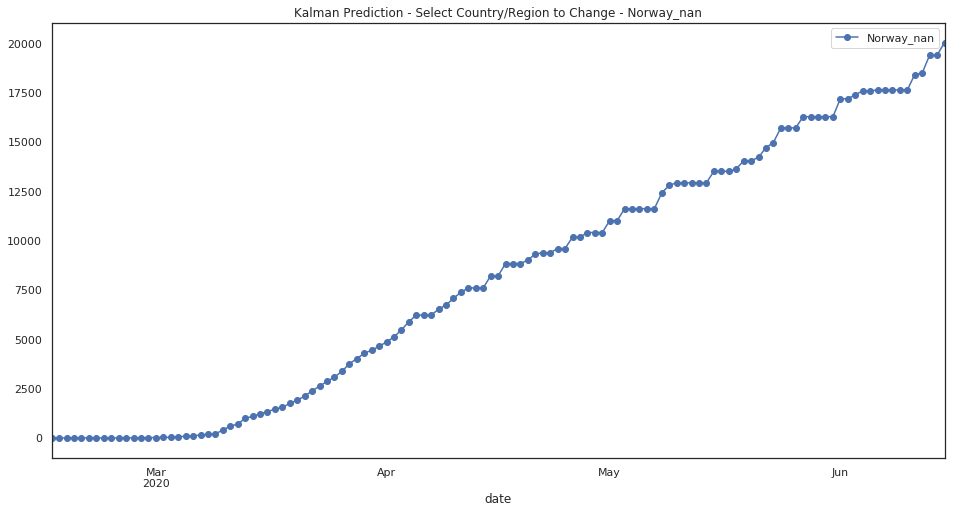

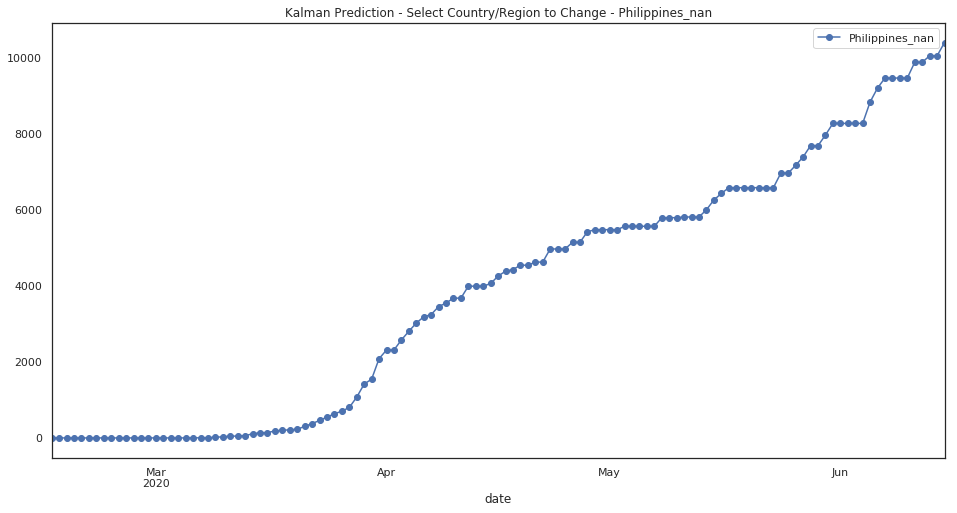

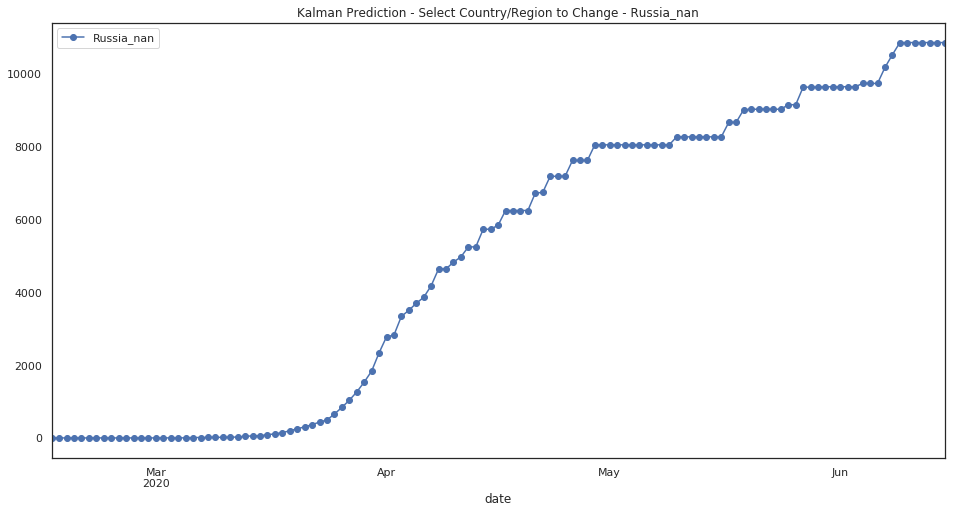

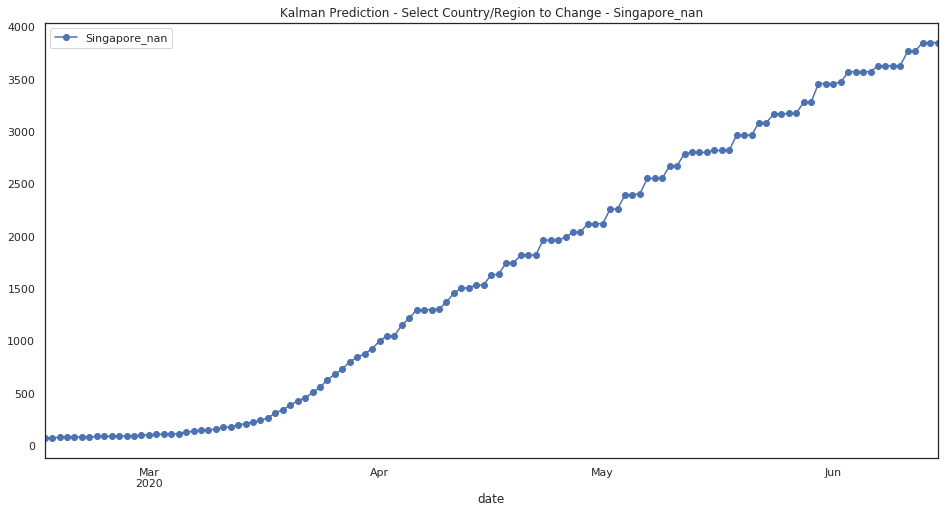

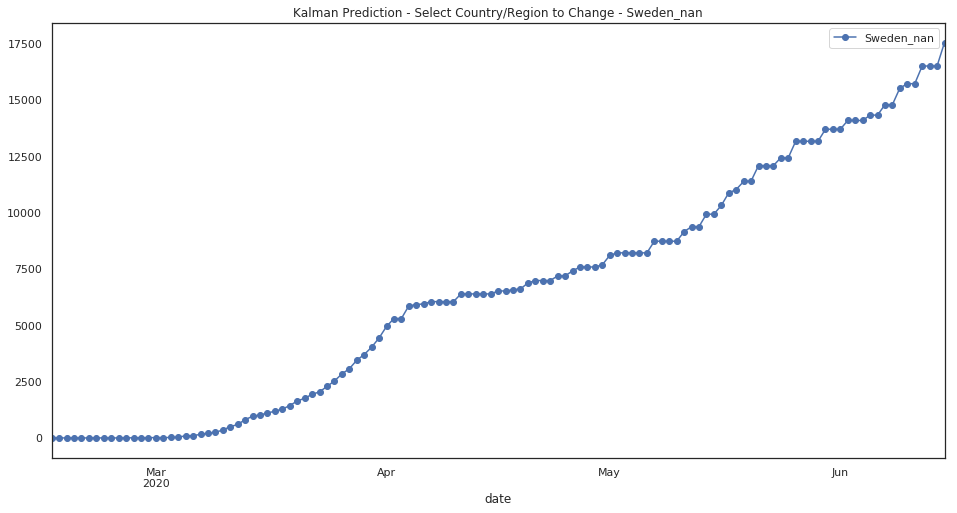

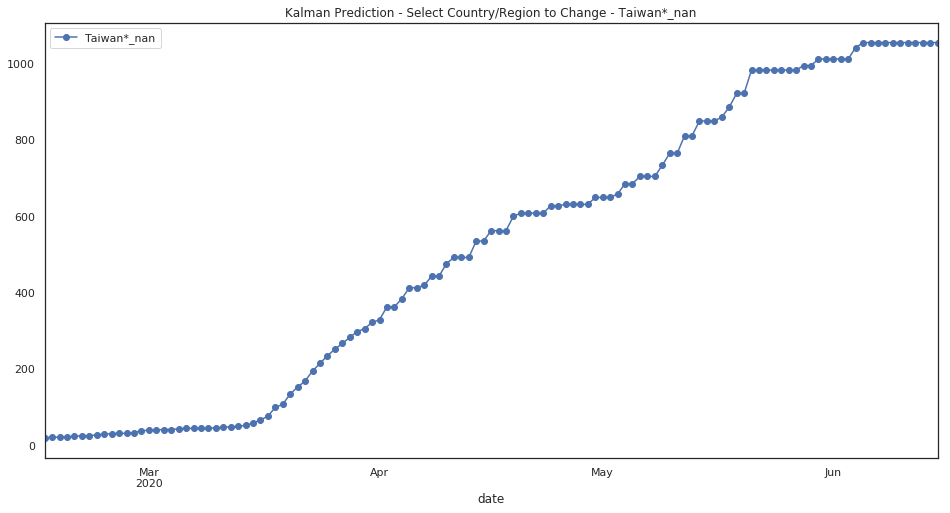

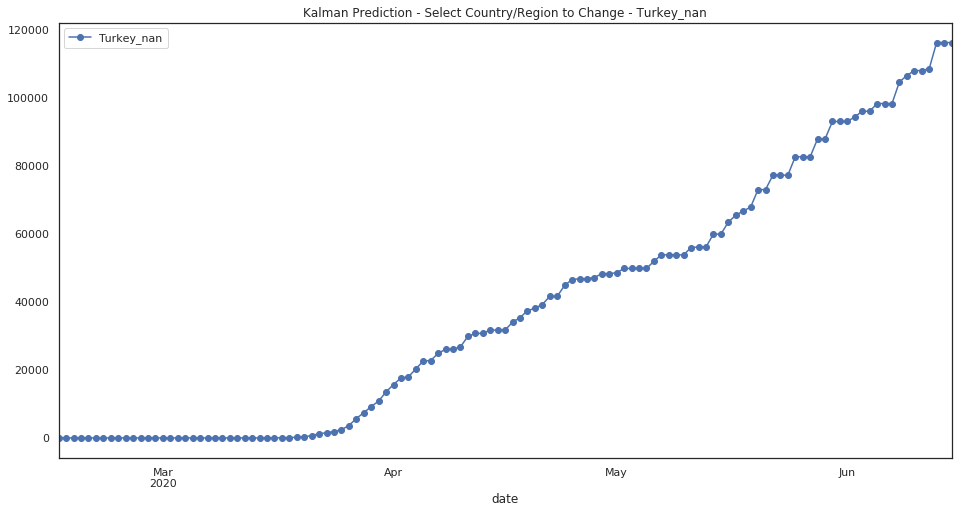

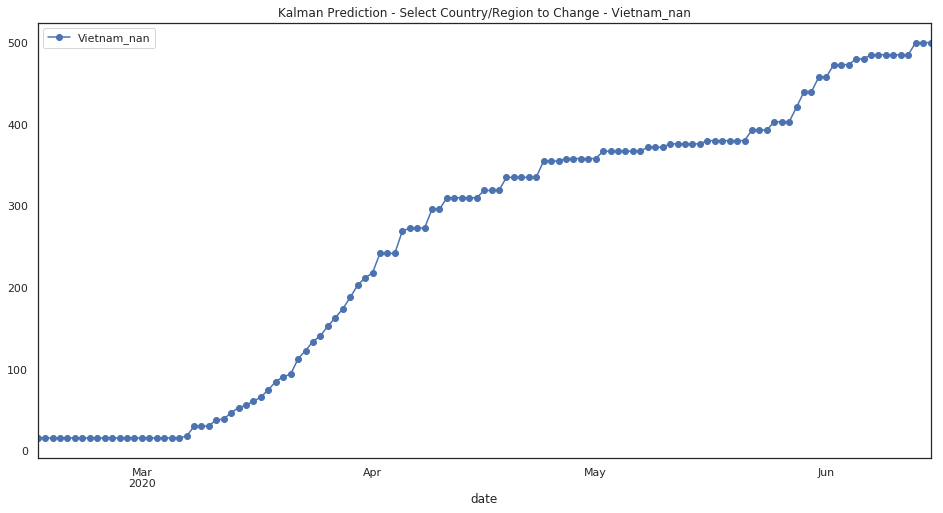

In [161]:
### Joao - Dynamic print
#print(region[:])
for i in range(1,len(region)):
    country_print=region[i]
    #print("here:"+country_print)
    p_kalman_rg=all_new[['date',country_print]]
    p_kalman_rg=p_kalman_rg.set_index(['date'])
    p_kalman_rg.iloc[:,:].plot(marker='o',figsize=(16,8)).set_title('Kalman Prediction - Select Country/Region to Change - {}'.format(p_kalman_rg.columns[0]))
    

In [162]:
t.to_csv(r'data/t_confirmed_global.csv', index = False, header=True)

In [163]:
all_new.to_csv(r'data/prediction_kalman_filter_global.csv', index = False, header=True)

## Iterative Regression

In [164]:
t_iter=all_new.set_index(['date'])
t_iter=t_iter.stack().reset_index(name='confirmed')
t_iter.columns=['date', 'region','confirmed']
t_iter['date']=pd.to_datetime(t_iter['date'] ,errors ='coerce')
t_iter=t_iter.sort_values(['region', 'date'])

t_iter=t_iter.reset_index(drop=True)
for i in range(1,len(t_iter)+1):
    if(t_iter.iloc[i,1] is not t_iter.iloc[i-1,1]):
        t_iter.loc[len(t_iter)+1] = [t_iter.iloc[i-1,0]+ pd.DateOffset(1),t_iter.iloc[i-1,1], 0] 
t_iter=t_iter.sort_values(['region', 'date'])
t_iter=t_iter.reset_index(drop=True)

### Joao - Fix - RuntimeWarning: divide by zero encountered in double_scalars
#
t_iter['1_day_change']=t_iter['3_day_change']=t_iter['7_day_change']=t_iter['1_day_change_rate']=t_iter['3_day_change_rate']=t_iter['7_day_change_rate']=t_iter['last_day']=0
for i in range(1,len(t_iter)):
    if(t_iter.iloc[i,1] is t_iter.iloc[i-2,1]):
        t_iter.iloc[i,3]=t_iter.iloc[i-1,2]-t_iter.iloc[i-2,2]
        t_iter.iloc[i,6]=((t_iter.iloc[i-1,2] +1)/(t_iter.iloc[i-2,2]-1 +1))*100
        t_iter.iloc[i,9]=t_iter.iloc[i-1,2]
    if(t_iter.iloc[i,1] is t_iter.iloc[i-4,1]):
        t_iter.iloc[i,4]=t_iter.iloc[i-1,2]-t_iter.iloc[i-4,2]
        t_iter.iloc[i,7]=((t_iter.iloc[i-1,2] +1)/(t_iter.iloc[i-4,2]-1 +1))*100
    if(t_iter.iloc[i,1] is t_iter.iloc[i-8,1]):
        t_iter.iloc[i,5]=t_iter.iloc[i-1,2]-t_iter.iloc[i-8,2]
        t_iter.iloc[i,8]=((t_iter.iloc[i-1,2] +1)/(t_iter.iloc[i-8,2]-1 +1))*100
t_iter=t_iter.fillna(0)  

# t_iter=t_iter.merge(temp[['date','region', 'X']],how='left',on=['date','region'])
# t_iter=t_iter.rename(columns = {'X':'kalman_prediction'}) 
t_iter=t_iter.replace([np.inf, -np.inf], 0)
t_iter['kalman_prediction']=round(t_iter['confirmed'])

test_iter=t_iter.merge(confirmed[['region',' Population ']],how='left',on='region')
test_iter=test_iter.rename(columns = {' Population ':'population'})
test_iter['population']=test_iter['population'].str.replace(r" ", '')
test_iter['population']=test_iter['population'].str.replace(r",", '')
test_iter['population']=test_iter['population'].fillna(1)
test_iter['population']=test_iter['population'].astype('int32')
## Joao - Fix Divid By Zero
#test_iter['infected_rate'] =test_iter['last_day']/test_iter['population']*10000
test_iter['infected_rate'] =(test_iter['last_day']+1)/(test_iter['population']+1)*10000
#
test_iter=test_iter.merge(w,how='left',on=['date','region'])
#test_iter=test_iter.sort_values(['region', 'date'])

test_iter_temp=test_iter[np.isnan(test_iter['min'])]
test_iter_temp=test_iter_temp.drop(columns=['min', 'max'])
test_iter_temp=test_iter_temp.merge(w_forecast,how='left',on=['date','region'])
test_iter=test_iter.dropna()
test_iter=test_iter.append(test_iter_temp)
test_iter=test_iter.sort_values(['region', 'date'])
### fill missing weather 
for i in range(0,len(test_iter)):
    if(np.isnan(test_iter.iloc[i,13])):
        if(test_iter.iloc[i,1] is test_iter.iloc[i-1,1]):
            test_iter.iloc[i,13]=test_iter.iloc[i-1,13]+abs(test_iter.iloc[i-1,13]*.01)
            test_iter.iloc[i,14]=test_iter.iloc[i-1,14]+abs(test_iter.iloc[i-1,14]*.01)


/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in double_scalars
/home/notebookuser/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in double_scalars


In [165]:
test_iter=test_iter.fillna(0) 
test_iter[test_iter.isnull().any(axis=1)]


Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, 1_day_change_rate, 3_day_change_rate, 7_day_change_rate, last_day, kalman_prediction, population, infected_rate, min, max]
Index: []

In [166]:
test_iter[36220:36250]

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, 1_day_change_rate, 3_day_change_rate, 7_day_change_rate, last_day, kalman_prediction, population, infected_rate, min, max]
Index: []

In [167]:
test_iter[34860:34890]

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, 1_day_change_rate, 3_day_change_rate, 7_day_change_rate, last_day, kalman_prediction, population, infected_rate, min, max]
Index: []

In [168]:
### JOAO - ERROR - ValueError: Index contains duplicate entries, cannot reshape
pred=reg.predict(test_iter[x_col]); pred=pd.DataFrame(pred); pred.columns = ['prediction'];pred=round(pred)
pred['confirmed']=test_iter['confirmed'].values; pred['date']=test_iter['date'].values; pred['region']=test_iter['region'].values

for i in range(1,len(pred)):
    if(pred.iloc[i,3] is pred.iloc[i-1,3]):
        if(pred.iloc[i,0]<pred.iloc[i-1,1]):
            pred.iloc[i,0]=pred.iloc[i-1,1]
### JOAO - Drop Duplicates
pred=pred.drop_duplicates(subset=['date','region'], keep='last', inplace=False)        

pred=pred.pivot(index='date',columns='region',values='prediction') # pivot pred df

In [169]:
pred[65:]

region      Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  \
date                                                                 
2020-04-21            440.0        479.0       1794.0        772.0   
2020-04-22            440.0        479.0       1794.0        772.0   
2020-04-23            440.0        479.0       1883.0        793.0   
2020-04-24            461.0        513.0       1883.0        823.0   
2020-04-25            461.0        513.0       1883.0        823.0   
2020-04-26            461.0        513.0       1973.0        823.0   
2020-04-27            461.0        521.0       2070.0        832.0   
2020-04-28            461.0        521.0       2070.0        832.0   
2020-04-29            472.0        524.0       2070.0        867.0   
2020-04-30            484.0        524.0       2070.0        867.0   
2020-05-01            493.0        535.0       2070.0        886.0   
2020-05-02            493.0        547.0       2070.0        886.0   
2020-05-03            518.0        547.0       2070.0        886.0   
2020-05-04            518.0        550.0       2183.0        942.0   
2020-05-05            524.0        554.0       2183.0        942.0   
2020-05-06            524.0        555.0       2183.0        999.0   
2020-05-07            524.0        555.0       2183.0       1044.0   
2020-05-08            524.0        558.0       2229.0       1074.0   
2020-05-09            524.0        559.0       2229.0       1130.0   
2020-05-10            544.0        559.0       2282.0       1151.0   
2020-05-11            565.0        575.0       2284.0       1186.0   
2020-05-12            565.0        577.0       2365.0       1239.0   
2020-05-13            565.0        597.0       2390.0       1239.0   
2020-05-14            565.0        597.0       2390.0       1257.0   
2020-05-15            565.0        597.0       2390.0       1306.0   
2020-05-16            565.0        597.0       2391.0       1306.0   
2020-05-17            589.0        626.0       2421.0       1306.0   
2020-05-18            589.0        626.0       2553.0       1393.0   
2020-05-19            620.0        626.0       2553.0       1411.0   
2020-05-20            620.0        654.0       2609.0       1411.0   
2020-05-21            620.0        654.0       2609.0       1411.0   
2020-05-22            620.0        669.0       2644.0       1411.0   
2020-05-23            661.0        706.0       2702.0       1411.0   
2020-05-24            661.0        706.0       2744.0       1411.0   
2020-05-25            661.0        716.0       2744.0       1465.0   
2020-05-26            661.0        759.0       2744.0       1465.0   
2020-05-27            661.0        759.0       2744.0       1470.0   
2020-05-28            661.0        759.0       2744.0       1545.0   
2020-05-29            661.0        764.0       2853.0       1545.0   
2020-05-30            689.0        764.0       2872.0       1545.0   
2020-05-31            689.0        779.0       2872.0       1545.0   
2020-06-01            689.0        779.0       2872.0       1584.0   
2020-06-02            689.0        779.0       2872.0       1675.0   
2020-06-03            689.0        779.0       2872.0       1675.0   
2020-06-04            706.0        779.0       2912.0       1685.0   
2020-06-05            706.0        824.0       3045.0       1773.0   
2020-06-06            722.0        824.0       3045.0       1773.0   
2020-06-07            722.0        841.0       3045.0       1890.0   
2020-06-08            722.0        841.0       3045.0       1890.0   
2020-06-09            764.0        890.0       3141.0       1979.0   
2020-06-10            764.0        890.0       3141.0       1979.0   
2020-06-11            764.0        890.0       3216.0       2089.0   
2020-06-12            794.0        915.0       3216.0       2212.0   
2020-06-13            817.0        951.0       3353.0       2340.0   
2020-06-14            817.0        951.0       3353.0       2340.0   
2020-06-15

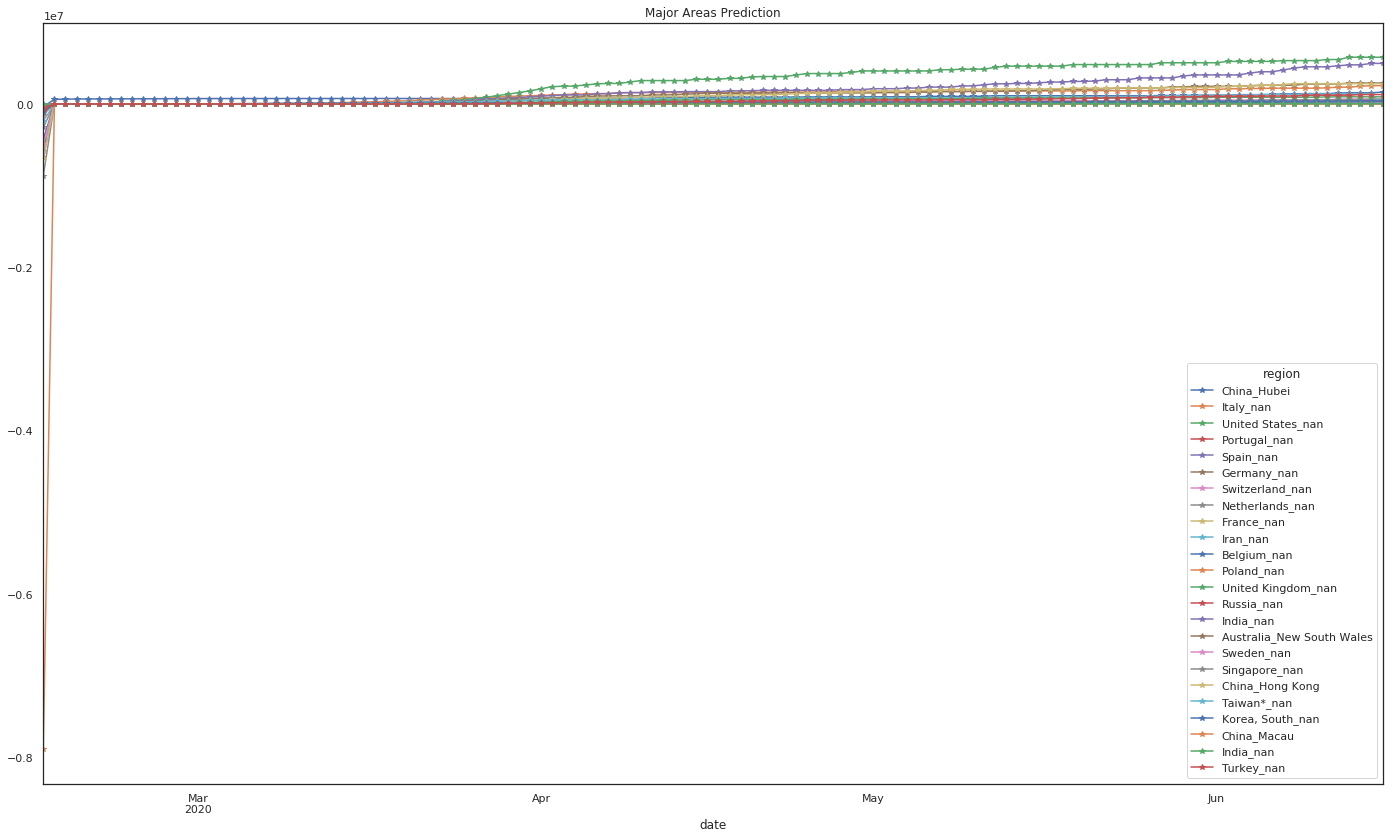

In [170]:
region=[
 ### JOAO - LIST of Countries - Start here
 ###    'Andorra_nan', 'Morocco_nan',
        'China_Hubei',
        'Italy_nan',
        'United States_nan',
        'Portugal_nan', 'Spain_nan',
        'Germany_nan', 'Switzerland_nan', 
        'Netherlands_nan',
        'France_nan',
        'Iran_nan',
        'Belgium_nan', 'Poland_nan',
        'United Kingdom_nan', 
        'Russia_nan', 'India_nan',
        'Australia_New South Wales',
        'Sweden_nan',
        'Singapore_nan',
        'China_Hong Kong',
        'Taiwan*_nan',
        'Korea, South_nan',
        'China_Macau',
        'India_nan',
        'Turkey_nan'
  ### JOAO - LIST of Countries - Finish here     
       ]

p=pred[region]
p.plot(marker='*',figsize=(24,14),title ='Major Areas Prediction')

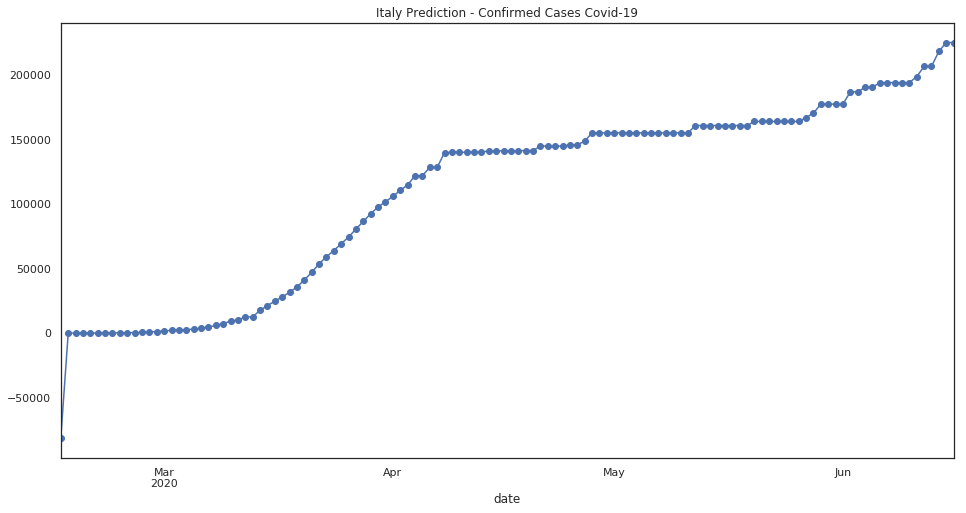

In [171]:
### Joao - Error - KeyError: 'Italy_nan'
p2=pred['Italy_nan']
p2.plot(marker='o',figsize=(16,8),title ='Italy Prediction - Confirmed Cases Covid-19')

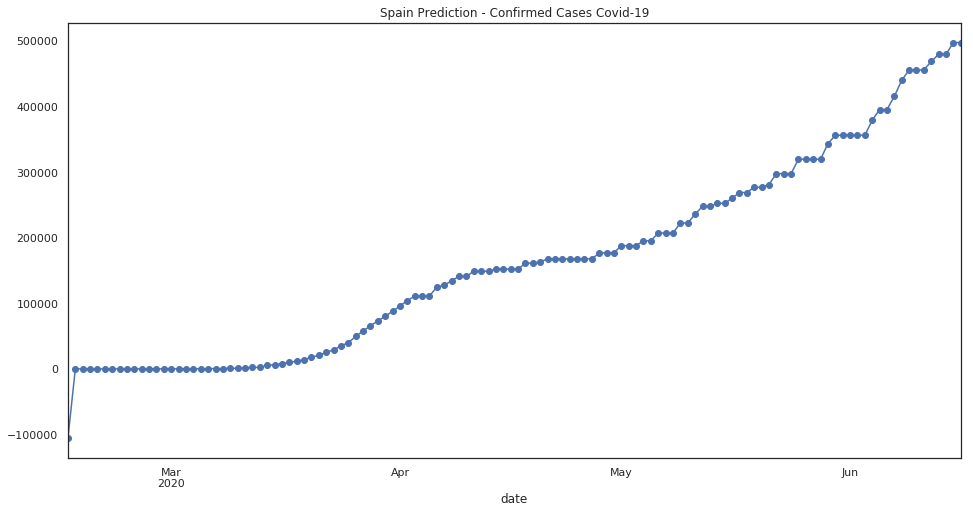

In [172]:
p3=pred['Spain_nan']
p3.plot(marker='o',figsize=(16,8),title ='Spain Prediction - Confirmed Cases Covid-19')

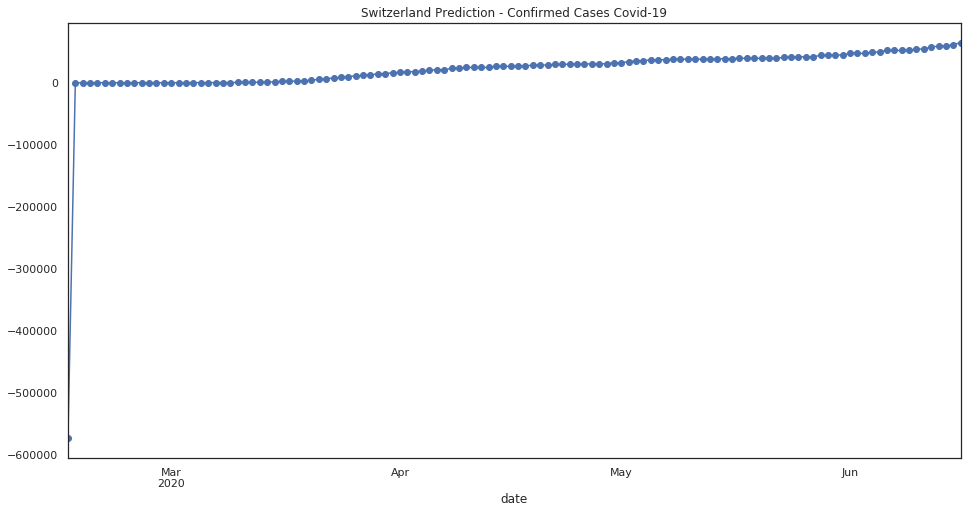

In [173]:
p4=pred['Switzerland_nan']
p4.plot(marker='o',figsize=(16,8),title ='Switzerland Prediction - Confirmed Cases Covid-19')

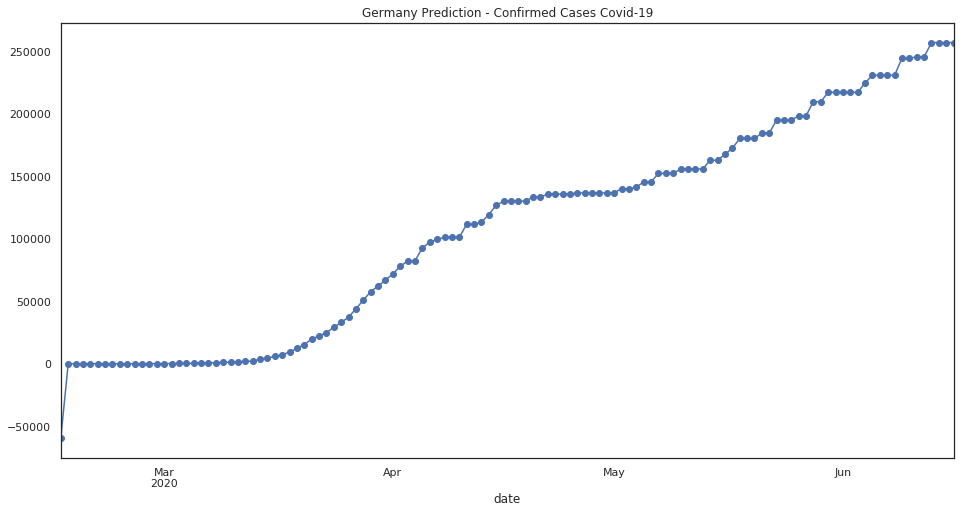

In [174]:
p5=pred['Germany_nan']
p5.plot(marker='o',figsize=(16,8),title ='Germany Prediction - Confirmed Cases Covid-19')

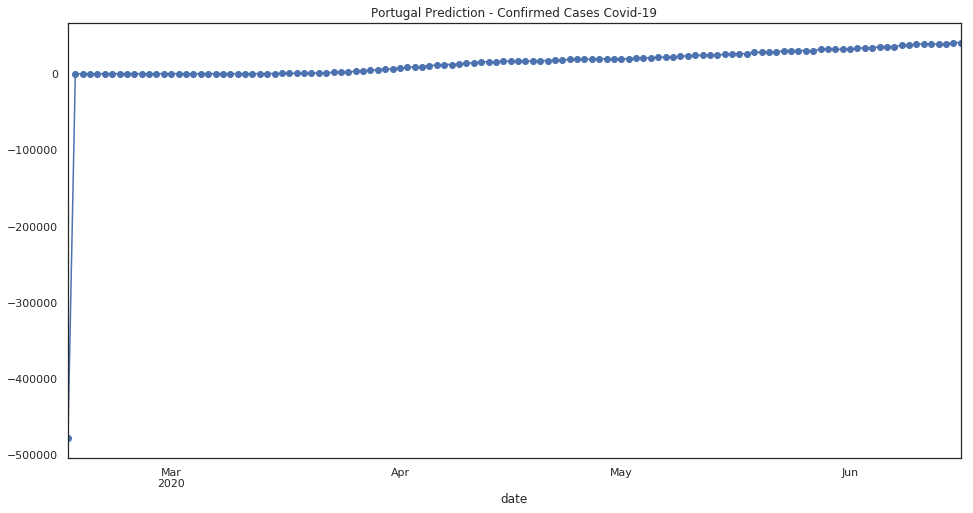

In [175]:
p6=pred['Portugal_nan']
p6.plot(marker='o',figsize=(16,8),title ='Portugal Prediction - Confirmed Cases Covid-19')

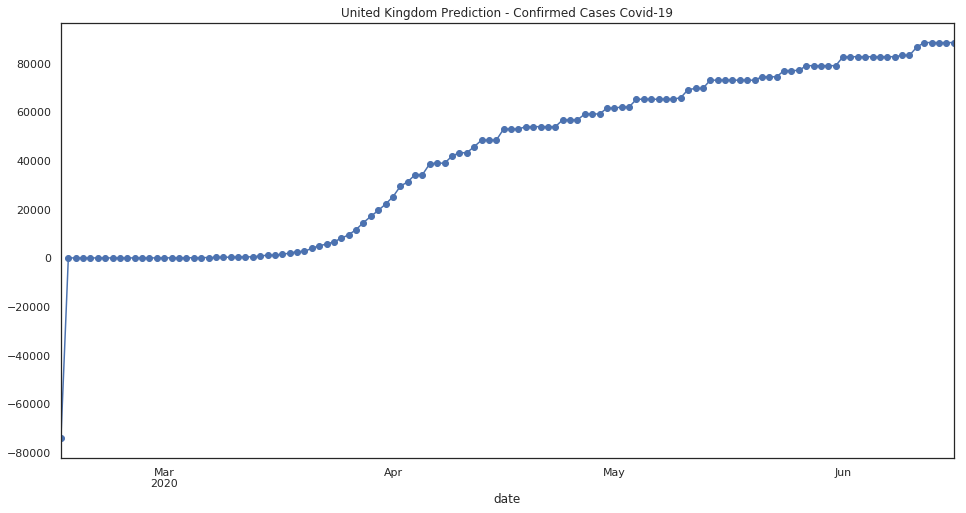

In [176]:
p8=pred['United Kingdom_nan']
p8.plot(marker='o',figsize=(16,8),title ='United Kingdom Prediction - Confirmed Cases Covid-19')

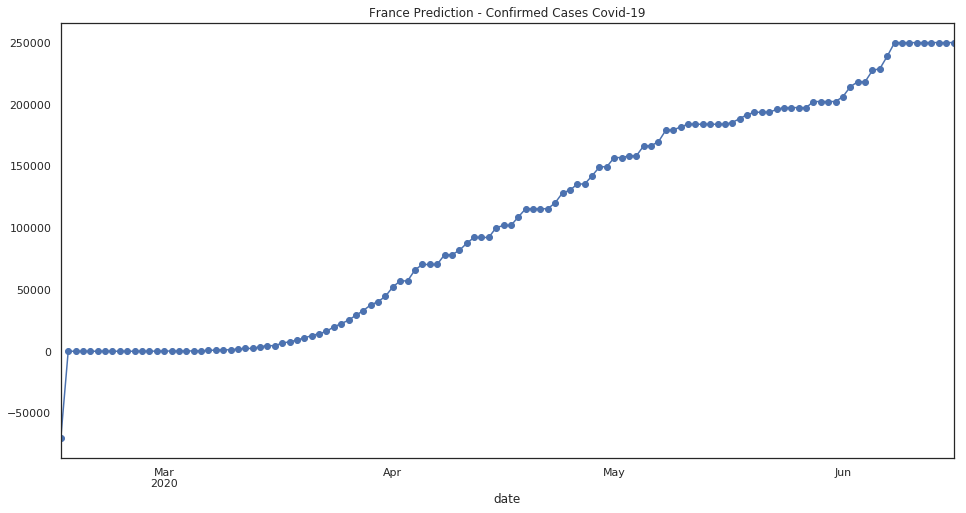

In [177]:
p9=pred['France_nan']
p9.plot(marker='o',figsize=(16,8),title ='France Prediction - Confirmed Cases Covid-19')

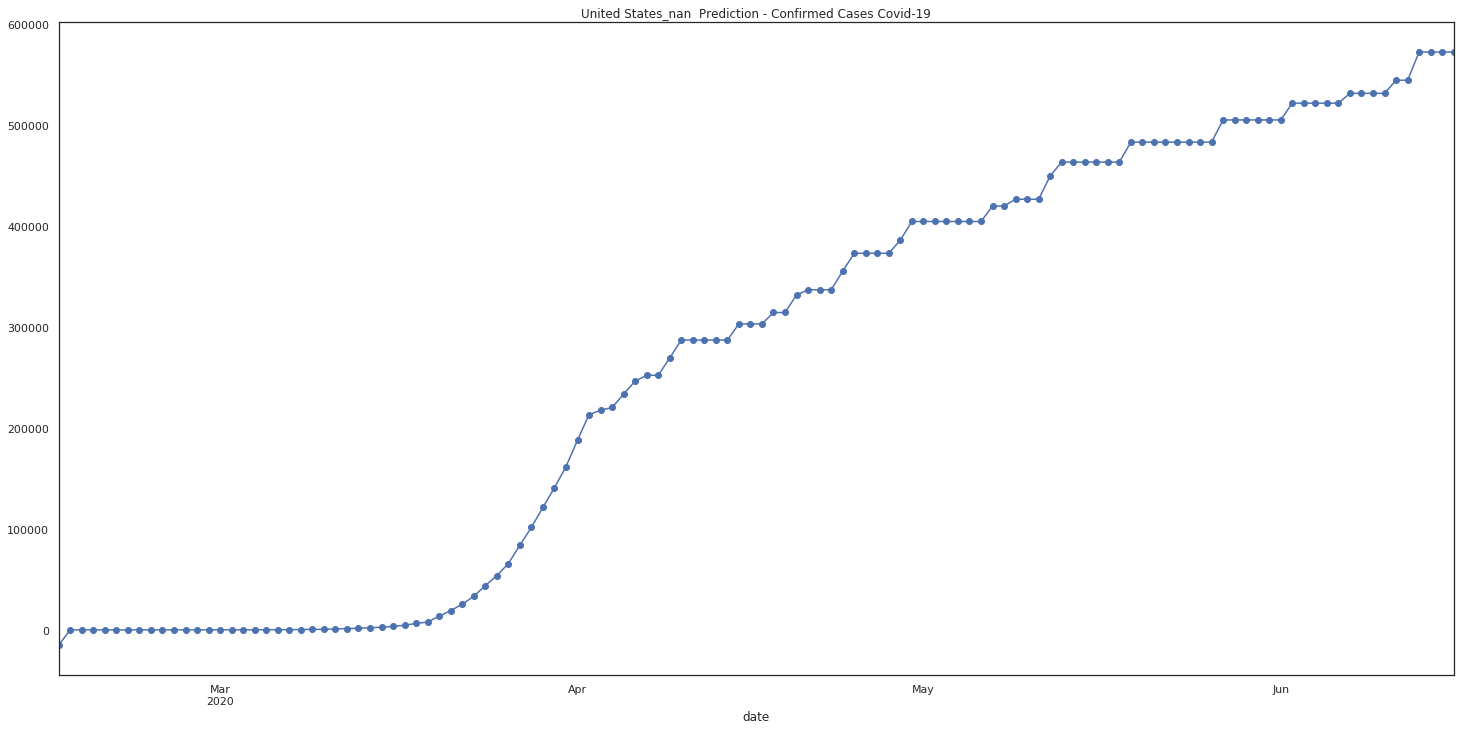

In [178]:
p10=pred['United States_nan']
p10.plot(marker='o',figsize=(25,12),title ='United States_nan  Prediction - Confirmed Cases Covid-19')

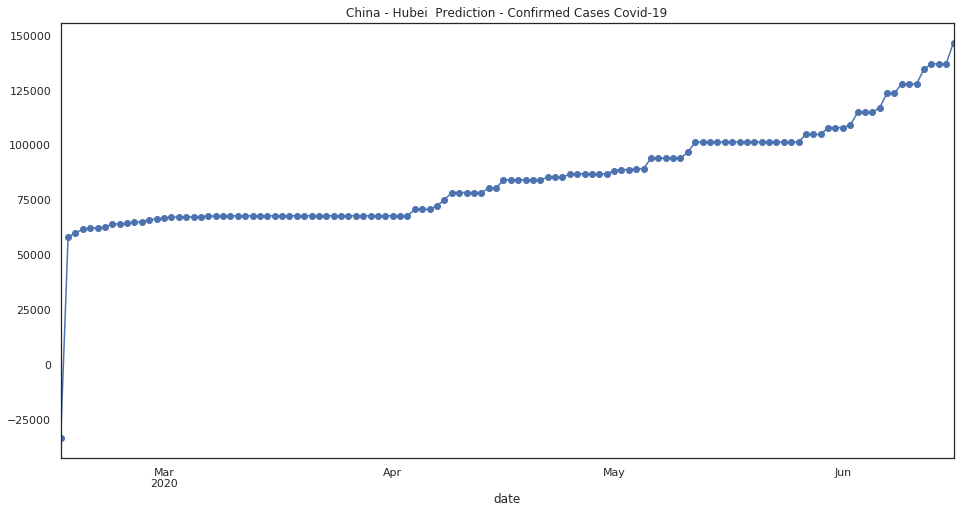

In [179]:
p11=pred['China_Hubei']
p11.plot(marker='o',figsize=(16,8),title ='China - Hubei  Prediction - Confirmed Cases Covid-19')

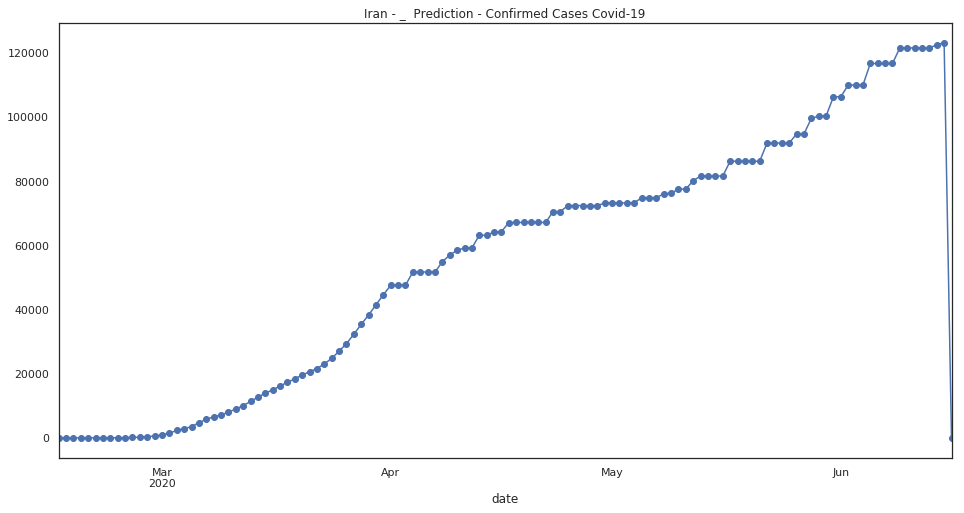

In [180]:
p12=pred['Iran_nan']
p12.plot(marker='o',figsize=(16,8),title ='Iran - _  Prediction - Confirmed Cases Covid-19')

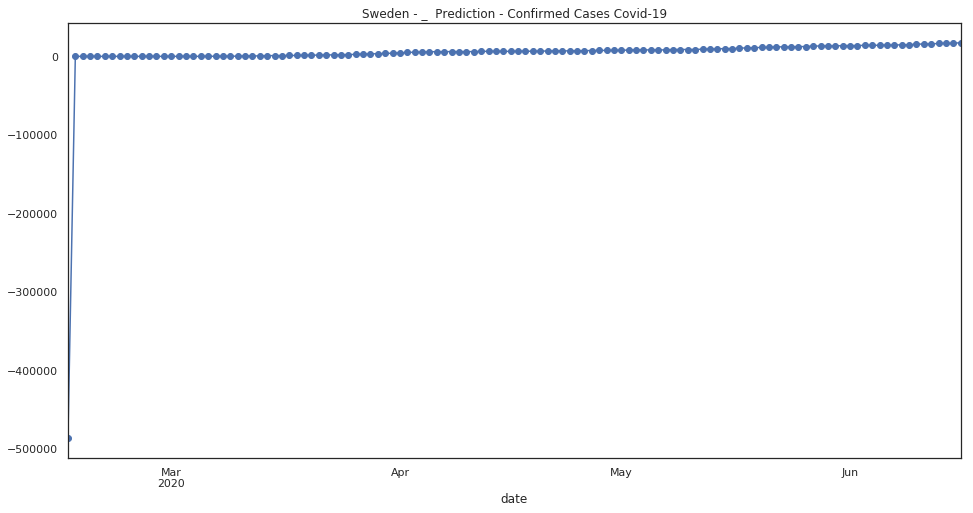

In [181]:
p13=pred['Sweden_nan']
p13.plot(marker='o',figsize=(16,8),title ='Sweden - _  Prediction - Confirmed Cases Covid-19')

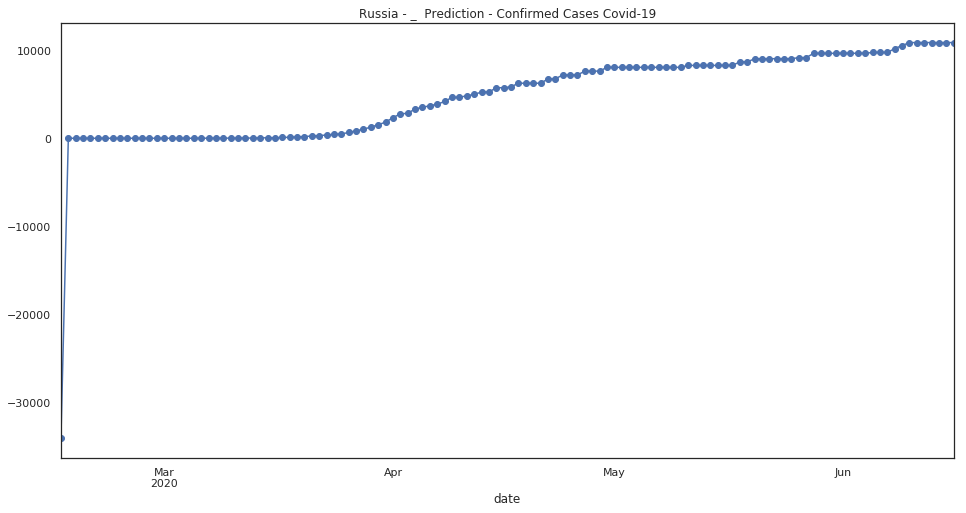

In [182]:
p13=pred['Russia_nan']
p13.plot(marker='o',figsize=(16,8),title ='Russia - _  Prediction - Confirmed Cases Covid-19')

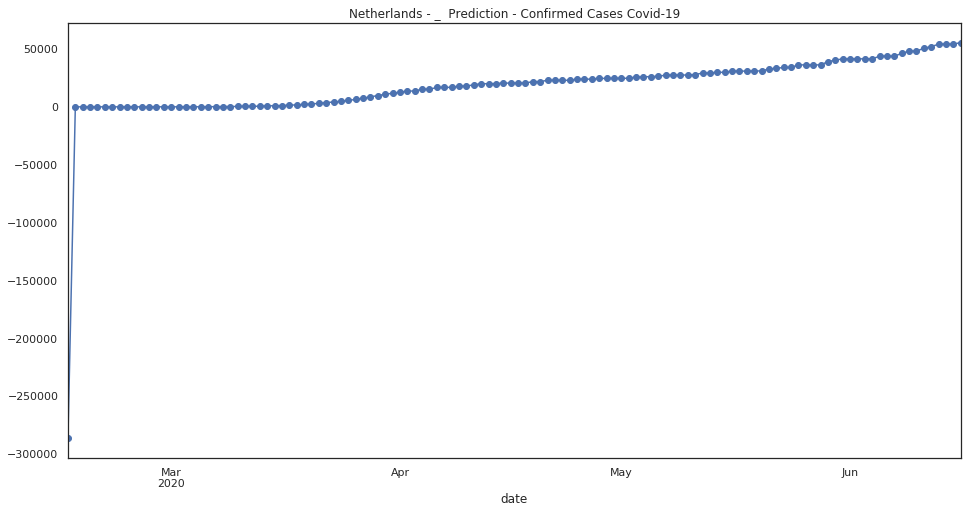

In [183]:
p14=pred['Netherlands_nan']
p14.plot(marker='o',figsize=(16,8),title ='Netherlands - _  Prediction - Confirmed Cases Covid-19')

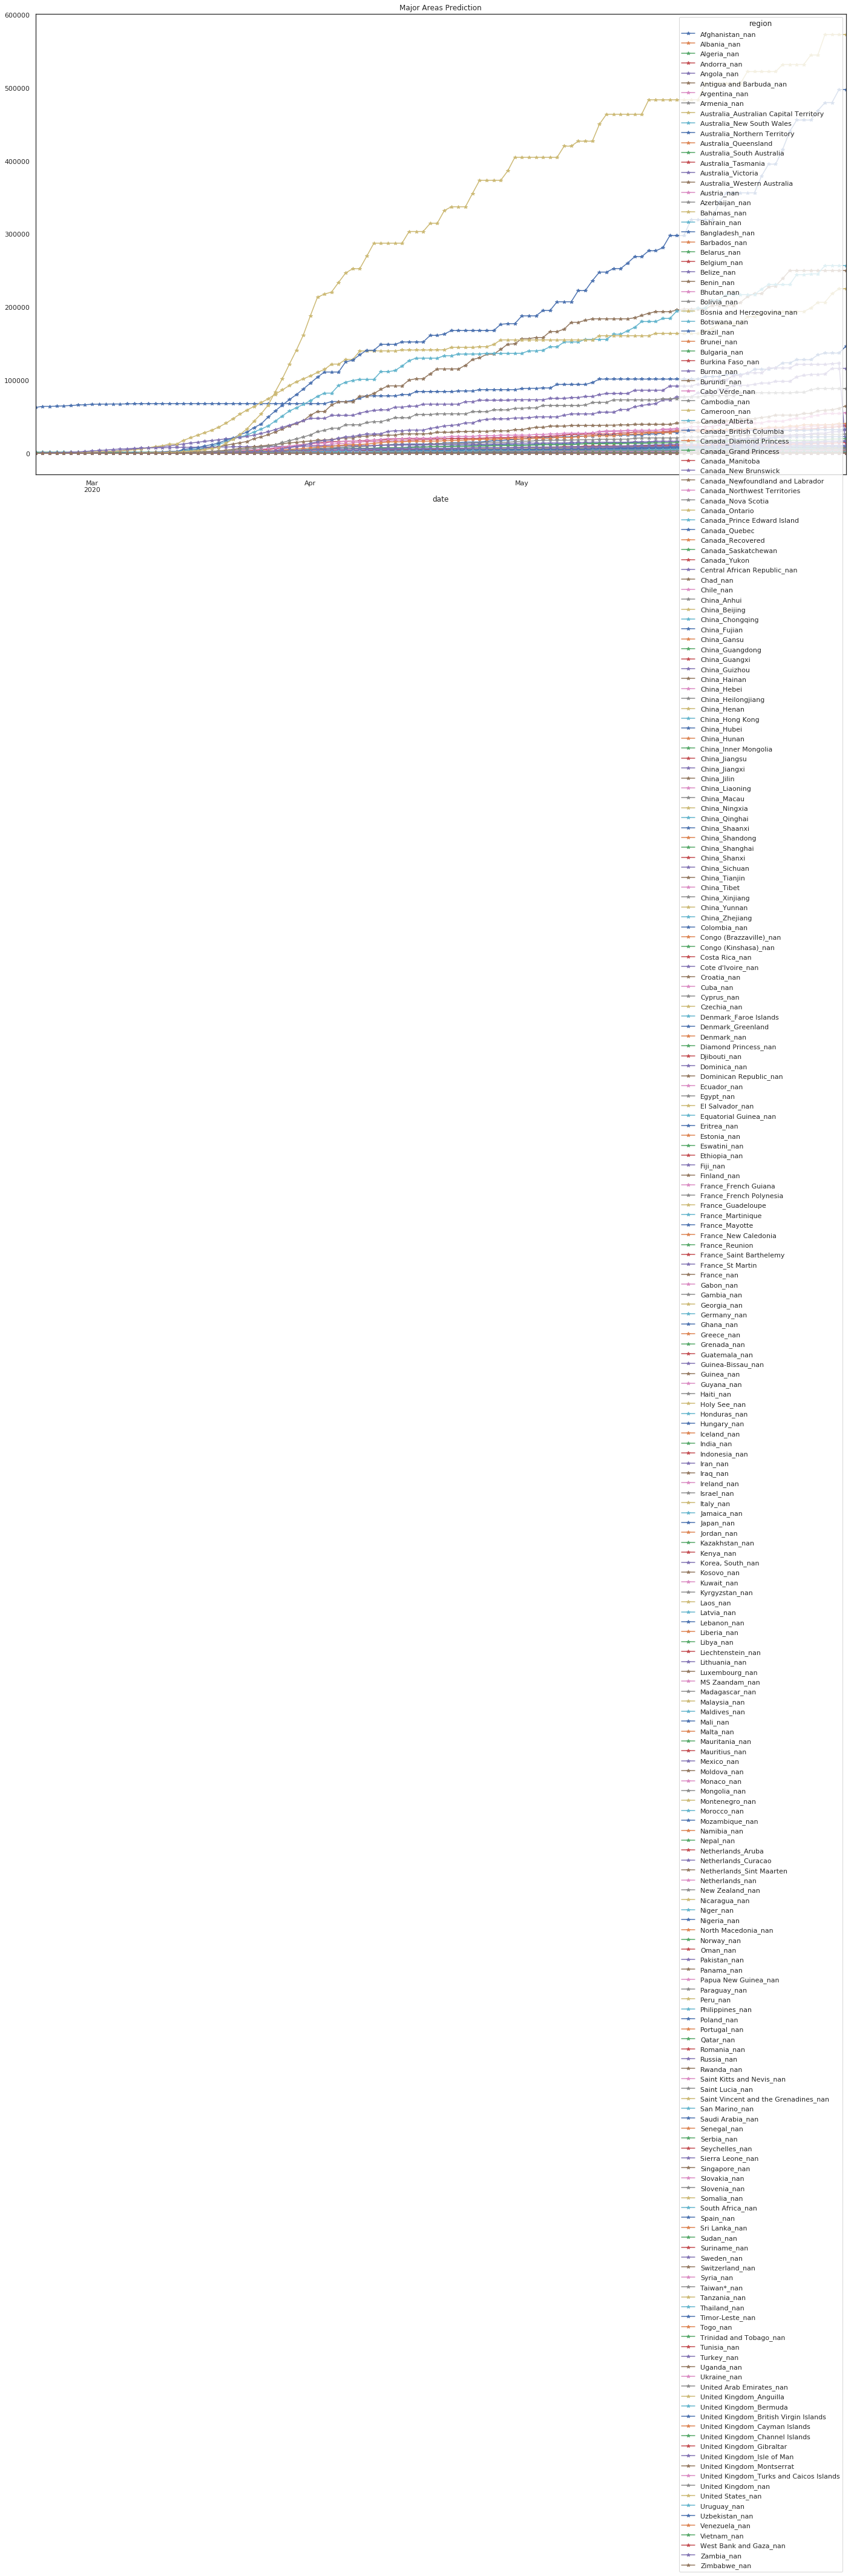

In [184]:
#region=my_train_list
pv2=pred
pv2=pv2[6:]
pv2.plot(marker='*',figsize=(24,14),title ='Major Areas Prediction')

In [185]:
pv1=pv2 #p  #p2.append(p3).append(p4).append(p5).append(p6).append(p8).append(p9).append(p11)
p=pd.DataFrame(pv1)


## Prediction Heatmap

In [186]:
p[:]

region      Afghanistan_nan  Albania_nan  Algeria_nan  Andorra_nan  \
date                                                                 
2020-02-22              0.0          0.0          0.0          0.0   
2020-02-23              0.0          0.0          0.0          0.0   
2020-02-24              0.0          0.0          0.0          0.0   
2020-02-25              1.0          0.0          1.0          0.0   
2020-02-26              1.0          0.0          1.0          0.0   
2020-02-27              1.0          0.0          1.0          0.0   
2020-02-28              1.0          0.0          1.0          0.0   
2020-02-29              1.0          0.0          1.0          0.0   
2020-03-01              1.0          0.0          1.0          0.0   
2020-03-02              1.0          0.0          1.0          0.0   
2020-03-03              1.0          0.0          3.0          1.0   
2020-03-04              1.0          0.0          5.0          1.0   
2020-03-05              1.0          0.0         12.0          1.0   
2020-03-06              1.0          0.0         12.0          1.0   
2020-03-07              1.0          0.0         17.0          1.0   
2020-03-08              1.0          0.0         17.0          1.0   
2020-03-09              4.0          0.0         19.0          1.0   
2020-03-10              4.0          2.0         20.0          1.0   
2020-03-11              5.0         10.0         20.0          1.0   
2020-03-12              7.0         12.0         20.0          1.0   
2020-03-13              7.0         23.0         24.0          1.0   
2020-03-14              7.0         33.0         26.0          1.0   
2020-03-15             11.0         38.0         37.0          1.0   
2020-03-16             16.0         42.0         48.0          1.0   
2020-03-17             21.0         51.0         54.0          2.0   
2020-03-18             22.0         55.0         60.0         39.0   
2020-03-19             22.0         59.0         74.0         39.0   
2020-03-20             22.0         64.0         87.0         53.0   
2020-03-21             24.0         70.0         90.0         75.0   
2020-03-22             24.0         76.0        139.0         88.0   
...                     ...          ...          ...          ...   
2020-05-18            589.0        626.0       2553.0       1393.0   
2020-05-19            620.0        626.0       2553.0       1411.0   
2020-05-20            620.0        654.0       2609.0       1411.0   
2020-05-21            620.0        654.0       2609.0       1411.0   
2020-05-22            620.0        669.0       2644.0       1411.0   
2020-05-23            661.0        706.0       2702.0       1411.0   
2020-05-24            661.0        706.0       2744.0       1411.0   
2020-05-25            661.0        716.0       2744.0       1465.0   
2020-05-26            661.0        759.0       2744.0       1465.0   
2020-05-27            661.0        759.0       2744.0       1470.0   
2020-05-28            661.0        759.0       2744.0       1545.0   
2020-05-29            661.0        764.0       2853.0       1545.0   
2020-05-30            689.0        764.0       2872.0       1545.0   
2020-05-31            689.0        779.0       2872.0       1545.0   
2020-06-01            689.0        779.0       2872.0       1584.0   
2020-06-02            689.0        779.0       2872.0       1675.0   
2020-06-03            689.0        779.0       2872.0       1675.0   
2020-06-04            706.0        779.0       2912.0       1685.0   
2020-06-05            706.0        824.0       3045.0       1773.0   
2020-06-06            722.0        824.0       3045.0       1773.0   
2020-06-07            722.0        841.0       3045.0       1890.0   
2020-06-08            722.0        841.0       3045.0       1890.0   
2020-06-09            764.0        890.0       3141.0       1979.0   
2020-06-10            764.0        890.0       3141.0       1979.0   
2020-06-11

In [187]:

#pip install gmplot

In [188]:
p.to_csv('/home/notebookuser/notebooks/covid19/data/p_confirmed_daily.csv', index = False, header=True)

In [189]:
# Import the necessary libraries
import pandas as pd
import gmplot
# For improved table display in the notebook
#from IPython.display import display
import random 

In [190]:
heatmap=confirmed[['region','Lat','Long']]
p_m=p.T # pred.T #
heatmap=heatmap[heatmap['region'].isin(region)]
p_m=p_m.reset_index()
heatmap_m=heatmap.merge(p_m,how='left',on='region')

In [191]:
heatmap_m[:]

region      Lat      Long  2020-02-22 00:00:00  \
0   Australia_New South Wales -33.8688  151.2093                  4.0   
1                 Belgium_nan  50.8333    4.0000                  1.0   
2             China_Hong Kong  22.3000  114.2000                 68.0   
3                 China_Hubei  30.9756  112.2707              62662.0   
4                 China_Macau  22.1667  113.5500                 10.0   
5                  France_nan  46.2276    2.2137                 12.0   
6                 Germany_nan  51.0000    9.0000                 16.0   
7                   India_nan  21.0000   78.0000                  3.0   
8                    Iran_nan  32.0000   53.0000                 28.0   
9                    Iran_nan  32.0000   53.0000                 28.0   
10                  Italy_nan  43.0000   12.0000                 20.0   
11           Korea, South_nan  36.0000  128.0000                204.0   
12            Netherlands_nan  52.1326    5.2913                  0.0   
13                 Poland_nan  51.9194   19.1451                  0.0   
14               Portugal_nan  39.3999   -8.2245                  0.0   
15                 Russia_nan  60.0000   90.0000                  2.0   
16              Singapore_nan   1.2833  103.8333                 85.0   
17                  Spain_nan  40.0000   -4.0000                  2.0   
18                 Sweden_nan  63.0000   16.0000                  1.0   
19            Switzerland_nan  46.8182    8.2275                  0.0   
20                Taiwan*_nan  23.7000  121.0000                 26.0   
21                 Turkey_nan  38.9637   35.2433                  0.0   
22         United Kingdom_nan  55.3781   -3.4360                  9.0   
23          United States_nan  37.0902  -95.7129                 15.0   

    2020-02-23 00:00:00  2020-02-24 00:00:00  2020-02-25 00:00:00  \
0                   4.0                  4.0                  4.0   
1                   1.0                  1.0                  1.0   
2                  69.0                 74.0                 84.0   
3               64084.0              64084.0              64287.0   
4                  10.0                 10.0                 10.0   
5                  12.0                 12.0                 12.0   
6                  16.0                 16.0                 17.0   
7                   3.0                  3.0                  3.0   
8                  43.0                 61.0                 95.0   
9                  43.0                 61.0                 95.0   
10                 62.0                155.0                229.0   
11                433.0                602.0                833.0   
12                  0.0                  0.0                  0.0   
13                  0.0                  0.0                  0.0   
14                  0.0                  0.0                  0.0   
15                  2.0                  2.0                  2.0   
16                 85.0                 89.0                 89.0   
17                  2.0                  2.0                  6.0   
18                  1.0                  1.0                  1.0   
19                  0.0                  0.0                  1.0   
20                 26.0                 28.0                 30.0   
21                  0.0                  0.0                  0.0   
22                  9.0                  9.0                 13.0   
23                 15.0                 15.0                 51.0   

    2020-02-26 00:00:00  2020-02-27 00:00:00  2020-02-28 00:00:00  ...  \
0                   4.0                  4.0                  4.0  ...   
1                   1.0                  1.0                  1.0  ...   
2                  84.0                 91.0                 92.0  ...   
3               64786.0              65187.0              65914.0  ...   
4                  10.0                 10.0                 10.0  ...   
5                  14.0    

In [192]:
heatmap=pd.DataFrame()
vmaxni=len(heatmap_m)
vmaxnii=(vmaxni)-1
for i in range(0,len(heatmap)):
    if heatmap_m.iloc[i,vmaxni].astype(int)==0:     #### heatmap_m.iloc[i,61] # heatmap_m.iloc[i,9] columns is the date we want to check
        continue
    #heatmap=heatmap.append(pd.concat([heatmap_m.iloc[i:(i+1),1:3]]*abs(heatmap_m.iloc[i,(i+1)].astype(int)), ignore_index=True,sort=False)) 
    heatmap=heatmap.append(pd.concat([heatmap_m.iloc[i:(i+1),1:vmaxnii]]*abs(heatmap_m.iloc[i:(i+1),1:vmaxnii].astype(int)), ignore_index=True,sort=False)) 


In [193]:
### Joao - Print in datetime
from datetime import datetime
#
latitudes = heatmap_m['Lat']
longitudes = heatmap_m['Long']
# Creating the location we would like to initialize the focus on. 
# Parameters: Lattitude, Longitude, Zoom
heatmap=heatmap_m
gmap = gmplot.GoogleMapPlotter(46.99474,6.87237, 4)
gmap.heatmap(latitudes, longitudes)
datemap=datetime.today().strftime('%Y-%m-%d')
# Generate the heatmap into an HTML file
gmap.draw("Heatmap-"+datemap+".html")

In [194]:
print("Stats and Forecast Done for Today!")
print("I'm done with this month of March and now April!")
print(" April-May-June are going to be hard with this Global Lock-Down!")

Stats and Forecast Done for Today!
I'm done with this month of March and now April!
 April-May-June are going to be hard with this Global Lock-Down!


In [195]:
exit()

H2O session _sid_b0c6 closed.
H2O session _sid_9ef4 closed.


ERROR:root:Invalid alias: The name clear can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name more can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name less can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name man can't be aliased because it is another magic command.
